# Predicting In Hospital Mortality

**Collaborators**

1. Jubilant Mutuku
2. Ivan Wawire
3. Millicent Muthomi
4. Maureen Muriithi
5. Wilson Wachira
6. Lydia Masabarakiza 

## Problem Statement

Healthcare providers and administrators in New York State aim to improve patient outcomes and reduce in-hospital mortality among pneumonia patients. In-hospital mortality occurs when patients succumb to their condition during their hospital stay, and it is crucial for healthcare providers to predict which patients are at the highest risk of mortality. By identifying these high-risk patients in advance, healthcare providers in New York can implement targeted interventions and allocate resources more effectively to improve patient care and survival rates.

## Objectives 

The primary objective of using this dataset is to develop a predictive model that can accurately forecast in-hospital mortality among pneumonia patients. By leveraging the detailed information in the dataset, we aim to:

1. Identify High-Risk Populations: Determine demographic and clinical factors associated with higher pneumonia hospitalization rates.

2. Evaluate Quality of Care: Assess metrics such as length of stay, patient disposition, and mortality rates to gauge the quality of pneumonia care.

3. Assess Economic Burden: Investigate the costs associated with pneumonia hospitalizations and identify opportunities for cost reduction.

4. Reduce Readmissions: Identify factors contributing to pneumonia-related readmissions and suggest strategies to minimize them.

## Data Understanding

### Dataset Overview

The dataset being used for this analysis is the Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified dataset. This dataset contains detailed discharge-level information on patient characteristics, diagnoses, treatments, services, charges, and costs for pneumonia patients in New York State from 2009 to 2017. The dataset is de-identified in compliance with the Health Insurance Portability and Accountability Act (HIPAA), ensuring that the health information is not individually identifiable. Direct identifiers have been redacted, such as removing the day and month portions from dates.

### Key Features

- Patient Characteristics: Information about patients such as age, gender, race, and ethnicity.

- Diagnoses: Codes and descriptions of the primary and secondary diagnoses recorded during the hospital stay.
 
- Treatments and Procedures: Details on the treatments and medical procedures performed on the patients.

- Services: Information on the healthcare services provided during the hospital stay.

- Charges and Costs: Financial data related to the total charges and costs incurred during the hospital stay.


### Data Specifics

- Time Period: The dataset spans from 2009 to 2017.

- Geographical Scope: The data covers pneumonia patients in New York State.

- Patient Privacy: All personal identifiers have been removed to protect patient privacy. For example, dates have been modified to exclude the day and month, leaving only the year.


## Data Preparation 

In the data preparation phase, several steps were undertaken to ensure the dataset's readiness for analysis. These steps included handling missing values using imputation with mean values or a placeholder like 'unknown', removing duplicate records to maintain data integrity, and correcting data entry errors, inconsistencies, or anomalies to ensure accuracy. Additionally, data type inconsistencies were standardized, placeholders were removed or replaced with meaningful values, and numerical features were normalized to a common range. Outliers were identified and appropriately managed to prevent skewing of the analysis, ensuring a robust and accurate dataset for modeling.

### 1.1 Loading the data 

In [56]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import to_hex
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
import shutil
import os
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from scipy.optimize import minimize
from sklearn.decomposition import PCA
import keras_tuner as kt
from keras.optimizers import Adam

C:\Users\hp\anaconda3\desktop\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [57]:
# Load the CSV file into a DataFrame
df = pd.read_csv('hospital-inpatient-discharges-pneumonia.csv')

# Display the first few rows of the DataFrame
df.head()

C:\Users\hp\anaconda3\desktop\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,26,27,28,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs,Payment Typology 1,Payment Topology 2,Payment Typology 3,Payment Typology 2,Facility Id,Ratio of Total Costs to Total Charges
0,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,105.0,F,White,Not Span/Hispanic,...,N,Y,29059.14,9233.80,NaN,NaN,NaN,NaN,NaN,NaN
1,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,70 or Older,105.0,F,White,Not Span/Hispanic,...,N,Y,15622.27,4815.69,NaN,NaN,NaN,NaN,NaN,NaN
2,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,18 to 29,109.0,M,White,Not Span/Hispanic,...,N,Y,10190.43,3238.55,NaN,NaN,NaN,NaN,NaN,NaN
3,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,112.0,F,Other Race,Not Span/Hispanic,...,N,Y,39250.92,12652.24,NaN,NaN,NaN,NaN,NaN,NaN
4,Capital/Adiron,Albany,101000.0,1.0,Albany Medical Center Hospital,0 to 17,120.0,M,White,Not Span/Hispanic,...,N,N,10578.58,5315.97,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Data Inspection

In [58]:
df.shape

(379463, 43)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379463 entries, 0 to 379462
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Health Service Area                    379454 non-null  object 
 1   Hospital County                        379454 non-null  object 
 2   Operating Certificate Number           379454 non-null  float64
 3   Facility ID                            333778 non-null  float64
 4   Facility Name                          379463 non-null  object 
 5   Age Group                              379463 non-null  object 
 6   Zip Code - 3 digits                    379098 non-null  object 
 7   Gender                                 379463 non-null  object 
 8   Race                                   379463 non-null  object 
 9   Ethnicity                              379463 non-null  object 
 10  Length of Stay                         379463 non-null  

Before we clean the data we have 379463 rows and 43 columns

## 2. Data Cleaning

### 2.1 Dropping unnecessary columns

In [60]:
df = df.drop(columns = ['Operating Certificate Number','Facility ID','Attending Provider License Number',
                        'Operating Provider License Number','Other Provider License Number', 'Birth Weight', 
                        'Abortion Edit Indicator'])

The columns above have are not needed for us to carry out our analysis hence us dropping them.

### 2.2 Handling Missing values

In [61]:
# Checking for missing values
df.isnull().sum()

Health Service Area                           9
Hospital County                               9
Facility Name                                 0
Age Group                                     0
Zip Code - 3 digits                         365
Gender                                        0
Race                                          0
Ethnicity                                     0
Length of Stay                                0
Type of Admission                             0
Patient Disposition                           6
Discharge Year                                0
CCS Diagnosis Code                            0
CCS Diagnosis Description                     0
CCS Procedure Code                            0
CCS Procedure Description                     0
APR DRG Code                                  0
APR DRG Description                           0
APR MDC Code                                  0
APR MDC Description                           0
APR Severity of Illness Code            

There are missing values present in some of the columns. To get a better understanding of the missing values we want to investigate the percentage of missing values per column.

In [62]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean() * 100

# Round the percentages
rounded_missing_percentage = missing_percentage.round()

# Display the rounded percentage of missing values for each column
print("Rounded percentage of missing values for each column:")
print(rounded_missing_percentage)

Rounded percentage of missing values for each column:
Health Service Area                       0.0
Hospital County                           0.0
Facility Name                             0.0
Age Group                                 0.0
Zip Code - 3 digits                       0.0
Gender                                    0.0
Race                                      0.0
Ethnicity                                 0.0
Length of Stay                            0.0
Type of Admission                         0.0
Patient Disposition                       0.0
Discharge Year                            0.0
CCS Diagnosis Code                        0.0
CCS Diagnosis Description                 0.0
CCS Procedure Code                        0.0
CCS Procedure Description                 0.0
APR DRG Code                              0.0
APR DRG Description                       0.0
APR MDC Code                              0.0
APR MDC Description                       0.0
APR Severity of Illness Co

To ensure the quality and reliability of our data analysis, we have decided to drop any columns where the proportion of null values exceeds 40%.

In [63]:
# Selecting columns to drop
columns_to_drop = rounded_missing_percentage[rounded_missing_percentage >= 40].index
df = df.drop(columns=columns_to_drop)

# Display the Missing values after dropping columns
print("\nMissing values after dropping columns with 40% or more missing values:")
print(df.isnull().sum())


Missing values after dropping columns with 40% or more missing values:
Health Service Area                         9
Hospital County                             9
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                       365
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         6
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description                         0
APR Seve

After removing columns with more than 40% missing values, some missing values still remain in the dataset. For cases where the number of missing values is fewer than 9, we will proceed by dropping the affected rows.

In [64]:
# Dropping the rows where missing values are less than 10
df = df.dropna(subset=['Health Service Area'])
df = df.dropna(subset=['Patient Disposition'])
df = df.dropna(subset=['APR Severity of Illness Description'])
df.isnull().sum()

Health Service Area                         0
Hospital County                             0
Facility Name                               0
Age Group                                   0
Zip Code - 3 digits                       360
Gender                                      0
Race                                        0
Ethnicity                                   0
Length of Stay                              0
Type of Admission                           0
Patient Disposition                         0
Discharge Year                              0
CCS Diagnosis Code                          0
CCS Diagnosis Description                   0
CCS Procedure Code                          0
CCS Procedure Description                   0
APR DRG Code                                0
APR DRG Description                         0
APR MDC Code                                0
APR MDC Description                         0
APR Severity of Illness Code                0
APR Severity of Illness Descriptio

For the 'Payment typology 1' column, we will replace missing values with the placeholder 'unknown'. 

In [65]:
# Replacing the missing values with unknown
df['Payment Typology 1'].fillna('unknown', inplace=True)

# Checking the missing values 
df.isnull().sum()

Health Service Area                      0
Hospital County                          0
Facility Name                            0
Age Group                                0
Zip Code - 3 digits                    360
Gender                                   0
Race                                     0
Ethnicity                                0
Length of Stay                           0
Type of Admission                        0
Patient Disposition                      0
Discharge Year                           0
CCS Diagnosis Code                       0
CCS Diagnosis Description                0
CCS Procedure Code                       0
CCS Procedure Description                0
APR DRG Code                             0
APR DRG Description                      0
APR MDC Code                             0
APR MDC Description                      0
APR Severity of Illness Code             0
APR Severity of Illness Description      0
APR Risk of Mortality                    0
APR Medical

Upon inspecting the data, we found that the 'Zip Code' column corresponds to the hospital county. Based on this relationship, we will identify counties with missing values and replace them with the appropriate zip codes corresponding to those counties.

In [66]:
# Filter rows where 'Zip Code' is missing
missing_zip_df = df[df['Zip Code - 3 digits'].isnull()]

# Get unique counties with missing zip codes
counties_with_missing_zip = missing_zip_df['Hospital County'].drop_duplicates().tolist()

print("Counties with missing zip codes:")
print(counties_with_missing_zip)

Counties with missing zip codes:
['Clinton', 'Oneida', 'Rensselaer', 'Bronx', 'Manhattan', 'Queens', 'Chemung', 'Jefferson', 'Nassau', 'Onondaga', 'Otsego', 'Rockland', 'Westchester', 'Richmond', 'Steuben', 'Broome', 'Cortland', 'Lewis', 'Tompkins', 'Kings', 'Putnam', 'Suffolk', 'Chautauqua', 'Ontario', 'Albany', 'Saratoga', 'Franklin']


The output displays counties with missing zip codes. To ensure consistency with the existing data format, we researched the zip codes for these counties and used only the first three digits. This approach aligns with the format used in the dataset.

In [67]:
# Mapping of counties to their respective three-digit zip codes
county_to_zip_prefix = {
    'Albany': '122','Bronx': '104','Brooklyn': '112','Broome': '139','Chemung': '149','Chautauqua': '147','Clinton': '129','Cortland': '130',
    'Franklin': '129','Jefferson': '136','Kings': '112','Lewis': '133','Manhattan': '100','Nassau': '115','Oneida': '134',
    'Onondaga': '132','Ontario': '144','Otsego': '138','Putnam': '105','Queens': '111','Rensselaer': '121','Richmond': '103',
    'Rockland': '109','Saratoga': '128','Steuben': '148','Suffolk': '117','Tompkins': '148','Westchester': '105'
}

# Function to replace missing zip codes based on county
def fill_zip_code(row):
    if pd.isnull(row['Zip Code - 3 digits']):
        return county_to_zip_prefix.get(row['Hospital County'], None)
    return row['Zip Code - 3 digits']

# Apply the function to fill missing values
df['Zip Code - 3 digits'] = df.apply(fill_zip_code, axis=1)

# Checking the missing values 
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Emergency Depart

All the missing values have been taken care of.

### 2.3 Checking for Duplicates

In [68]:
# Checking for duplicates
df.duplicated().sum()

406

There are 406 duplicates in our data, we decided to drop them because removing the entries ensures data integrity, accuracy, and efficiency by eliminating redundancy and preventing bias in analysis.

In [69]:
# Dropping duplicates
df = df.drop_duplicates()

In [70]:
# Checking for duplicate after being dropped
df.duplicated().sum()

0

We have removed all the duplicated values

### 2.4 Checking Invalid Entries

In [71]:
# Define common placeholders
placeholders = ["N/A", "NA", "null", "None", "undefined", "", 'nan']

# Initialize a dictionary to hold placeholder counts
placeholder_counts = {placeholder: 0 for placeholder in placeholders}

# Loop through each placeholder and count its occurrences
for placeholder in placeholders:
    # Use case-insensitive comparison and strip leading/trailing spaces
    placeholder_count = (df.applymap(lambda x: str(x).strip().lower()) == placeholder.lower()).sum().sum()
    if placeholder_count > 0:
        placeholder_counts[placeholder] = placeholder_count

# Print the counts of each placeholder
for placeholder, count in placeholder_counts.items():
    if count >= 0:
        print(f"Found {count} occurrences of placeholder '{placeholder}'")


Found 0 occurrences of placeholder 'N/A'
Found 0 occurrences of placeholder 'NA'
Found 0 occurrences of placeholder 'null'
Found 0 occurrences of placeholder 'None'
Found 0 occurrences of placeholder 'undefined'
Found 0 occurrences of placeholder ''
Found 0 occurrences of placeholder 'nan'


This code counts occurrences of common placeholder values representing missing or undefined data in the dataset to help assess and address data quality issues. From the output there arent any invalid entries in the data set.

Upon inspection of the Zip code column we noticed a place holder value OOS. In order to understand this we want to check the counties that have this place holder

In [72]:
# Filter the DataFrame to find rows where Zip Code is 'OOS'
oos_counties = df[df['Zip Code - 3 digits'].str.strip().str.upper() == 'OOS']

# Get the unique counties with 'OOS' in Zip Code
oos_county_list = oos_counties['Hospital County'].unique()

# Display the counties
print("Counties with 'OOS' in Zip Code:")
for county in oos_county_list:
    print(county)

Counties with 'OOS' in Zip Code:
Albany
Allegany
Broome
Cattaraugus
Cayuga
Chautauqua
Chemung
Clinton
Cortland
Delaware
Dutchess
Erie
Suffolk
Essex
Franklin
Jefferson
Lewis
Livingston
Madison
Monroe
Montgomery
Nassau
Niagara
Oneida
Onondaga
Ontario
Orange
Orleans
Oswego
Otsego
Putnam
Rensselaer
Rockland
St Lawrence
Saratoga
Schenectady
Schoharie
Steuben
Sullivan
Tompkins
Ulster
Warren
Wayne
Westchester
Wyoming
Bronx
Kings
Manhattan
Queens
Richmond
Chenango
Genesee
Yates
Herkimer
Columbia
Fulton
Schuyler


To take care of the place holders, we will filter the DataFrame to exclude rows where the zip code is 'OOS', then create a dictionary mapping each hospital county to its corresponding zip code by selecting the first valid zip code for each county.

In [73]:
# Filter the DataFrame to get rows where Zip Code is not 'OOS'
valid_zip_codes_df = df[df['Zip Code - 3 digits'].str.strip().str.upper() != 'OOS']

# Create a dictionary mapping counties to zip codes
zip_code_mapping = valid_zip_codes_df[['Hospital County', 'Zip Code - 3 digits']].drop_duplicates()
zip_code_mapping = zip_code_mapping.dropna()
zip_code_mapping = zip_code_mapping.groupby('Hospital County')['Zip Code - 3 digits'].first().to_dict()

# Print the zip code mapping for verification
print("Zip Code Mapping from Existing Data:")
for county, zip_code in zip_code_mapping.items():
    print(f"{county}: {zip_code}")

Zip Code Mapping from Existing Data:
Albany: 105.0
Allegany: 145
Bronx: 100
Broome: 120
Cattaraugus: 140
Cayuga: 121
Chautauqua: 140
Chemung: 130
Chenango: 133
Clinton: 121
Columbia: 120
Cortland: 109
Delaware: 117
Dutchess: 104
Erie: 140
Essex: 128
Franklin: 120
Fulton: 120
Genesee: 140
Herkimer: 133
Jefferson: 131
Kings: 100
Lewis: 109
Livingston: 144
Madison: 130
Manhattan: 100
Monroe: 117
Montgomery: 120
Nassau: 110
Niagara: 130
Oneida: 120
Onondaga: 130
Ontario: 131
Orange: 100
Orleans: 140
Oswego: 130
Otsego: 120
Putnam: 105
Queens: 100
Rensselaer: 120
Richmond: 103
Rockland: 109
Saratoga: 104
Schenectady: 100
Schoharie: 120
Schuyler: 145
St Lawrence: 136
Steuben: 144
Suffolk: 109
Sullivan: 113
Tompkins: 112
Ulster: 100
Warren: 103
Wayne: 131
Westchester: 104
Wyoming: 140
Yates: 131


In [74]:
# Replace 'OOS' with the correct zip code based on the county
df['Zip Code - 3 digits'] = df.apply(
    lambda row: zip_code_mapping.get(row['Hospital County'], row['Zip Code - 3 digits'])
    if row['Zip Code - 3 digits'].strip().upper() == 'OOS' else row['Zip Code - 3 digits'],
    axis=1
)

In [75]:
# Count occurrences of 'OOS' in the Zip Code - 3 digits column
oos_count = df[df['Zip Code - 3 digits'].str.strip().str.upper() == 'OOS'].shape[0]

# Print the number of occurrences
print(f"Number of 'OOS' still present in Zip Code - 3 digits column: {oos_count}")

Number of 'OOS' still present in Zip Code - 3 digits column: 0


All the place holders have been removed. 

### 2.5 Checking Data Types

In [76]:
# Checking the data types
df.dtypes

Health Service Area                     object
Hospital County                         object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code             int64
APR Severity 

There are two columns that do not have an appropriate data type Zip Code and Length of Stay. 

- Some zip code values in our dataset were represented as floats. Zip codes are generally whole numbers, so these float representations were not appropriate for our analysis.

- The 'Length of Stay' column is currently saved as an object data type, whereas it should be numeric. To understand the reason for this, we will examine the unique values in this column.

In [77]:
# Convert all values to numeric, forcing errors to NaN
df['Zip Code - 3 digits'] = pd.to_numeric(df['Zip Code - 3 digits'], errors='coerce')

# Round off zip code values to the nearest whole number and convert to integer
df['Zip Code - 3 digits'] = df['Zip Code - 3 digits'].round().astype(int)

# Checking if the conversion caused NA values 
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Emergency Depart

In [78]:
# Checking if the column is no longer a float
df['Zip Code - 3 digits'].dtypes

dtype('int32')

The data type has been sucessfuly changed. 

In [79]:
unique_values = df['Length of Stay'].unique()

# Print the unique values
print(unique_values)

['6' '3' '2' '5' '9' '1' '20' '4' '37' '8' '27' '21' '23' '7' '31' '14'
 '11' '46' '18' '28' '10' '15' '17' '32' '13' '24' '22' '12' '33' '26'
 '19' '16' '34' '58' '39' '40' '29' '25' '38' '35' '100' '30' '72' '36'
 '110' '96' '63' '43' '44' '75' '57' '62' '42' '115' '87' '120 +' '73'
 '69' '59' '76' '81' '86' '52' '118' '78' '88' '54' '47' '61' '66' '94'
 '41' '45' '112' '82' '64' '77' '60' '53' '56' '49' '98' '70' '97' '90'
 '51' '50' '65' '84' '89' '55' '48' '71' '92' '79' '109' '80' '83' '67'
 '111' '95' '91' '68' '74' '101' '117' '85' '103' '104' '102' '108' '114'
 '106' '107' '116' '113' '119' '93' '105' 6 4 9 3 5 8 2 14 15 20 21 13 1
 11 7 55 48 26 12 10 58 23 28 16 18 37 19 29 30 31 49 50 75 25 43 17 35 22
 27 41 51 32 24 34 42 33 44 47 68 53 40 39 94 118 46 45 38 105 70 64 36 76
 88 72 '99']


Looking at the unique values there are numbers that have quotes this shows that the numbers are saved as strings. Additionally there are values that have a plus sign. Firstly we want to see how many 120+ days are there in the data. 

In [80]:
# Count occurrences of '120+'
count_120_plus = df['Length of Stay'].str.contains('120\ +', regex=True).sum()

print(f"Number of entries with '120 +': {count_120_plus}")

Number of entries with '120 +': 124


We have identified 124 patients who stayed for more than 120 days, and we will retain the "120+" values for our analysis as they are crucial. To handle this, we will separate the 'Length of Stay' column into two cases: one with "120+" and the other with numeric and string values. We will convert the numeric and string values into numeric format while preserving the "120+" values. After processing, the 'Length of Stay' column will remain as an object data type due to the presence of "120+".

In [81]:
# Separate rows with special cases (e.g., values containing '+')
special_cases = df['Length of Stay'].str.contains(r'\+', na=False)
special_values = df[special_cases]
remaining_values = df[~special_cases]

# Function to check for non-numeric values
def check_non_numeric(value):
    try:
        pd.to_numeric(value, errors='raise')
        return None  # Value is numeric
    except (ValueError, TypeError):
        return value  # Value is not numeric

In [82]:
# Function to clean and convert remaining values to numeric, errors are coerced to NaN
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value, errors='coerce')  # Convert to numeric or NaN if conversion fails
    except ValueError:
        return None

# Apply the function to remaining values
remaining_values['Length of Stay'] = remaining_values['Length of Stay'].apply(convert_to_numeric)

# Recombine with special values
df_cleaned = pd.concat([remaining_values, special_values], ignore_index=True)

# Ensure that the Length of Stay column in df is properly formatted
df['Length of Stay'] = df_cleaned['Length of Stay']

print("Unique values in the Length of Stay column after recombining:")
print(df['Length of Stay'].unique())
print(f"Number of missing values: {df['Length of Stay'].isnull().sum()}")


<ipython-input-82-f4c6d733533a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remaining_values['Length of Stay'] = remaining_values['Length of Stay'].apply(convert_to_numeric)


Unique values in the Length of Stay column after recombining:
[6 3 2 5 9 1 20 4 37 8 27 21 23 7 31 14 11 46 18 28 10 15 17 32 13 24 22
 12 33 19 16 34 26 58 39 40 29 25 38 35 100 30 72 36 110 96 63 43 44 75 57
 42 115 87 73 69 59 76 81 86 52 118 78 88 54 47 61 66 94 41 45 112 82 64
 77 60 53 56 49 98 70 97 90 51 62 50 65 84 89 55 48 71 92 79 109 80 83 67
 111 95 91 68 74 101 117 85 103 104 102 108 114 106 107 116 113 119 93 105
 99 '120 +' nan]
Number of missing values: 423


The conversion has created 423 missing values. We will treat these missing values using forward fill because it allows us to use preceding data points to fill in gaps, which is particularly useful when earlier values are expected to be similar to subsequent values. 

In [83]:
# Perform backward fill
df['Length of Stay'] = df['Length of Stay'].fillna(method='ffill')

In [84]:
# Checking if the conversion created any missing values
df.isnull().sum()

Health Service Area                    0
Hospital County                        0
Facility Name                          0
Age Group                              0
Zip Code - 3 digits                    0
Gender                                 0
Race                                   0
Ethnicity                              0
Length of Stay                         0
Type of Admission                      0
Patient Disposition                    0
Discharge Year                         0
CCS Diagnosis Code                     0
CCS Diagnosis Description              0
CCS Procedure Code                     0
CCS Procedure Description              0
APR DRG Code                           0
APR DRG Description                    0
APR MDC Code                           0
APR MDC Description                    0
APR Severity of Illness Code           0
APR Severity of Illness Description    0
APR Risk of Mortality                  0
APR Medical Surgical Description       0
Emergency Depart

The missing values have been taken care of.

In [85]:
# Checking the data types after the conversion
df.dtypes

Health Service Area                     object
Hospital County                         object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                      int32
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code             int64
APR Severity 

The 'Length of Stay' column has been maintained as an object type as intended. This is acceptable because it allows us to retain the "120+" values that are essential for our analysis

### 2.6 Handling Outliers

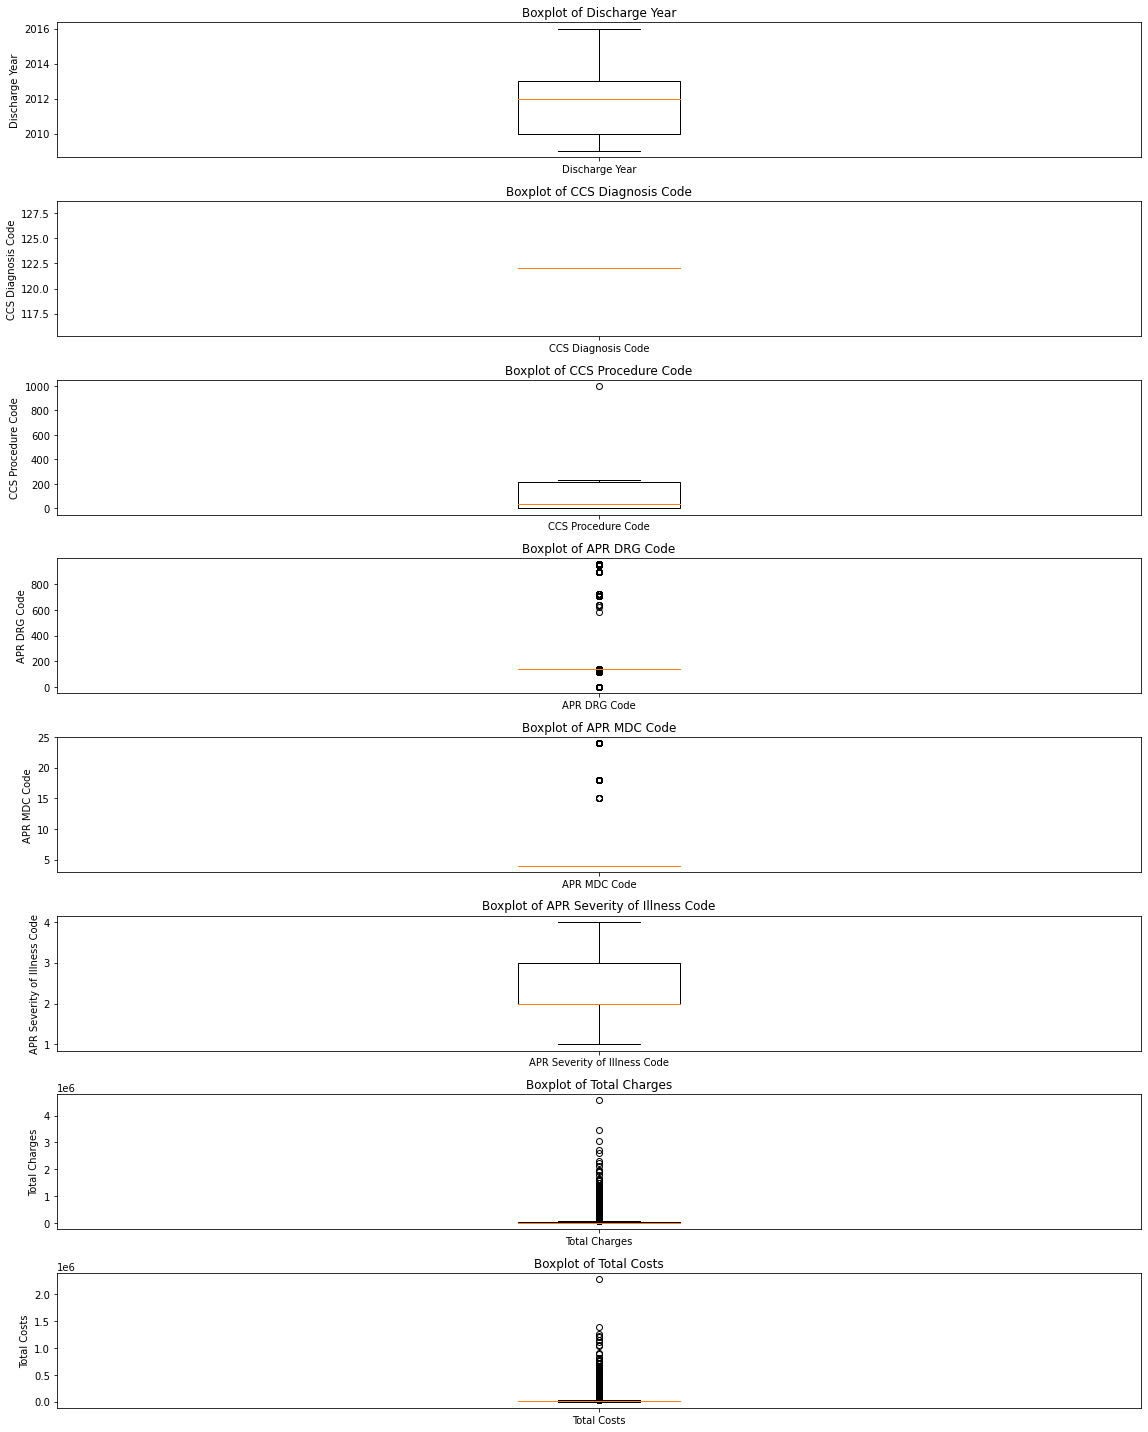

In [86]:
# Creating boxplots for numeric columns 

# Filter numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(16, 20))  # Increase size to accommodate more plots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)  # Number of rows = number of numerical columns
    plt.boxplot(df[col].dropna())  # Drop NaN values for the boxplot
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.xticks([1], [col])  # Set x-tick labels

plt.tight_layout()
plt.show()

Justification for Keeping Outliers:

1. APR MDC Code and APR DRG Code: These codes categorize medical diagnoses and treatments. Outliers in these codes might represent rare or unusual cases that are crucial for a complete analysis of the patient population. Excluding them could lead to a biased understanding of the diagnosis and treatment distributions.


2. Total Charges: Outliers in total charges can indicate exceptionally high-cost cases, such as complex or prolonged hospitalizations. Retaining these outliers is important for accurately assessing the full range of charges.


3. Total Costs: Similarly, outliers in total costs may reflect extreme cases with unusually high or low costs. Including these outliers ensures a thorough evaluation of cost patterns and helps in identifying factors that contribute to significant cost variations.

### 2.7 Reviewing the Cleaned Data

In [87]:
# Shape of the data 
df.shape

(379040, 28)

Our cleaned data has 379,040 rows and 29 columns

In [88]:
# Checking the columns
df.columns

Index(['Health Service Area', 'Hospital County', 'Facility Name', 'Age Group',
       'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity', 'Length of Stay',
       'Type of Admission', 'Patient Disposition', 'Discharge Year',
       'CCS Diagnosis Code', 'CCS Diagnosis Description', 'CCS Procedure Code',
       'CCS Procedure Description', 'APR DRG Code', 'APR DRG Description',
       'APR MDC Code', 'APR MDC Description', 'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Emergency Department Indicator',
       'Total Charges', 'Total Costs', 'Payment Typology 1'],
      dtype='object')

In [89]:
# The data types
print("\nData types of the columns:")
print(df.dtypes)


Data types of the columns:
Health Service Area                     object
Hospital County                         object
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                      int32
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                          object
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                     float64
CCS Diagnosis Description               object
CCS Procedure Code                     float64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Description                     object
APR Severity of Illness Code    

In [90]:
# Sample of the data
print("\nRandom sample of the cleaned data:")
print(df.sample(5)) 


Random sample of the cleaned data:
       Health Service Area Hospital County  \
284584         Long Island         Suffolk   
27247        Southern Tier     St Lawrence   
208839       New York City           Bronx   
214279       New York City           Kings   
198579      Capital/Adiron        Saratoga   

                                            Facility Name    Age Group  \
284584    Brookhaven Memorial Hospital Medical Center Inc  70 or Older   
27247                           Massena Memorial Hospital  70 or Older   
208839  Bronx-Lebanon Hospital Center - Concourse Divi...     30 to 49   
214279                   Kingsbrook Jewish Medical Center  70 or Older   
198579                                  Saratoga Hospital  70 or Older   

        Zip Code - 3 digits Gender                    Race          Ethnicity  \
284584                  117      M                   White  Not Span/Hispanic   
27247                   129      M                   White  Not Span/Hispanic   

# 3. Exploratory Data Analysis

## 3.1 Univariate Analysis

### Descriptive Statistics

In [36]:
# Descriptive Statistics 
df.describe()

,Zip Code - 3 digits,Discharge Year,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges,Total Costs
count,379040.000000,379040.000000,379040.0,379040.000000,379040.000000,379040.000000,379040.000000,3.790400e+05,3.790400e+05
mean,119.360345,2011.900251,122.0,97.007661,155.498185,4.296570,2.433157,3.171435e+04,1.144247e+04
std,14.188260,2.192895,0.0,104.304281,115.154542,2.411541,0.838668,4.983998e+04,1.934008e+04
min,100.000000,2009.000000,122.0,0.000000,1.000000,4.000000,1.000000,2.000000e-02,0.000000e+00
25%,109.000000,2010.000000,122.0,0.000000,139.000000,4.000000,2.000000,1.055899e+04,4.276148e+03
50%,115.000000,2012.000000,122.0,39.000000,139.000000,4.000000,2.000000,1.907150e+04,6.996460e+03
75%,130.000000,2013.000000,122.0,217.000000,139.000000,4.000000,3.000000,3.540068e+04,1.217406e+04
max,149.000000,2016.000000,122.0,999.000000,952.000000,24.000000,4.000000,4.563146e+06,2.284311e+06


### Histograms for numeric columns

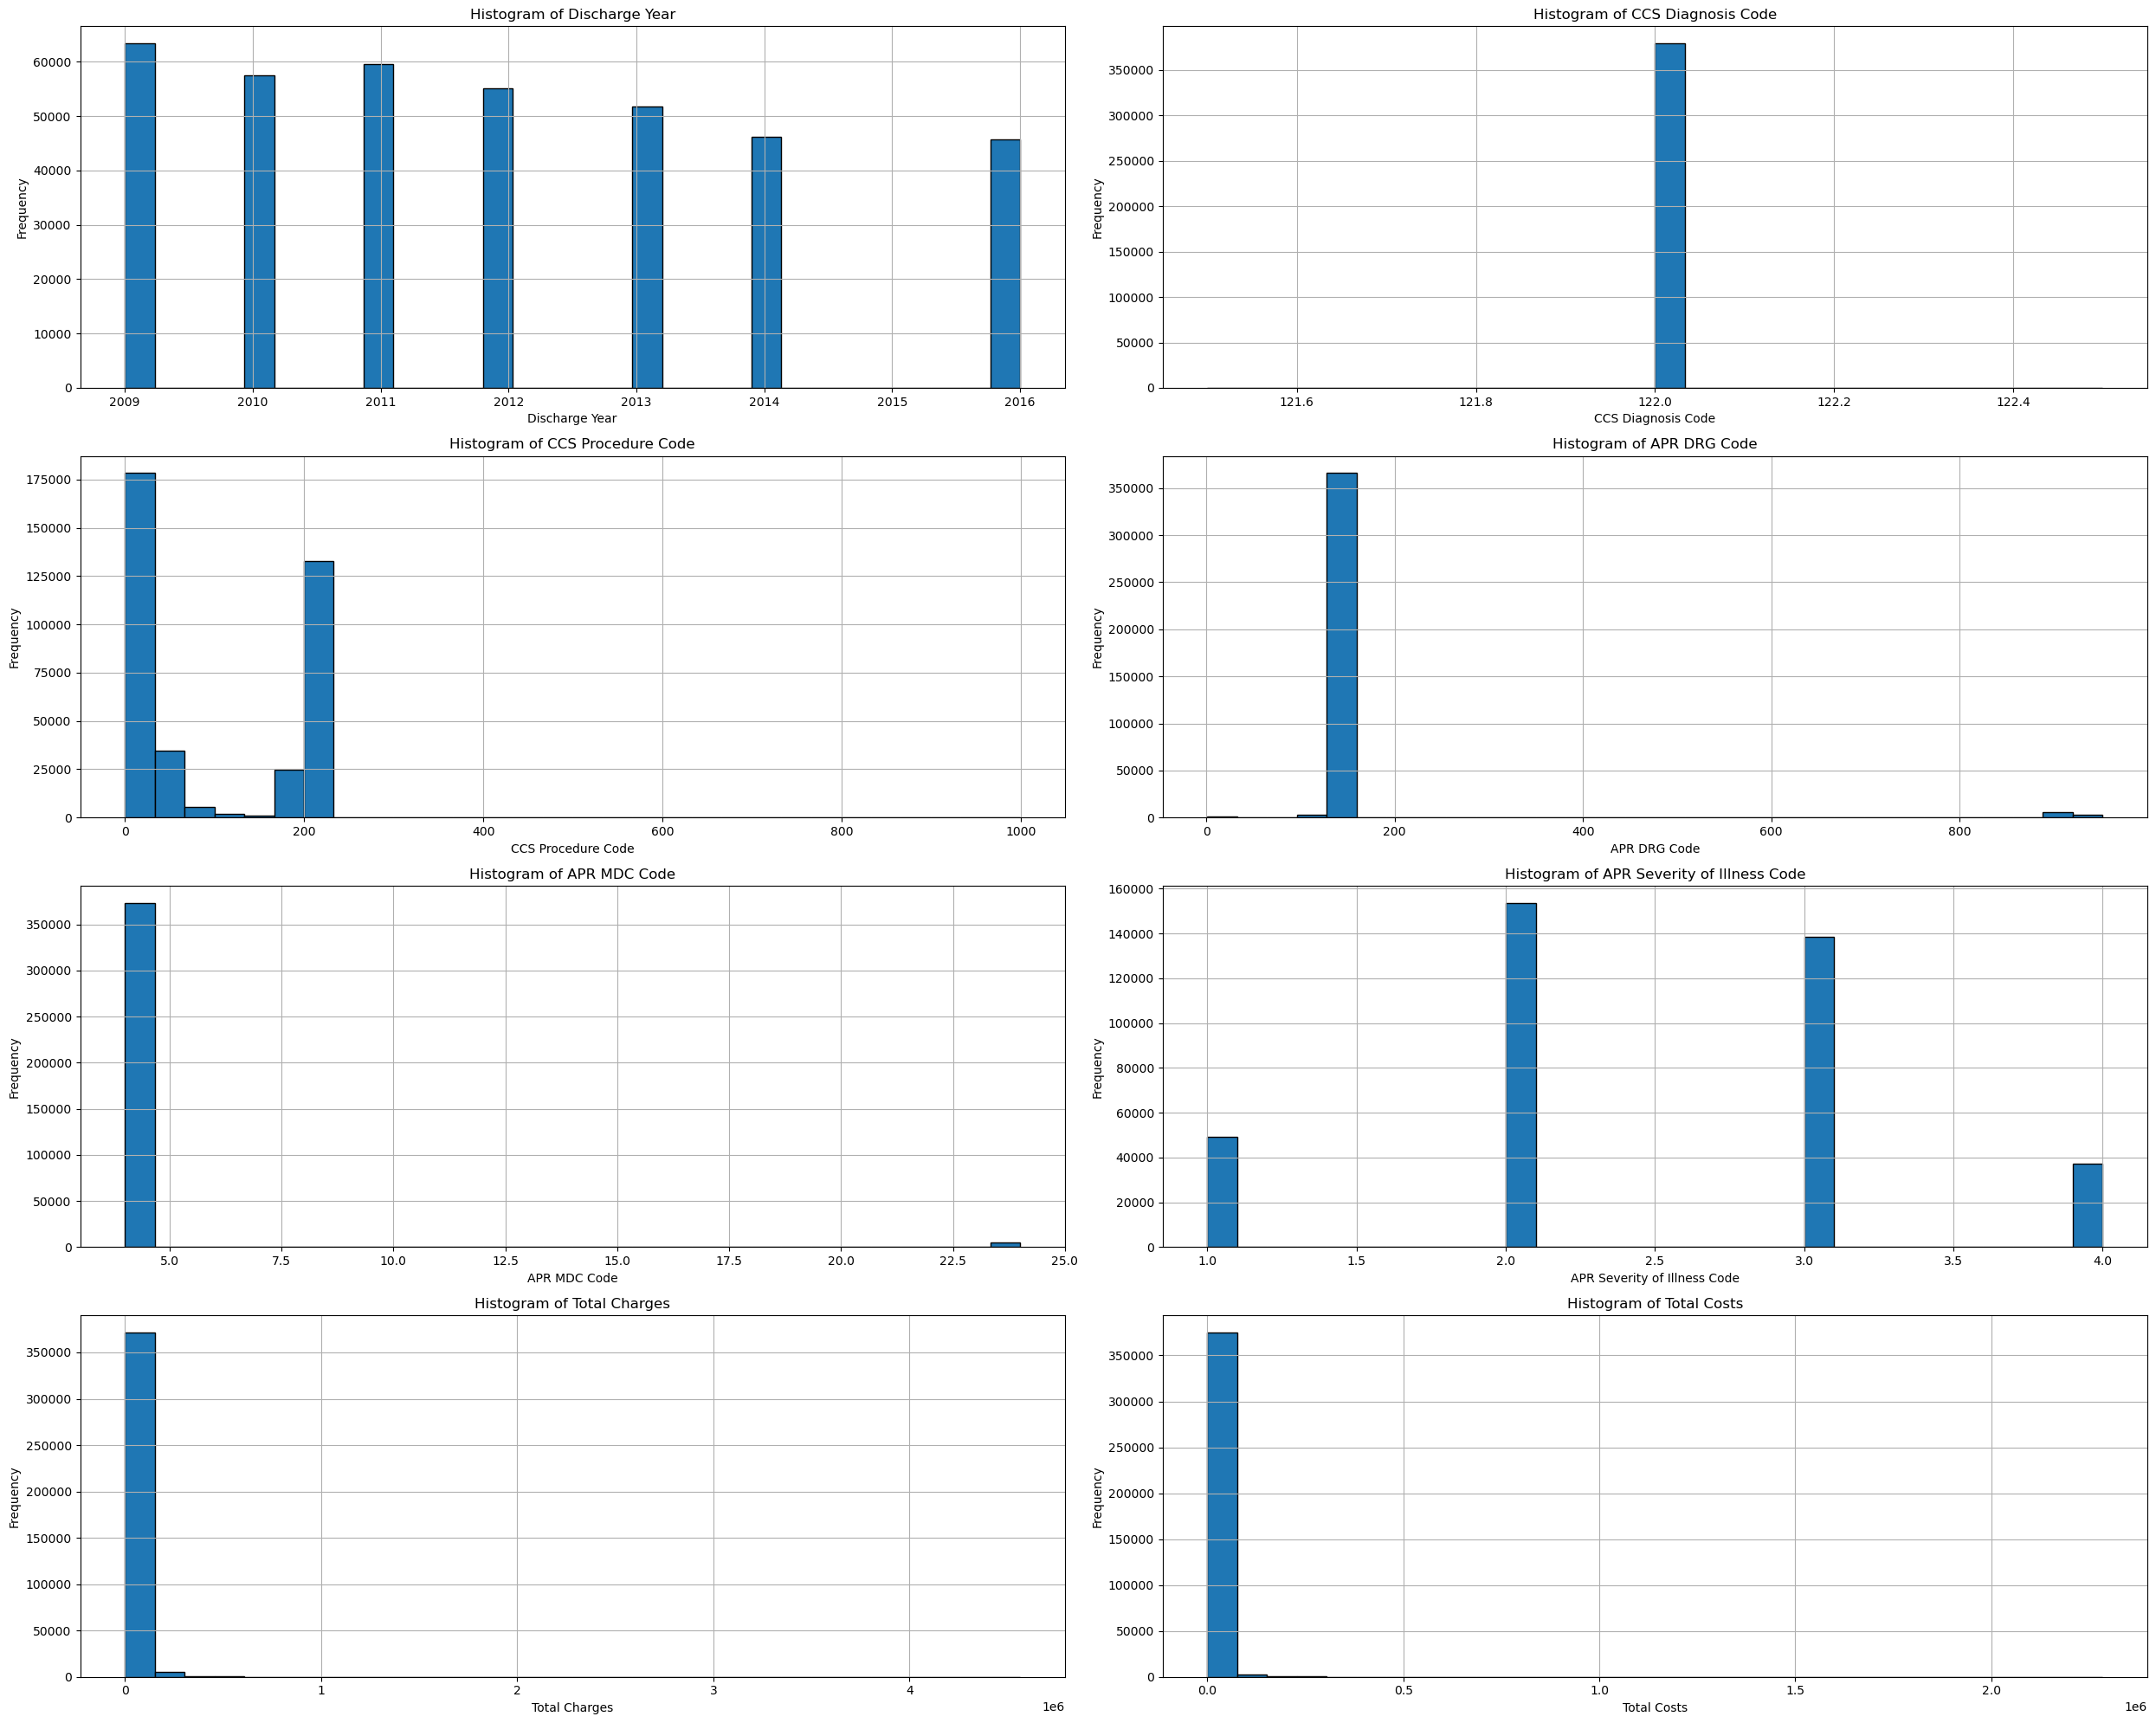

In [37]:
# Plot histograms for all numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Determine grid size (rows x columns)
n_cols = 2  # Number of columns for the grid
n_rows = -(-len(numeric_cols) // n_cols)  # Number of rows needed

plt.figure(figsize=(25, 5 * n_rows))
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].hist(bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The histograms of the numeric columns reveal varying distributions. Some columns exhibit skewed distributions, indicating that data is not evenly spread and may be concentrated towards one end of the range. Other columns show more symmetric distributions, suggesting a more uniform spread of values. 

### Count Plots for categorical variables

In [38]:
df.select_dtypes(include=['object', 'category']).columns.tolist()

['Health Service Area',
 'Hospital County',
 'Facility Name',
 'Age Group',
 'Gender',
 'Race',
 'Ethnicity',
 'Length of Stay',
 'Type of Admission',
 'Patient Disposition',
 'CCS Diagnosis Description',
 'CCS Procedure Description',
 'APR DRG Description',
 'APR MDC Description',
 'APR Severity of Illness Description',
 'APR Risk of Mortality',
 'APR Medical Surgical Description',
 'Emergency Department Indicator',
 'Payment Typology 1']

In [39]:
cat_cols = ['Health Service Area','Age Group','Gender','Race','Ethnicity','Type of Admission','Patient Disposition',
          'APR Severity of Illness Description','APR Risk of Mortality',
          'APR Medical Surgical Description','Payment Typology 1','Emergency Department Indicator']

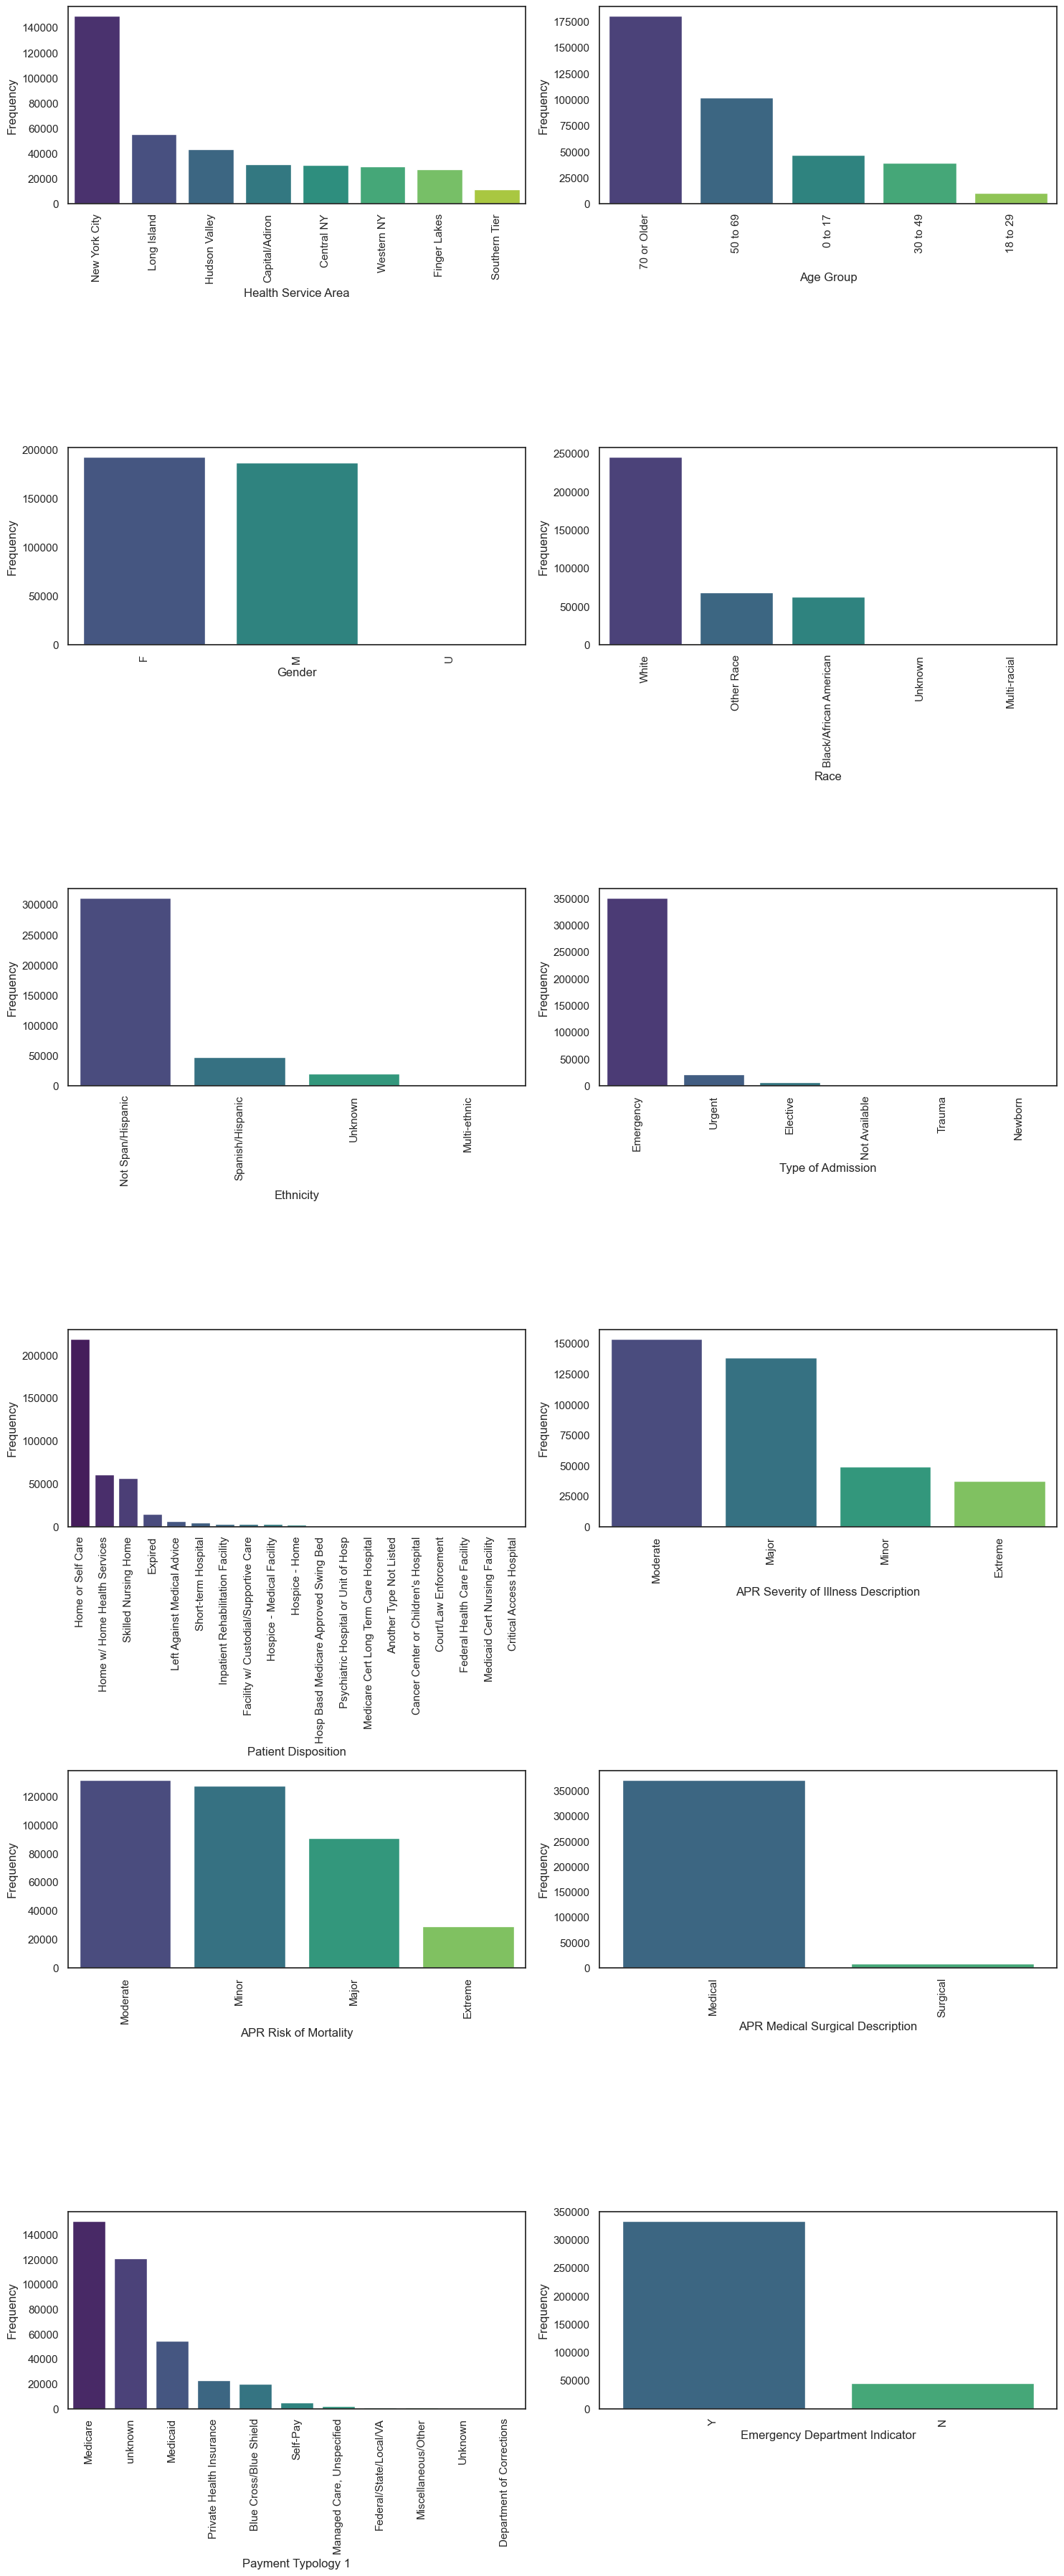

In [40]:
rows = 7
columns = 2
index = 1
plt.figure(figsize=(15,40))
sns.set(style='white')
for i in cat_cols:
    plt.subplot(rows,columns,index)
    sns.countplot(x=df[i],order = df[i].value_counts().index,palette="viridis")
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    index +=1
plt.tight_layout()
plt.show()

### Interpretation

No of patients are quietly more in New York city than other cities.

More number of patients fall in the age category 70 years or older.

Female patients are more in number as comapre to male patients.

Patients enrolled in Emergency are huge in number.

Patient Disposition i.e. patients destination after discharge, mostly are in Home or Self Care prescription.

Mostly patients have Minor Risk of Mortality.

Patients have Medicare payment typology more

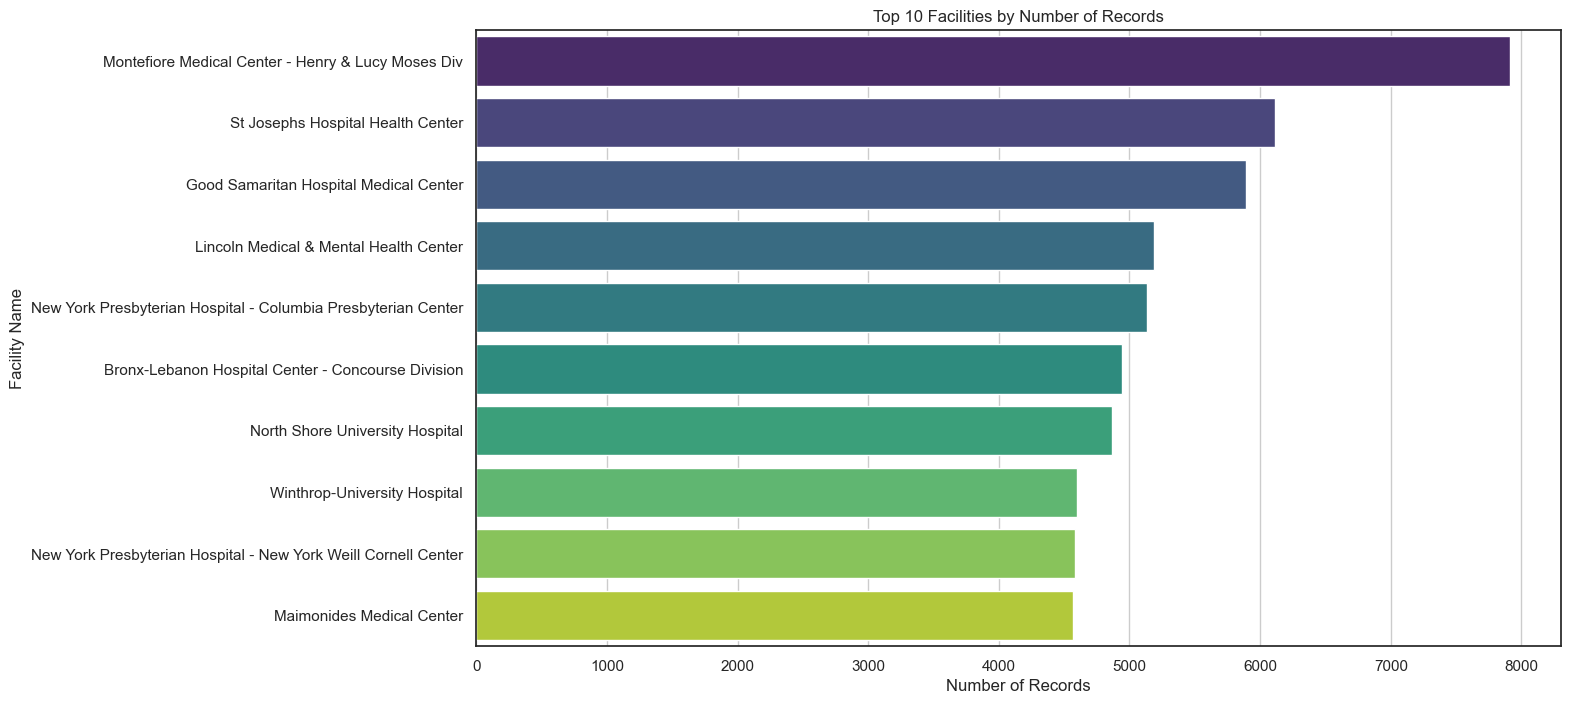

In [41]:
# Count the number of records per Facility Name
facility_counts = df['Facility Name'].value_counts()

# Create a DataFrame for plotting
facility_df = pd.DataFrame({'Facility Name': facility_counts.index, 'Count': facility_counts.values})

top_n = facility_df.head(10)

# Plot the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Facility Name', data=top_n, palette='viridis')
plt.title(f'Top 10 Facilities by Number of Records')
plt.xlabel('Number of Records')
plt.ylabel('Facility Name')
plt.grid(axis='x')
plt.show()

The graph shows the top 10 facilities based on the number of records, with Montefiore Medical Center having the highest number of records.

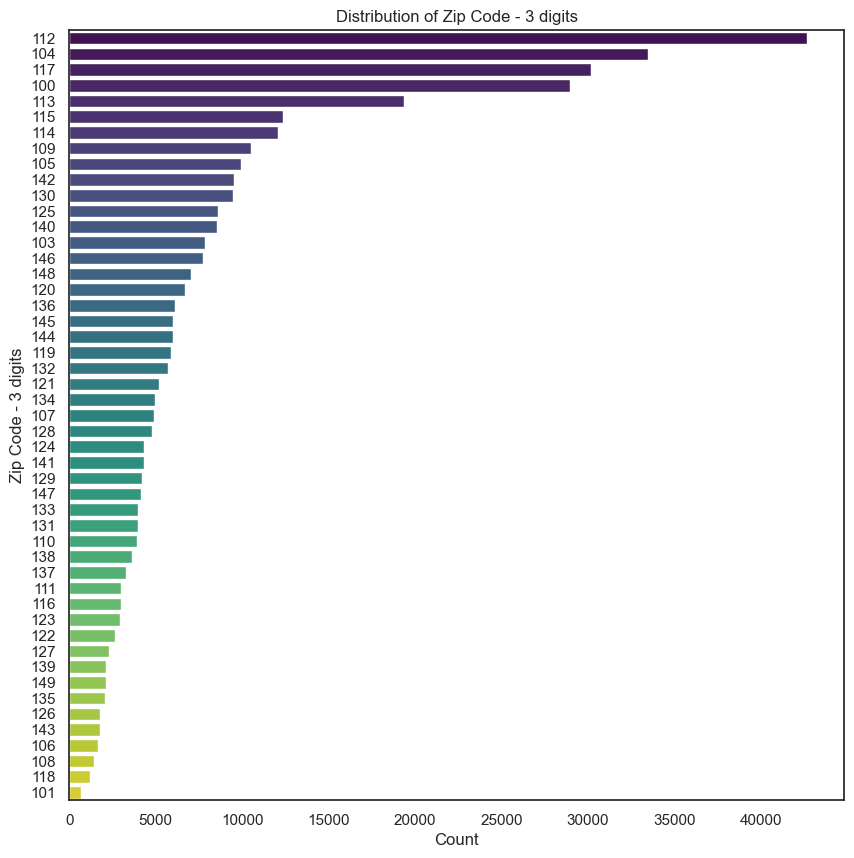

In [42]:
# Zip Code distribution 
plt.figure(figsize=(10, 10))
sns.countplot(y=df['Zip Code - 3 digits'], order=df['Zip Code - 3 digits'].value_counts().index, palette='viridis')
plt.title('Distribution of Zip Code - 3 digits')
plt.xlabel('Count')
plt.ylabel('Zip Code - 3 digits')
plt.show()

The most prevelant Zip Code is 122

In [43]:
# Extract the top 10 and bottom 10 Length of Stay values
top_10_los = df['Length of Stay'].value_counts().nlargest(10).index
bottom_10_los = df['Length of Stay'].value_counts().nsmallest(10).index

# Print Top 10 Length of Stay values
print("Top 10 Length of Stay Values and Their Counts:")
top_10_counts = df['Length of Stay'].value_counts().loc[top_10_los]
print(top_10_counts)

# Print Bottom 10 Length of Stay values
print("\nBottom 10 Length of Stay Values and Their Counts:")
bottom_10_counts = df['Length of Stay'].value_counts().loc[bottom_10_los]
print(bottom_10_counts)


Top 10 Length of Stay Values and Their Counts:
Length of Stay
3     62614
2     59645
4     50945
5     38431
1     33253
6     29048
7     23189
8     16728
9     12231
10     9487
Name: count, dtype: int64

Bottom 10 Length of Stay Values and Their Counts:
Length of Stay
106    1
116    1
119    1
93     1
99     1
108    1
112    2
107    2
113    2
105    2
Name: count, dtype: int64


The top 10 lengths of stay predominantly range from 1 to 10 days, with shorter stays being much more common. In contrast, the bottom 10 lengths of stay, which are significantly longer, are rare, indicating that extended stays are exceptional in the dataset.

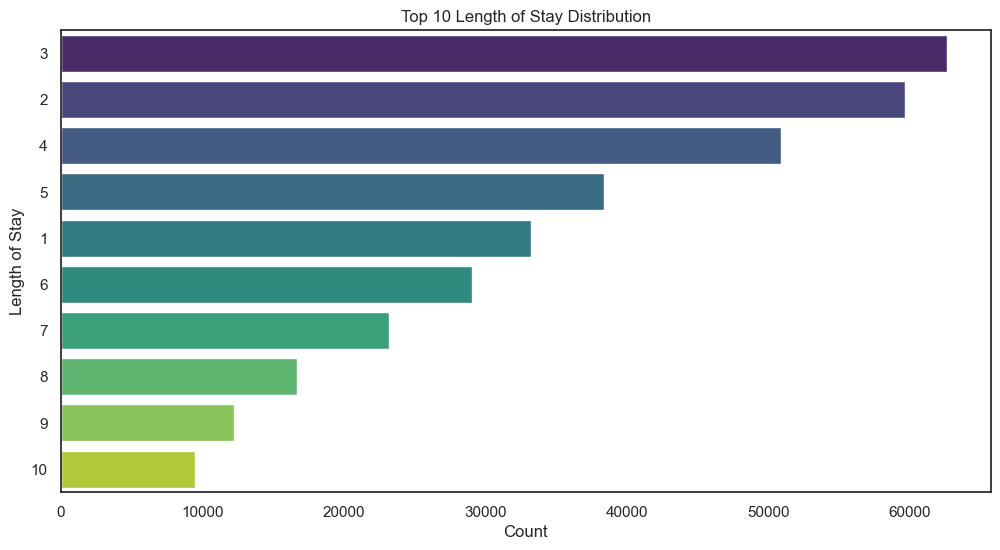

In [44]:
# Filter the DataFrame to include only top 10 lengths of stay
top_10_df = df[df['Length of Stay'].isin(top_10_los)]

# Plot for Top 10 Length of Stay
plt.figure(figsize=(12, 6))
sns.countplot(y='Length of Stay', data=top_10_df, order=top_10_los, palette="viridis")
plt.title('Top 10 Length of Stay Distribution')
plt.xlabel('Count')
plt.ylabel('Length of Stay')
plt.show()

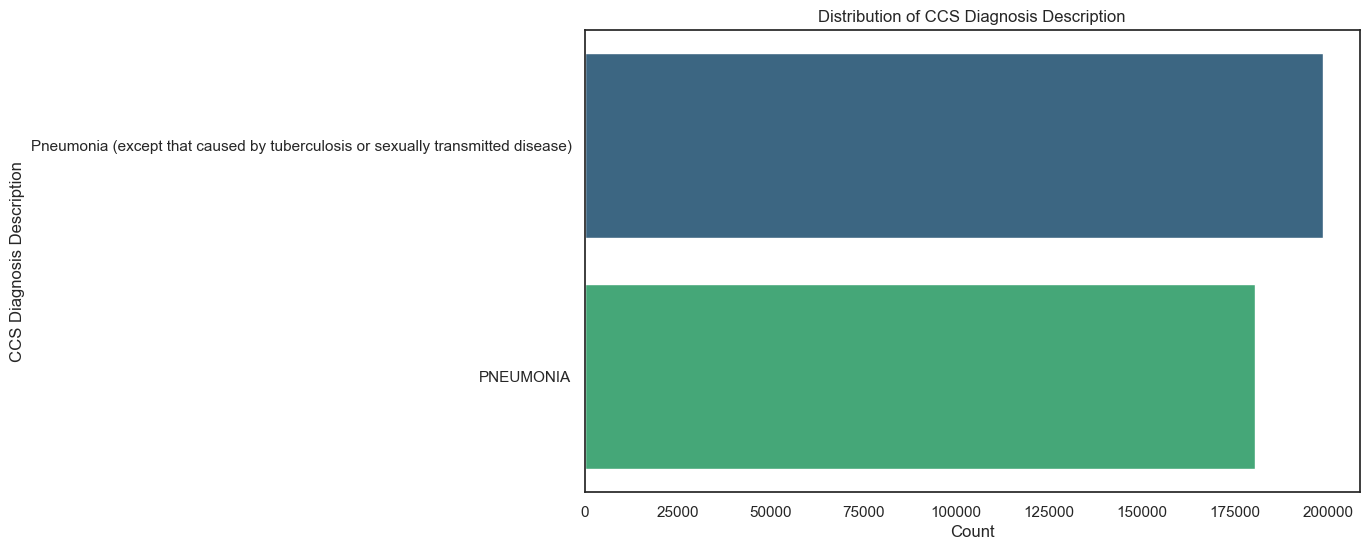

In [45]:
# Distribution of CCS Diagnosis Description
plt.figure(figsize=(10, 6))
sns.countplot(y=df['CCS Diagnosis Description'], order=df['CCS Diagnosis Description'].value_counts().index, palette="viridis")
plt.title('Distribution of CCS Diagnosis Description')
plt.xlabel('Count')
plt.ylabel('CCS Diagnosis Description')
plt.show()

The most dominant CCS diagnosis is Pneumonia that is either caused by tuberculosis or sexually transmitted diseases

In [46]:
# Get the top 10 and bottom 10 CCS Procedure Descriptions
top_10_ccs = df['CCS Procedure Description'].value_counts().head(10).index
bottom_10_ccs = df['CCS Procedure Description'].value_counts().tail(10).index

# Filter the DataFrame for the top 10 CCS Procedure Descriptions
top_10_df = df[df['CCS Procedure Description'].isin(top_10_ccs)]

# Get the count of each CCS Procedure Description in the top 10
top_10_counts = top_10_df['CCS Procedure Description'].value_counts()

# Print the top 10 CCS Procedure Descriptions and their counts
print("Top 10 CCS Procedure Descriptions and Their Counts:")
print(top_10_counts)

# Filter the DataFrame for the bottom 10 CCS Procedure Descriptions
bottom_10_df = df[df['CCS Procedure Description'].isin(bottom_10_ccs)]

# Get the count of each CCS Procedure Description in the bottom 10
bottom_10_counts = bottom_10_df['CCS Procedure Description'].value_counts()

# Print the bottom 10 CCS Procedure Descriptions and their counts
print("\nBottom 10 CCS Procedure Descriptions and Their Counts:")
print(bottom_10_counts)

Top 10 CCS Procedure Descriptions and Their Counts:
CCS Procedure Description
NO PROC                    176546
OTHER THERAPEUTIC PRCS      68144
RESP INTUB/MECH VENTIL      24430
OTHER RESP THERAPY          14283
BLOOD TRANSFUSION            9114
DX BRONCHOSCOPY & BIOPS      7971
CT SCAN CHEST                7673
HEMODIALYSIS                 7547
DX ULTRASOUND HEART          6646
OT VASC CATH; NOT HEART      5529
Name: count, dtype: int64

Bottom 10 CCS Procedure Descriptions and Their Counts:
CCS Procedure Description
MYELOGRAM                  1
LOC EXC LRG INTEST LESN    1
VARI VEIN STRIP;LOW LMB    1
REPAIR RETINAL TEAR        1
FETAL MONITORING           1
MASTECTOMY                 1
HYSTERECTOMY; AB/VAG       1
EXC OF SEMI CART KNEE      1
OT PRCS TO ASSIST DELIV    1
UNGROUPABLE                1
Name: count, dtype: int64


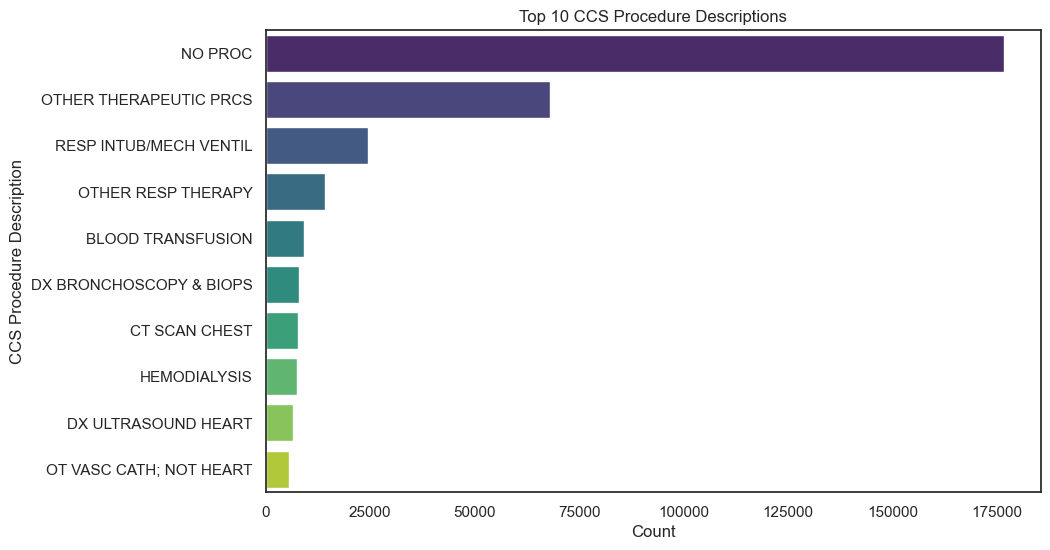

In [47]:
# Plot the top 10 CCS Procedure Descriptions
plt.figure(figsize=(10, 6))
sns.countplot(y=df['CCS Procedure Description'], order=top_10_ccs, palette="viridis")
plt.title('Top 10 CCS Procedure Descriptions')
plt.xlabel('Count')
plt.ylabel('CCS Procedure Description')
plt.show()

In the dataset, "NO PROC" is the most common CCS Procedure Description, indicating that no procedure was performed in these cases. In contrast, the least common descriptions, each with only one occurrence, include rare or less frequently performed procedures.

In [48]:
# Get the top 10 most frequent APR DRG Descriptions
top_10_apr_drg = df['APR DRG Description'].value_counts().head(10).index

# Filter the DataFrame for the top 10 APR DRG Descriptions
top_10_df = df[df['APR DRG Description'].isin(top_10_apr_drg)]

# Get the bottom 10 least frequent APR DRG Descriptions
bottom_10_apr_drg = df['APR DRG Description'].value_counts().tail(10).index

# Filter the DataFrame for the bottom 10 APR DRG Descriptions
bottom_10_df = df[df['APR DRG Description'].isin(bottom_10_apr_drg)]

# Print the top 10 APR DRG Descriptions and their counts
print("Top 10 APR DRG Descriptions and Their Counts:")
print(top_10_df['APR DRG Description'].value_counts())

# Print the bottom 10 APR DRG Descriptions and their counts
print("\nBottom 10 APR DRG Descriptions and Their Counts:")
print(bottom_10_df['APR DRG Description'].value_counts())

Top 10 APR DRG Descriptions and Their Counts:
APR DRG Description
Other pneumonia                                                174769
OTHER PNEUMONIA                                                159696
Major respiratory infections & inflammations                    12011
MAJOR RESPIRATORY INFECTIONS & INFLAMMATIONS                     8961
RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS      3334
Respiratory system diagnosis w ventilator support 96+ hours      2796
Bronchiolitis & RSV pneumonia                                    1668
BRONCHIOLITIS & RSV PNEUMONIA                                    1227
HIV W ONE SIGNIF HIV COND OR W/O SIGNIF RELATED COND             1131
HIV w major HIV related condition                                 888
Name: count, dtype: int64

Bottom 10 APR DRG Descriptions and Their Counts:
APR DRG Description
Other infectious & parasitic diseases                         7
BONE MARROW TRANSPLANT                                        2
NEONATE, B

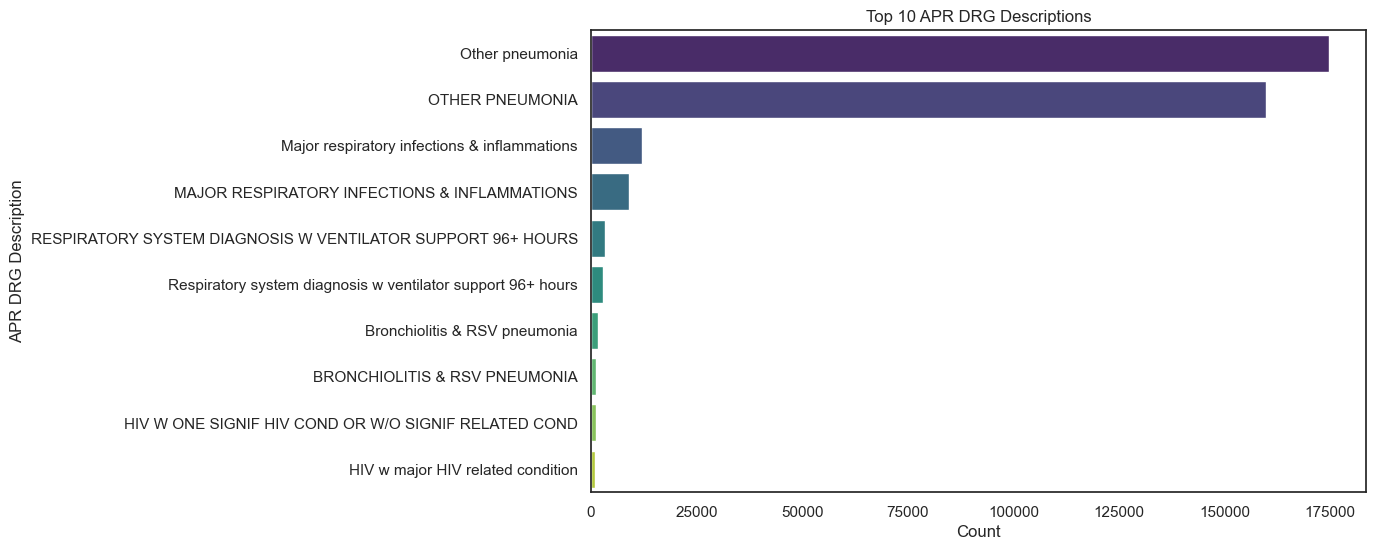

In [49]:
# Plot for the top 10 APR DRG Descriptions
plt.figure(figsize=(10, 6))
sns.countplot(y=top_10_df['APR DRG Description'], order=top_10_apr_drg, palette="viridis")
plt.title('Top 10 APR DRG Descriptions')
plt.xlabel('Count')
plt.ylabel('APR DRG Description')
plt.show()

The top 10 APR DRG descriptions primarily focus on pneumonia and respiratory conditions, with "Other pneumonia" and "OTHER PNEUMONIA" being the most common. Conversely, the bottom 10 descriptions are rare and involve specific or complex procedures such as bone marrow and heart transplants, with counts as low as 1 or 2.

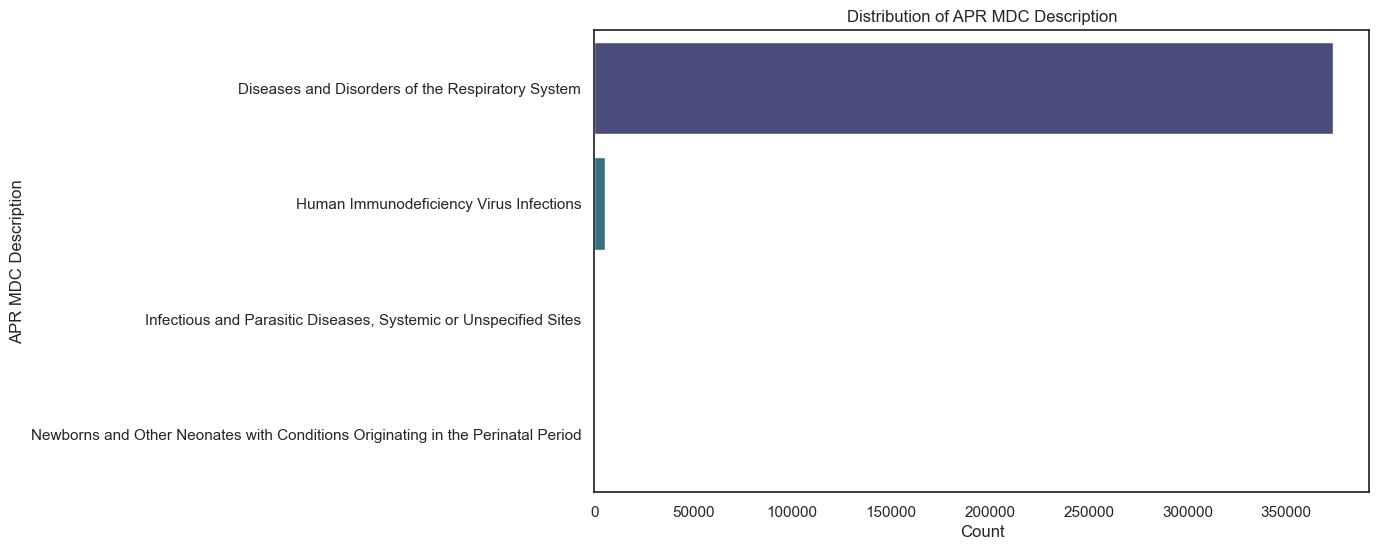

In [50]:
# Distribution of APR MDC Description
plt.figure(figsize=(10, 6))
sns.countplot(y=df['APR MDC Description'], order=df['APR MDC Description'].value_counts().index, palette="viridis")
plt.title('Distribution of APR MDC Description')
plt.xlabel('Count')
plt.ylabel('APR MDC Description')
plt.show()

The most dominant APR MDC Description is Diseases and Disorders of the Respiratory System

## 3.2 Bivariate Analysis

### Variables vs Target Variable

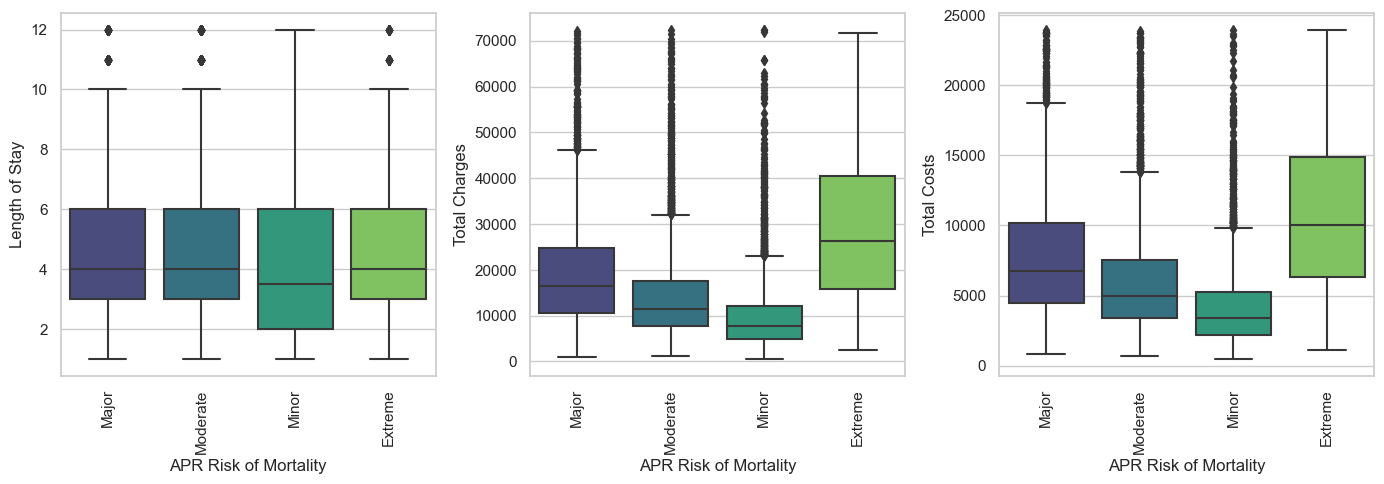

In [51]:
df['Length of Stay'] = df['Length of Stay'].replace('120 +', 130).astype(float)

rows = 1
columns = 3
index = 1
plt.figure(figsize = (14,5))
sns.set_style('whitegrid')
for i in ['Length of Stay','Total Charges','Total Costs']:
    plt.subplot(rows,columns,index)
    q1=df[i].quantile(.25)
    q3=df[i].quantile(.75)
    iqr=q3-q1
    sns.boxplot(x='APR Risk of Mortality',y=i,palette="viridis",
                data=df[df[i]<q3+1.5*iqr][0:10000])
    plt.xticks(rotation = 90)
    index +=1
plt.tight_layout()
plt.show()

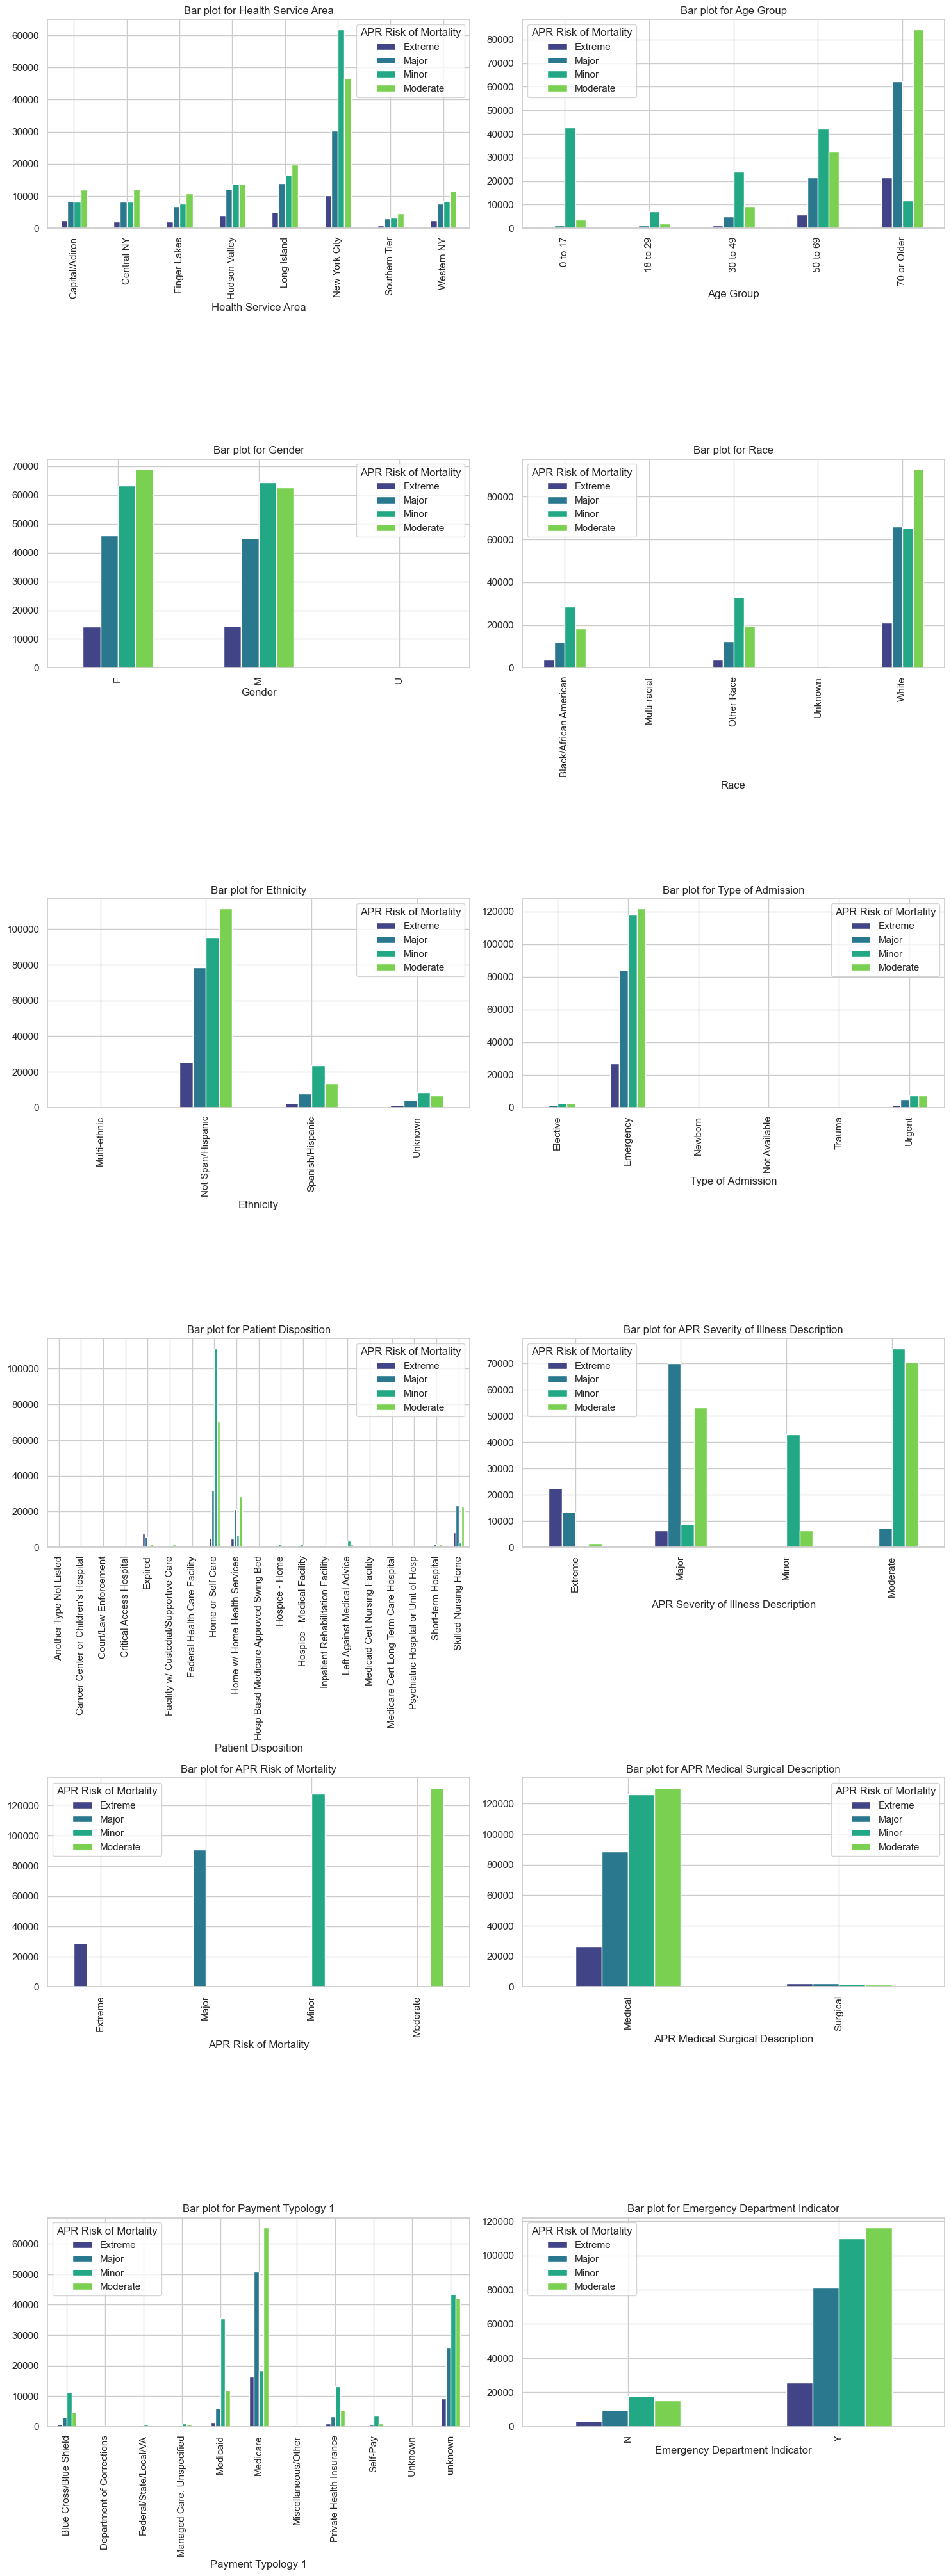

In [52]:
rows = 7
cols = 2
index = 1

# Create a figure with specified size
plt.figure(figsize=(15, 45))

# Define a custom color palette
palette = sns.color_palette("viridis", n_colors=len(df['APR Risk of Mortality'].unique()))

# Loop through categorical columns and create subplots
for i in cat_cols:
    if index > rows * cols:
        break
    ax = plt.subplot(rows, cols, index)
    
    # Create crosstab and plot
    crosstab = pd.crosstab(df[i], df['APR Risk of Mortality'])
    crosstab.plot.bar(ax=ax, color=palette)
    
    ax.set_title(f'Bar plot for {i}')
    index += 1

plt.tight_layout()
plt.show()

### Gender Vs Other Features

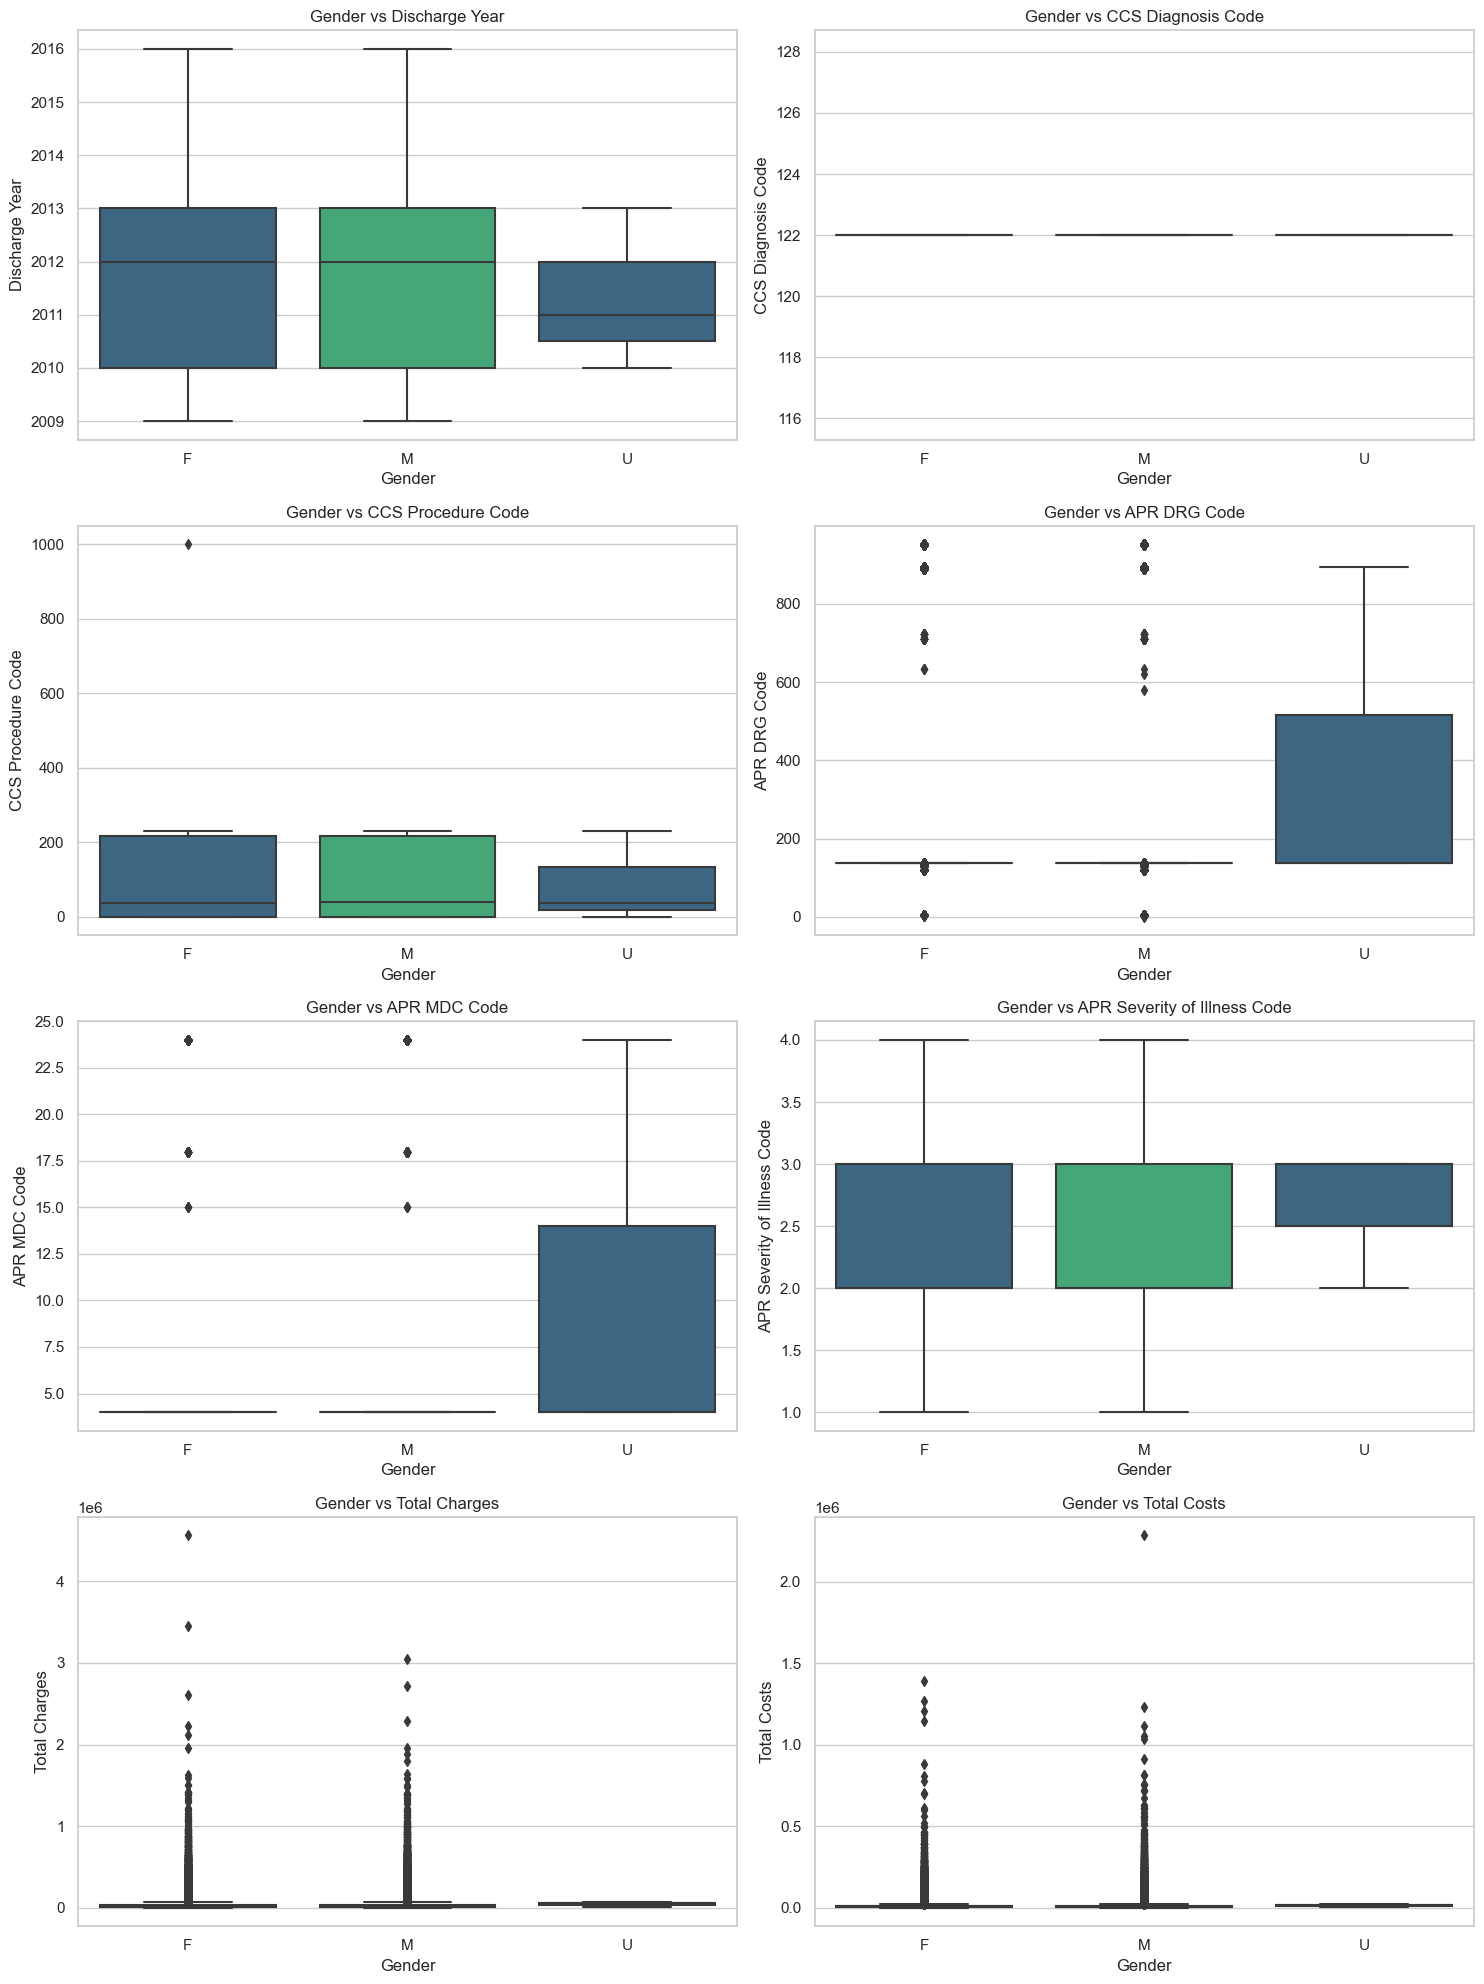

In [53]:
# Set up the figure with enough rows to accommodate all plots
rows = (len(numerical_cols) + 1) // 2  # Ensure enough rows for all plots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, rows * 5))

# Set the color palette as a list of colors
palette = sns.color_palette("viridis", n_colors=2)  # 2 colors for the Gender categories

# Plot numerical columns
for i, col in enumerate(numerical_cols):
    ax = axes[i // 2, i % 2]  # Correctly index the axes
    sns.boxplot(x='Gender', y=col, data=df, ax=ax, palette=palette)
    ax.set_title(f'Gender vs {col}')

# Remove any unused subplots (if the number of plots is less than total subplots)
for j in range(len(numerical_cols), rows * 2):
    fig.delaxes(axes[j // 2, j % 2])

# Adjust layout
plt.tight_layout()
plt.show()

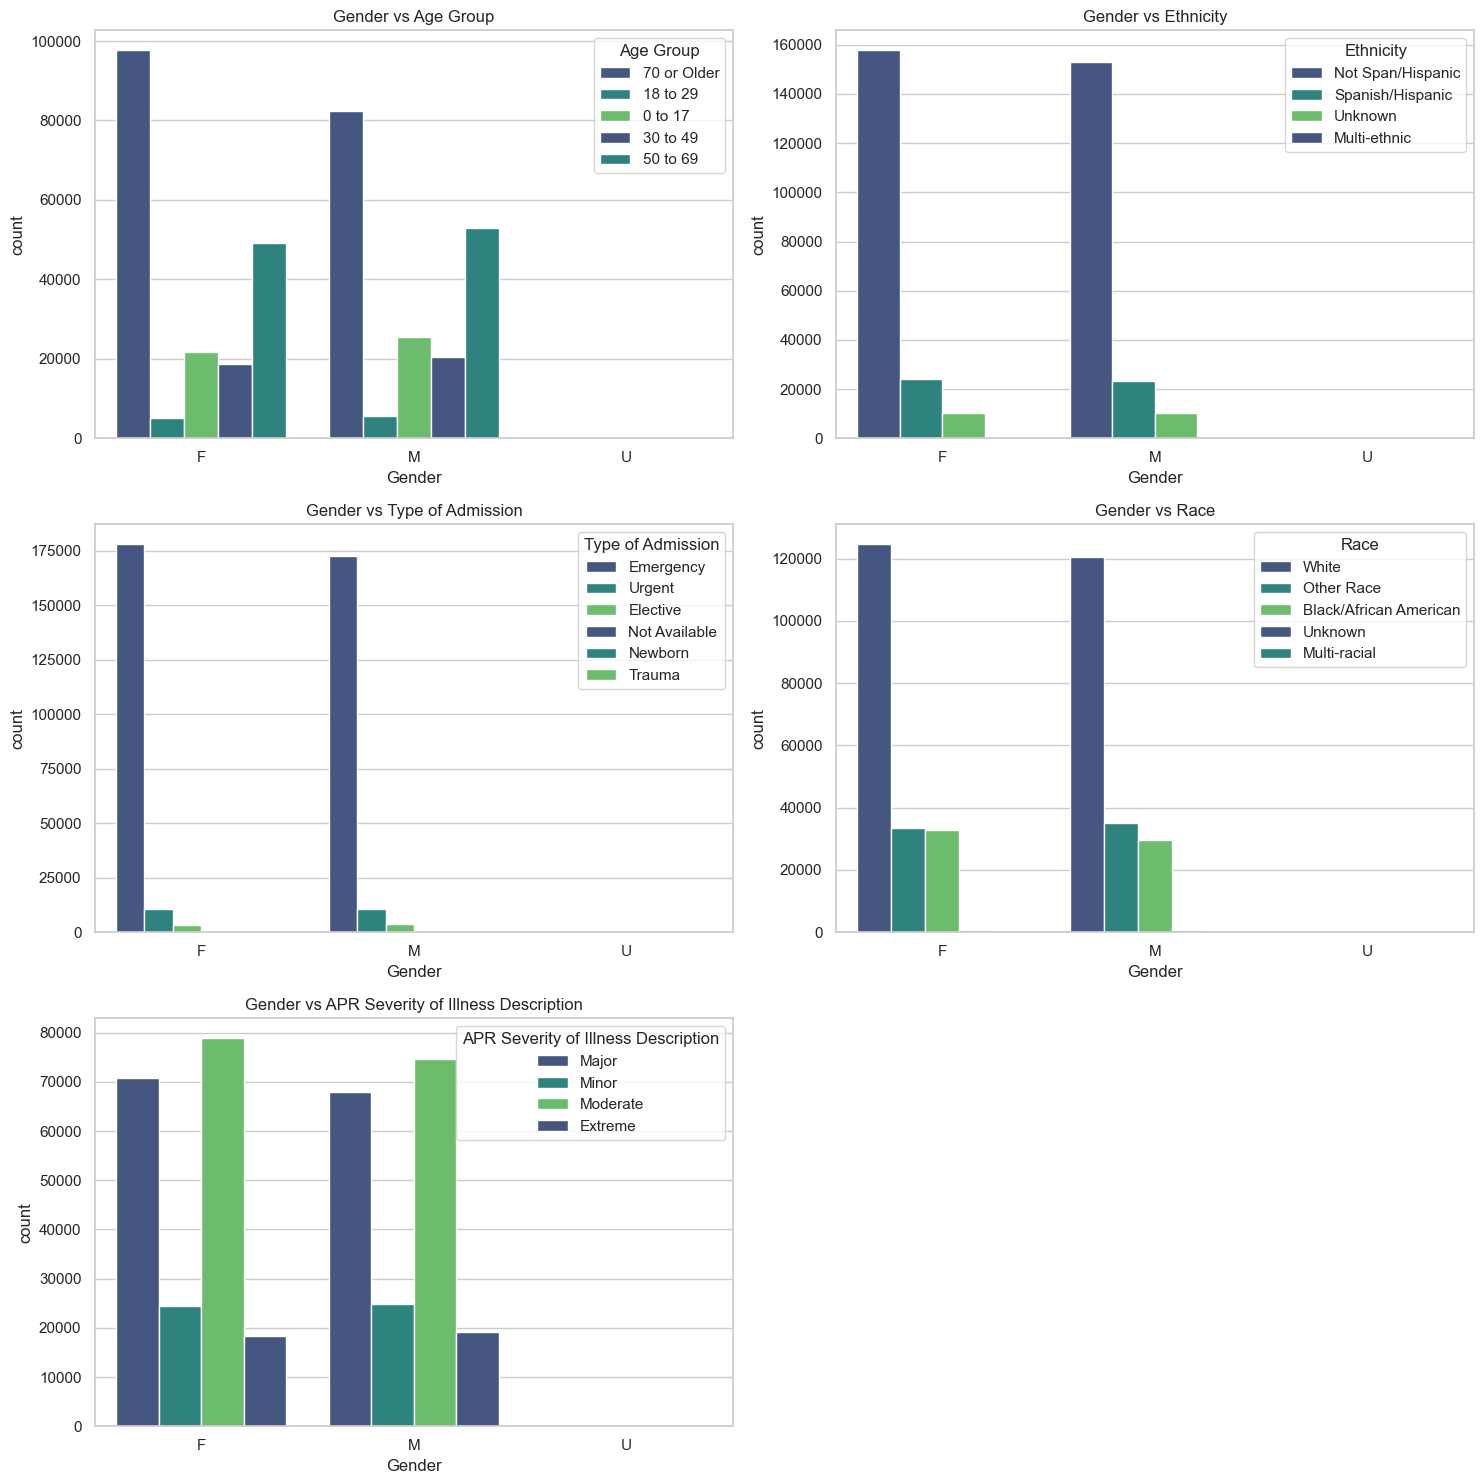

In [54]:
# Define the list of categorical columns to plot
categorical_cols = ['Age Group', 'Ethnicity', 'Type of Admission', 'Race', 'APR Severity of Illness Description']

# Calculate the number of rows needed
n_rows = (len(categorical_cols) + 1) // 2

# Set up the figure with the calculated number of rows
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, n_rows * 5))

# Set the color palette
palette = sns.color_palette("viridis", n_colors=len(df['Gender'].unique()))  # Adjust the number of colors based on unique values in 'Gender'

# Plot categorical columns
for i, col in enumerate(categorical_cols):
    sns.countplot(x='Gender', hue=col, data=df, ax=axes[i // 2, i % 2], palette=palette)
    axes[i // 2, i % 2].set_title(f'Gender vs {col}')

# Remove any unused subplots
for j in range(len(categorical_cols), n_rows * 2):
    fig.delaxes(axes[j // 2, j % 2])

# Adjust layout
plt.tight_layout()
plt.show()

### Total Costs Vs Other features

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\2456152702.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')


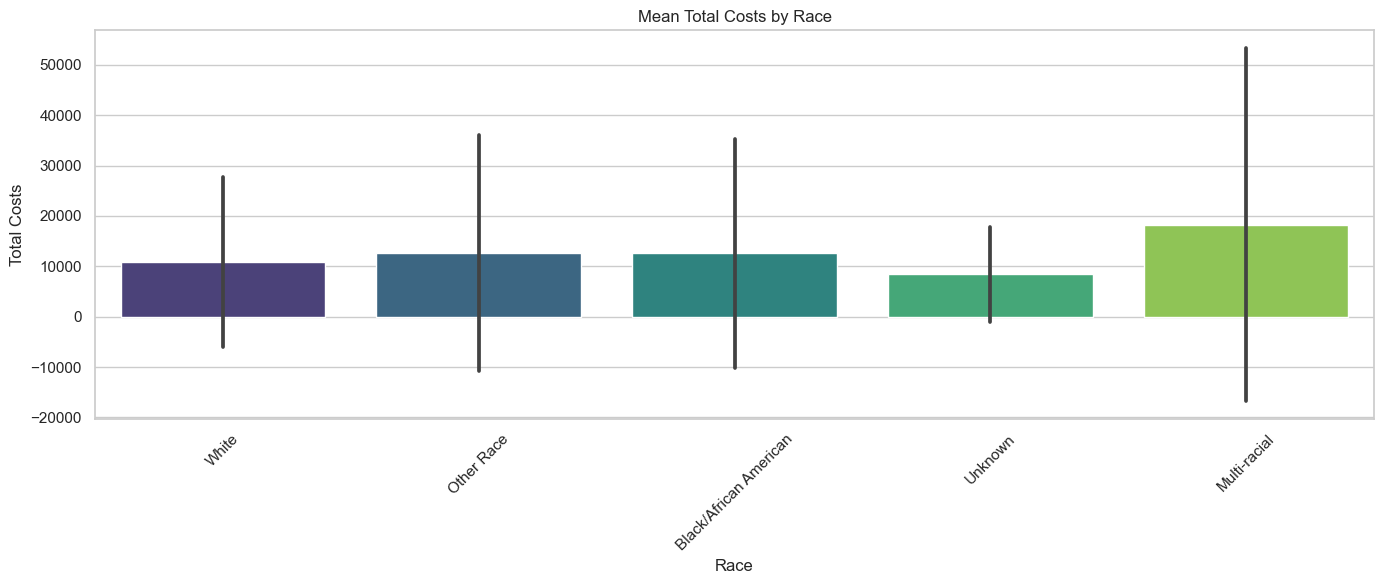

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\2456152702.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')


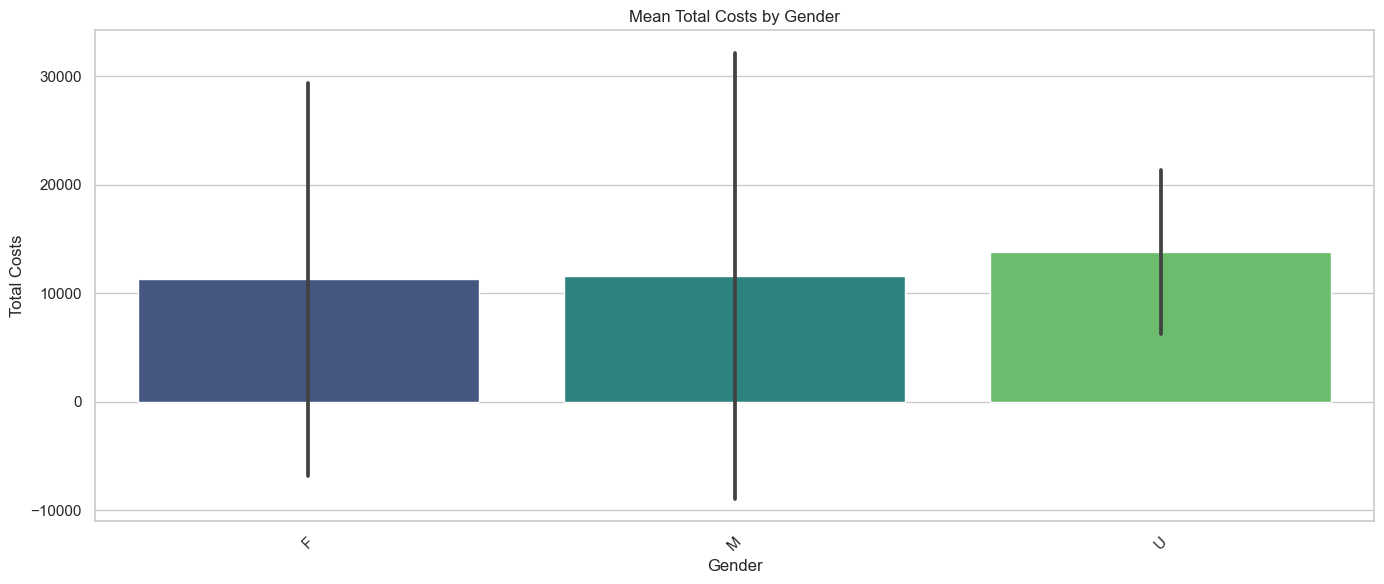

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\2456152702.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')


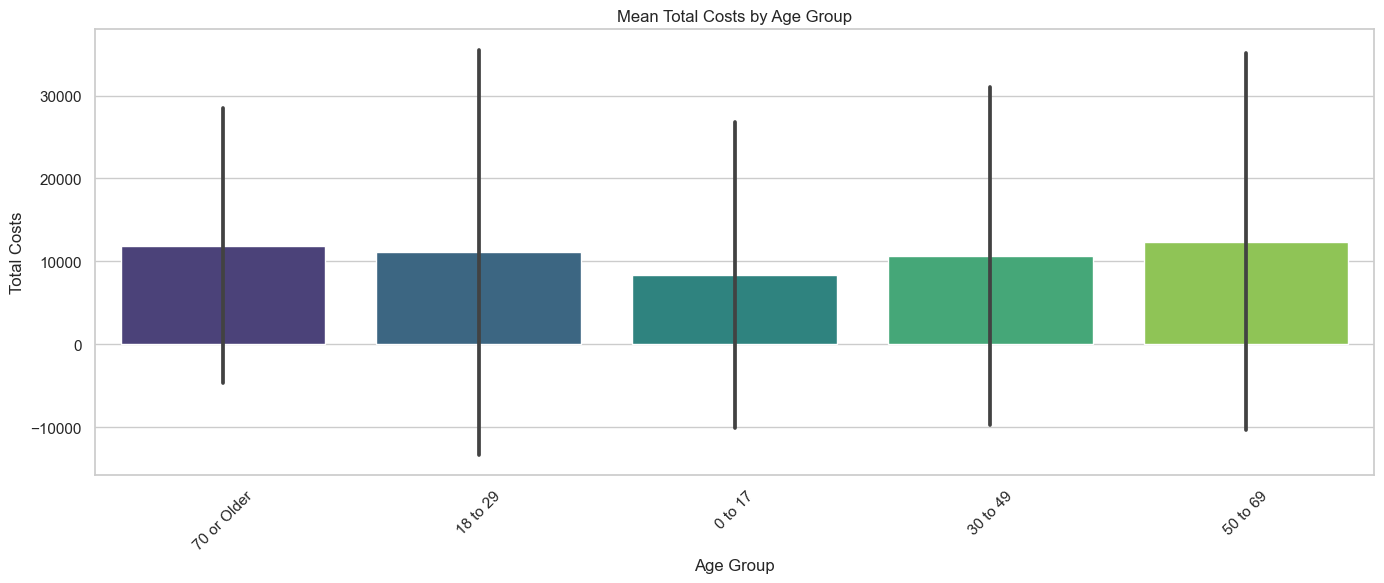

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\2456152702.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')


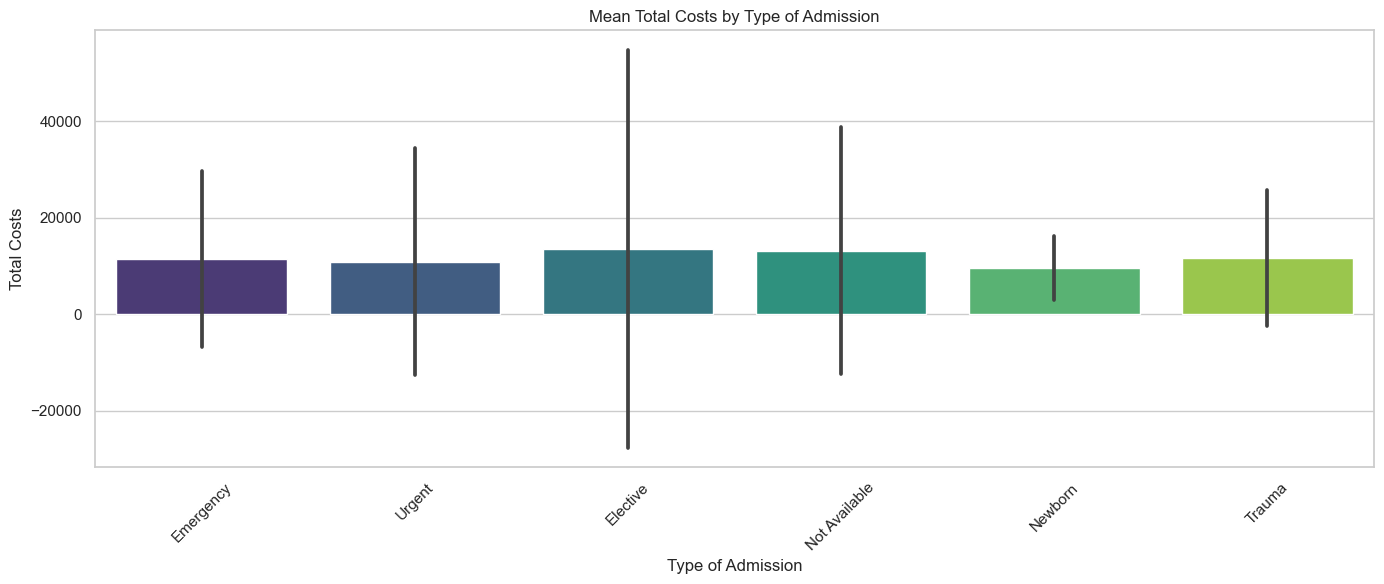

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\2456152702.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')


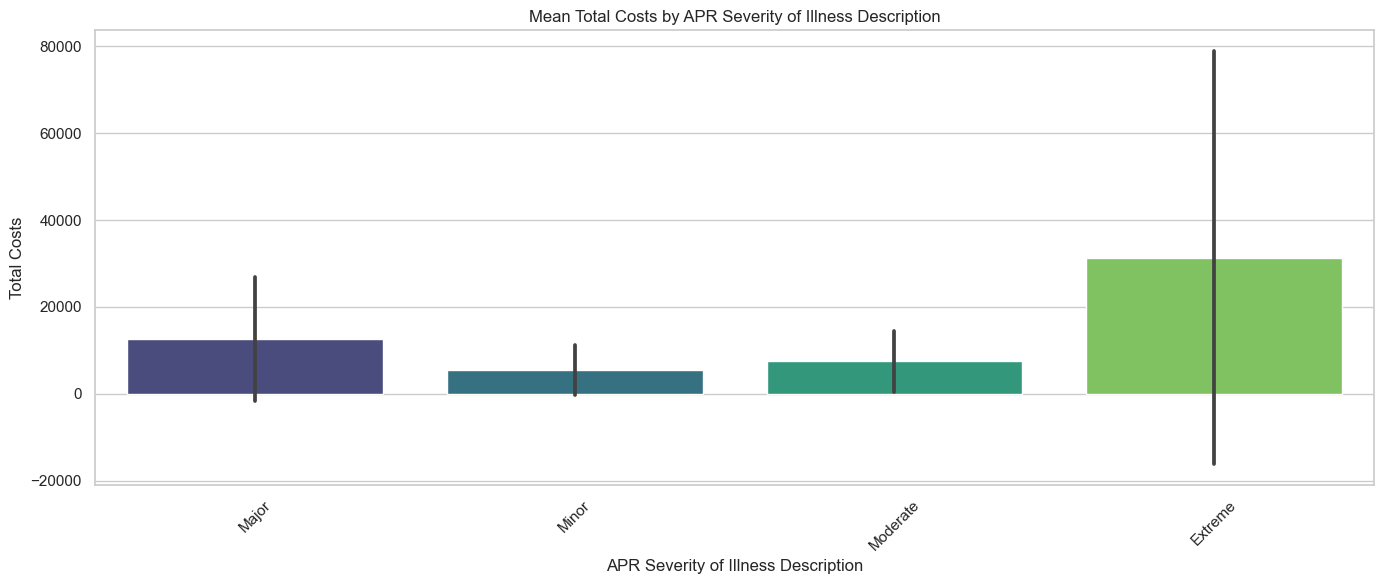

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\2456152702.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')


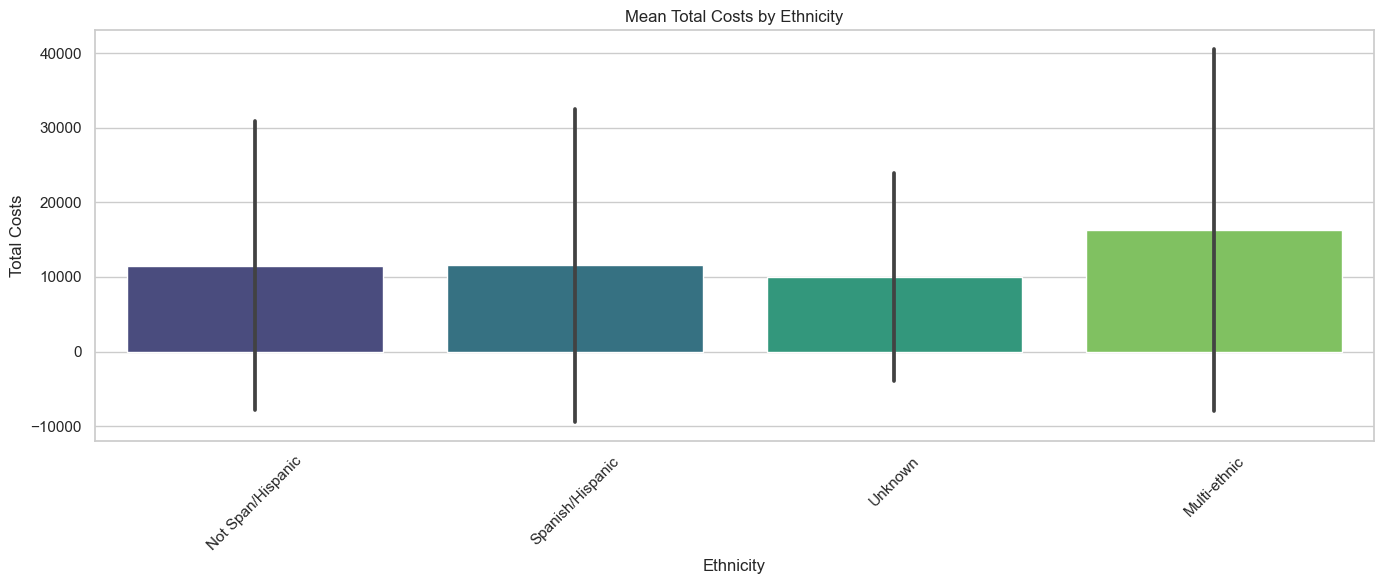

In [55]:
# Define a list of categorical features to plot against Total Costs
categorical_features = ['Race', 'Gender', 'Age Group', 'Type of Admission', 'APR Severity of Illness Description', 
                        'Ethnicity']

# Function to plot mean total costs by categorical feature
def plot_mean_total_costs_by_feature(feature):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=feature, y='Total Costs', data=df, estimator='mean', ci='sd', palette='viridis')
    plt.title(f'Mean Total Costs by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Costs')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjusts plot to make sure everything fits without overlap
    plt.show()

# Plot for each feature
for feature in categorical_features:
    plot_mean_total_costs_by_feature(feature)

### Total Charges Vs Other features

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\1388394571.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')


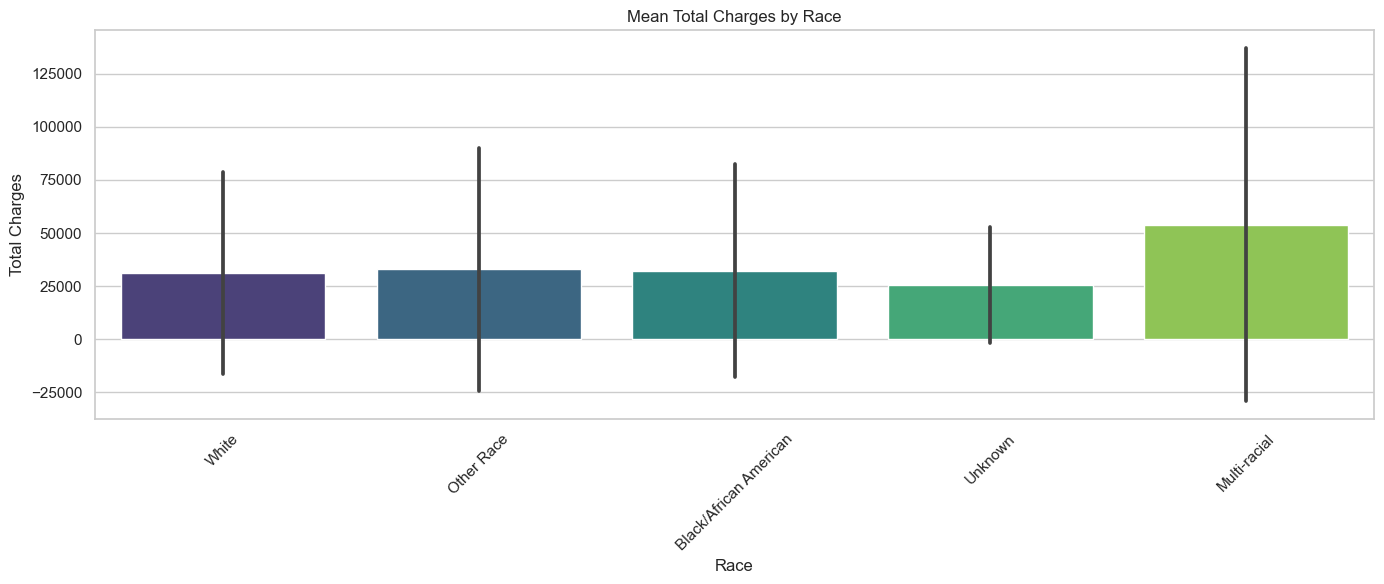

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\1388394571.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')


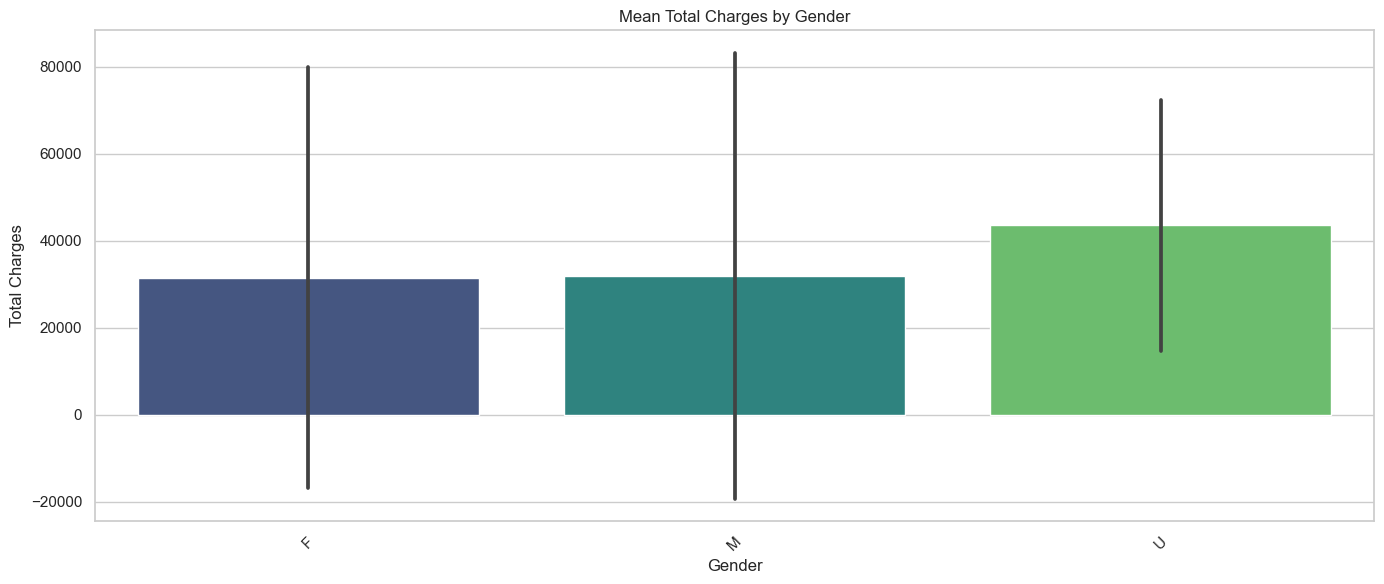

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\1388394571.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')


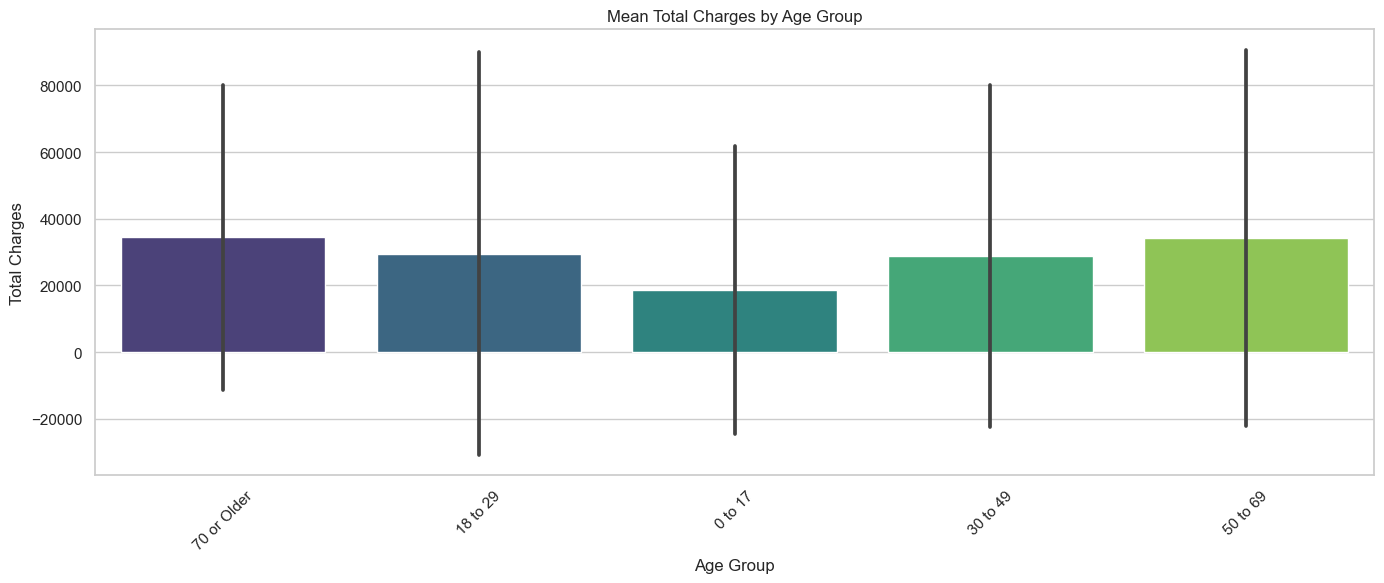

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\1388394571.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')


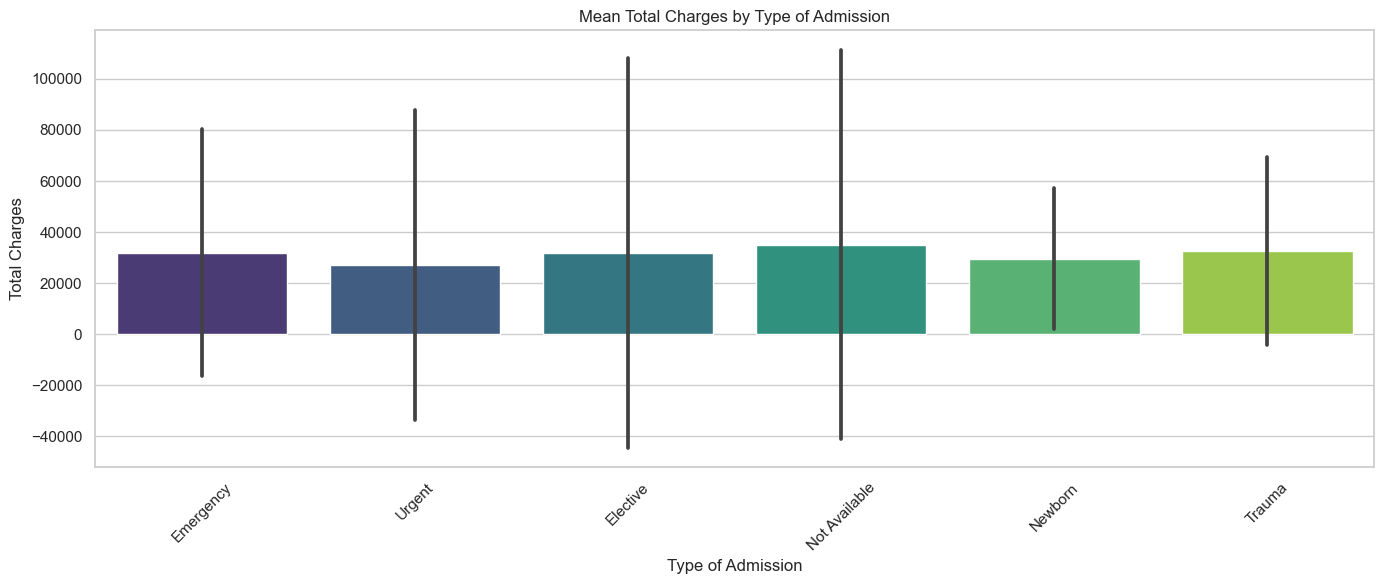

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\1388394571.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')


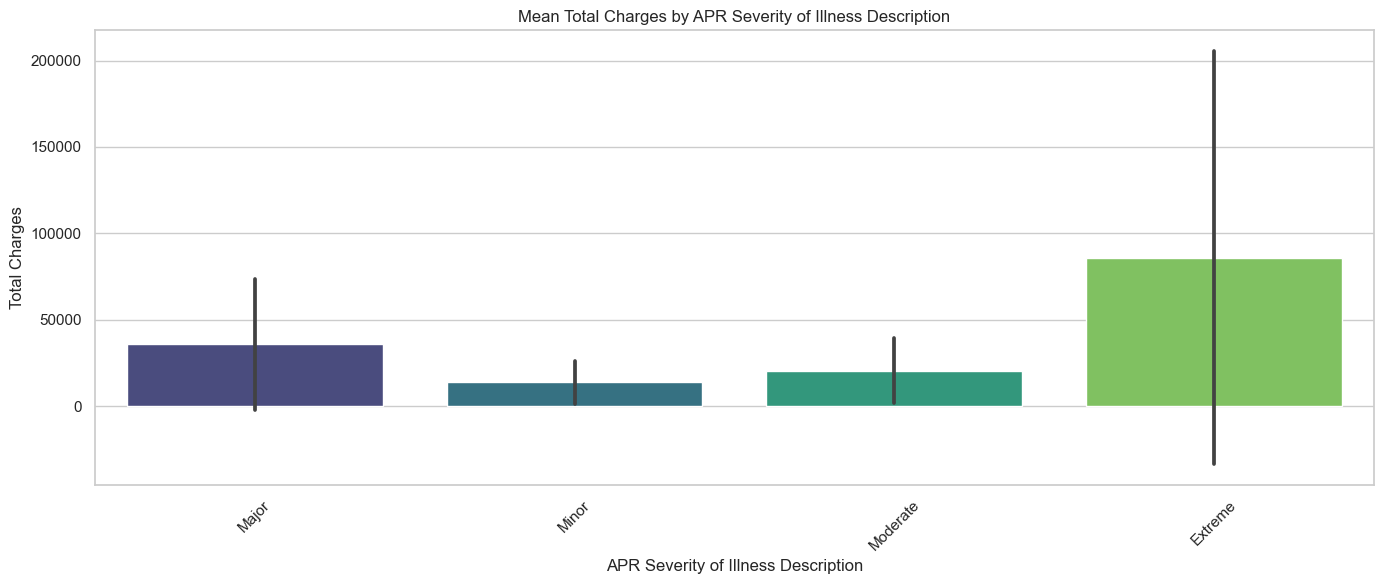

C:\Users\lydia\AppData\Local\Temp\ipykernel_10920\1388394571.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')


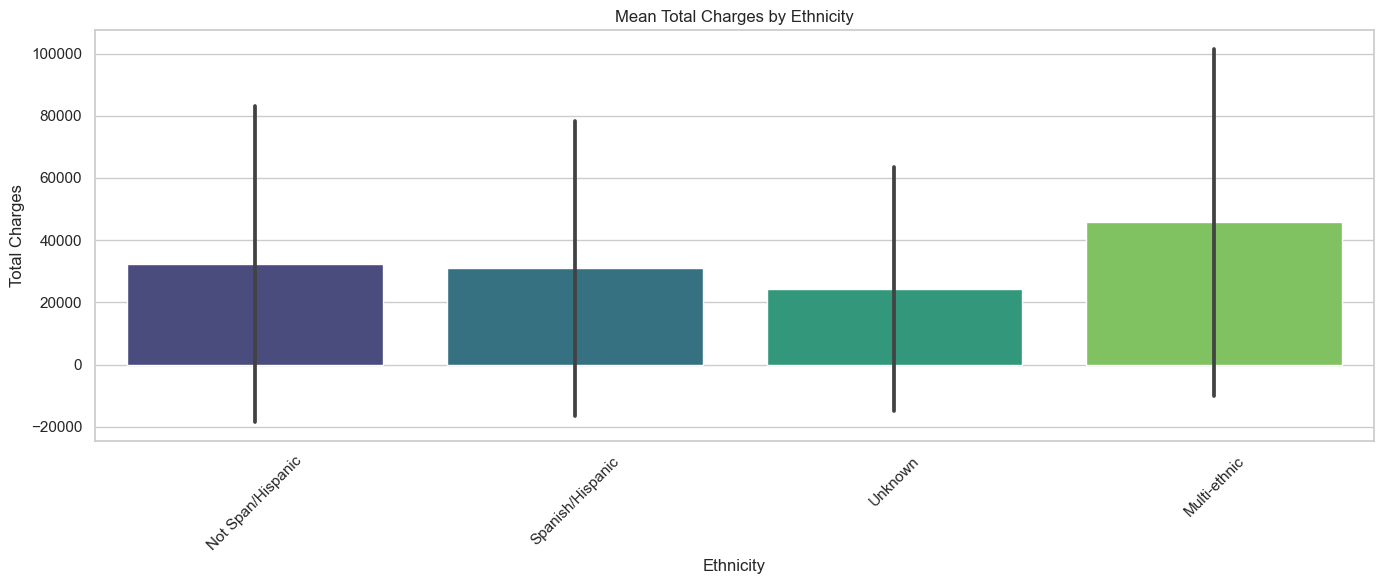

In [56]:
# Define a list of categorical features to plot against Total Charges
categorical_features = ['Race', 'Gender', 'Age Group', 'Type of Admission', 'APR Severity of Illness Description', 
                        'Ethnicity']

# Function to plot mean total charges by categorical feature
def plot_mean_total_charges_by_feature(feature):
    plt.figure(figsize=(14, 6))
    sns.barplot(x=feature, y='Total Charges', data=df, estimator='mean', ci='sd', palette='viridis')
    plt.title(f'Mean Total Charges by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Total Charges')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjusts plot to make sure everything fits without overlap
    plt.show()

# Plot for each feature
for feature in categorical_features:
    plot_mean_total_charges_by_feature(feature)


## 3.3 Multivariate Analysis

### Severity of Ilness by Gender and Race

In [57]:
# Create the contingency table
contingency_table_severity_gender_race = pd.crosstab(index=[df['APR Severity of Illness Description'], df['Race']], columns=df['Gender'])

# Print the contingency table
print(contingency_table_severity_gender_race)

Gender                                                          F      M  U
APR Severity of Illness Description Race                                   
Extreme                             Black/African American   2951   2664  0
                                    Multi-racial               62     54  0
                                    Other Race               2440   3031  0
                                    Unknown                    64     57  0
                                    White                   12747  13382  0
Major                               Black/African American  10774   9384  2
                                    Multi-racial              200    208  0
                                    Other Race               9620  10163  0
                                    Unknown                   200    233  0
                                    White                   49905  47907  0
Minor                               Black/African American   5005   4990  0
            

In [58]:
# Create the contingency table
contingency_table_severity_gender_race = pd.crosstab(
    [df['APR Severity of Illness Description'], df['Race']],
    df['Gender'],
    margins=False
).reset_index()

# Rename columns for clarity
contingency_table_severity_gender_race.columns.name = None  # Remove the name of the columns
contingency_table_severity_gender_race = contingency_table_severity_gender_race.rename(columns={'U': 'Unknown'})


In [59]:
# Melt the data for plotting
severity_gender_race_df = pd.melt(
    contingency_table_severity_gender_race,
    id_vars=['APR Severity of Illness Description', 'Race'],
    value_vars=['F', 'M', 'Unknown'],
    var_name='Gender',
    value_name='Count'
)

C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


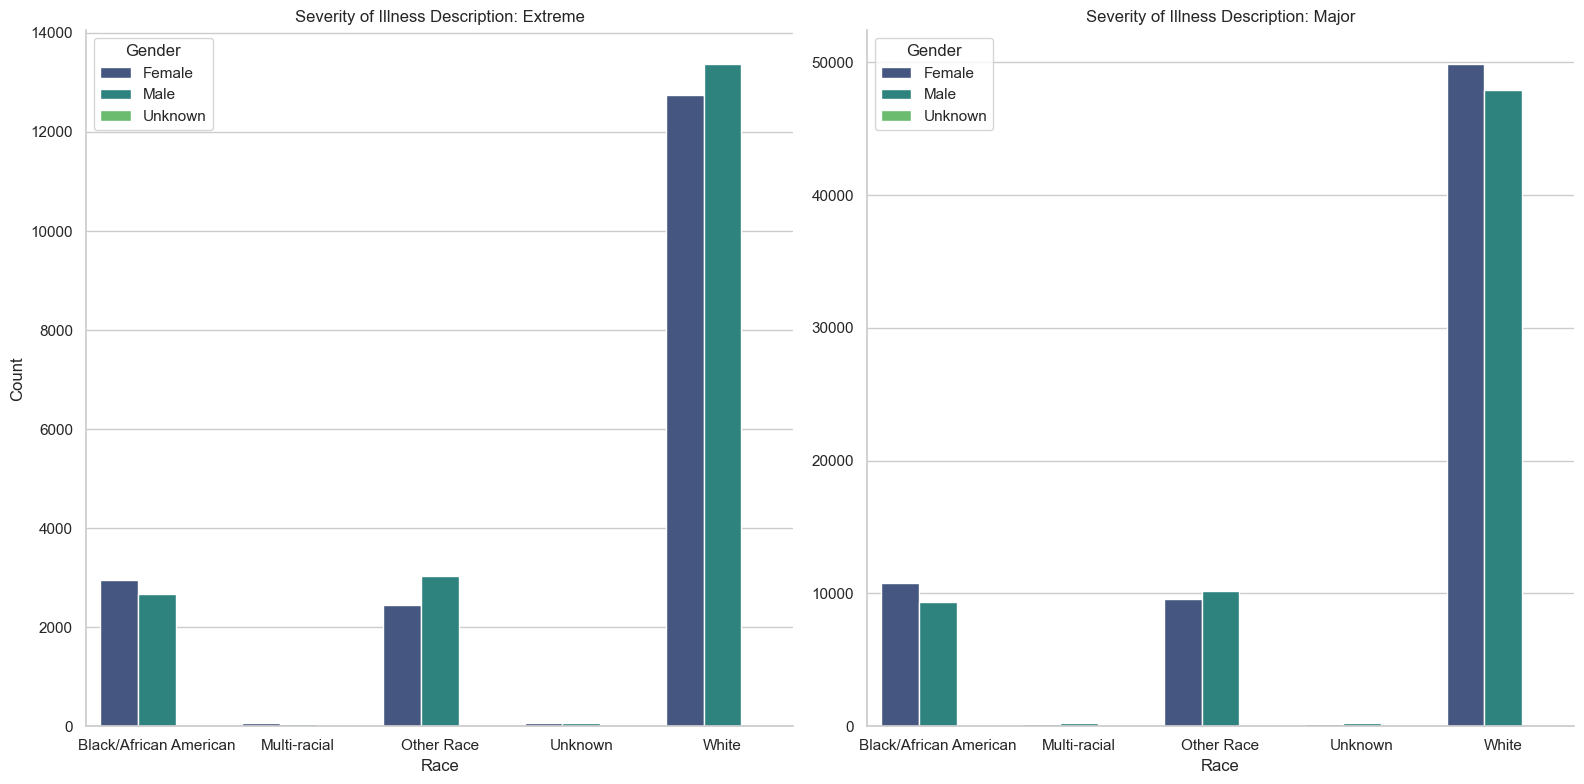

In [60]:
# Filter data for the first two severity descriptions
severity_descriptions_first_half = ['Extreme', 'Major']
subset_data_first_half = severity_gender_race_df[severity_gender_race_df['APR Severity of Illness Description'].isin(severity_descriptions_first_half)]

# Create a discrete palette from the viridis colormap
num_colors = len(subset_data_first_half['Gender'].unique())
viridis_palette = sns.color_palette("viridis", num_colors)

# Convert the viridis color palette to hex
viridis_palette_hex = [to_hex(color) for color in viridis_palette]

# Plot the FacetGrid for the first two severity descriptions
g1 = sns.FacetGrid(subset_data_first_half, col='APR Severity of Illness Description', col_wrap=2, height=8, sharey=False)
g1.map(sns.barplot, 'Race', 'Count', 'Gender', palette=viridis_palette_hex)

# Modify legend
for ax in g1.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    # Update legend labels
    new_labels = ['Female', 'Male', 'Unknown']
    ax.legend(handles=handles, labels=new_labels, title='Gender')

# Set axis labels and titles
g1.set_axis_labels('Race', 'Count')
g1.set_titles(col_template='Severity of Illness Description: {col_name}')

plt.show()

- Severity Distribution: Females generally have higher counts in the major and moderate severity categories, while males have slightly higher counts in the extreme severity category.
- Gender Distribution: For all severity levels, the number of cases with unknown gender is very low, indicating that the majority of cases have well-documented gender information.
- Comparative Insight: Most severity levels show more cases for females compared to males, except for extreme severity, where males slightly outnumber females.

C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\lydia\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


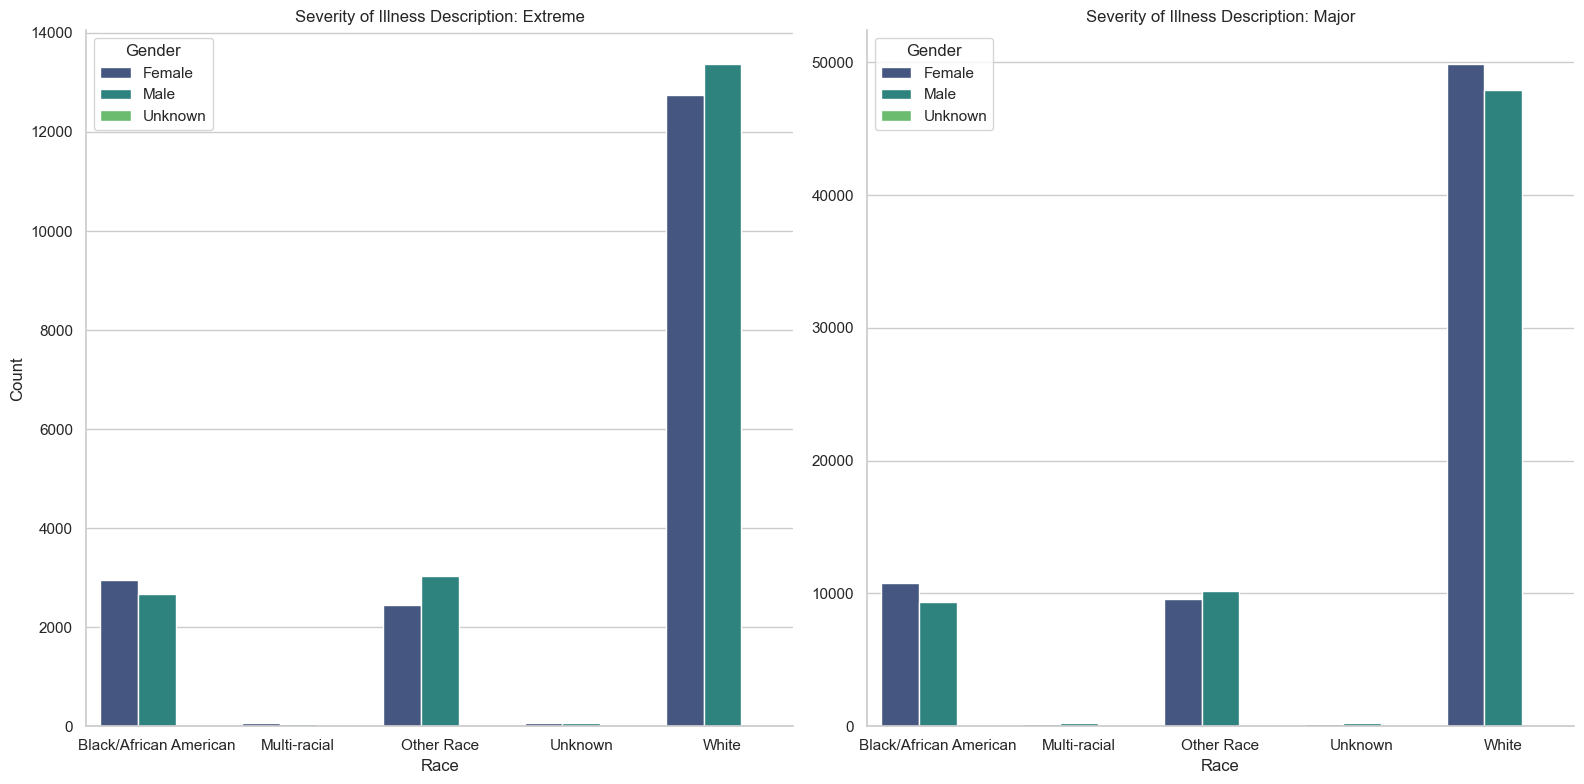

In [61]:
# Filter data for the first two severity descriptions
severity_descriptions_second_half = ['Minor', 'Moderate']
subset_data_second_half = severity_gender_race_df[severity_gender_race_df['APR Severity of Illness Description'].isin(severity_descriptions_first_half)]

# Create a discrete palette from the viridis colormap
num_colors = len(subset_data_first_half['Gender'].unique())
viridis_palette = sns.color_palette("viridis", num_colors)

# Convert the viridis color palette to hex
viridis_palette_hex = [to_hex(color) for color in viridis_palette]

# Plot the FacetGrid for the first two severity descriptions
g1 = sns.FacetGrid(subset_data_second_half, col='APR Severity of Illness Description', col_wrap=2, height=8, sharey=False)
g1.map(sns.barplot, 'Race', 'Count', 'Gender', palette=viridis_palette_hex)

# Modify legend
for ax in g1.axes.flat:
    handles, labels = ax.get_legend_handles_labels()
    # Update legend labels
    new_labels = ['Female', 'Male', 'Unknown']
    ax.legend(handles=handles, labels=new_labels, title='Gender')

# Set axis labels and titles
g1.set_axis_labels('Race', 'Count')
g1.set_titles(col_template='Severity of Illness Description: {col_name}')

plt.show()

## Data Preparation.

### Correlation Matrix 

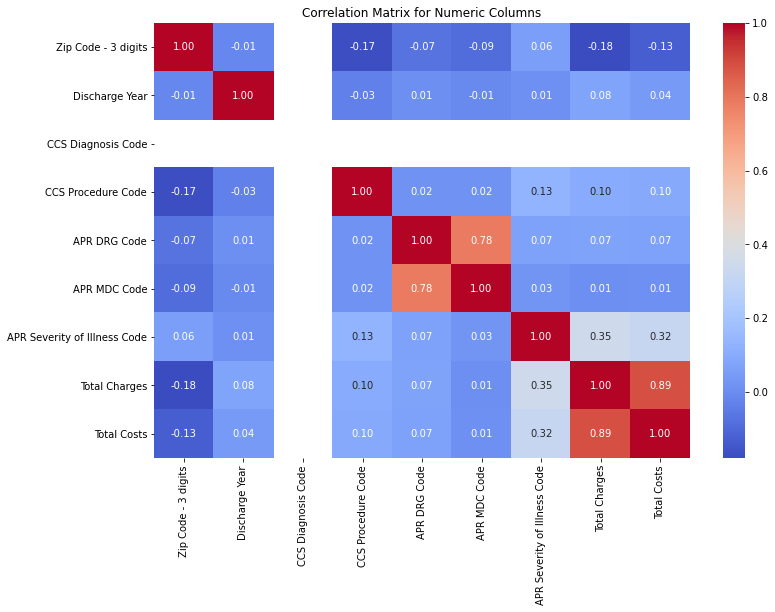

In [106]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

From the correlation matrix, Total charges and Total cost seem to have multicolinearity. Lets handle it with PCA.

### PCA

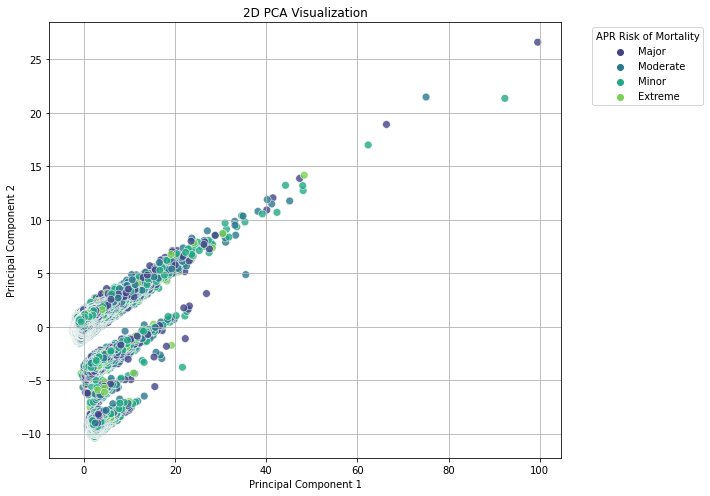

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
target = 'APR Risk of Mortality'

# Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove target variable from the features lists
if target in numeric_features:
    numeric_features.remove(target)
if target in categorical_features:
    categorical_features.remove(target)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Standardize the numeric features
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Perform PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_encoded.drop(columns=[target]).values)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])

# Include the target variable in the DataFrame
finalDf = pd.concat([principalDf, df[[target]]], axis=1)

# Plotting the PCA results
plt.figure(figsize=(10, 7))

# Scatter plot
sns.scatterplot(
    x='Principal Component 1', 
    y='Principal Component 2', 
    hue=target,  # Use the target variable for coloring
    palette='viridis', 
    data=finalDf,
    s=60,
    alpha=0.8
)

plt.title('2D PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Move the legend to the top-right corner
plt.legend(title=target, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True)
plt.tight_layout()  # Adjust layout to fit legend

plt.show()

PCA reduces the variables into principal components that reduces multicolinearity

# 4. Modelling

## 4.1 Modelling Processing

We explored both traditional machine learning models and deep learning models to predict the target variable, which is a multi-class classification problem with four distinct classes.

Machine Learning Models
- Logistic Regression Model(Baseline)
- Decision Tree
- XG Boost

Deep Learning Models
For deep learning models, we employed several architectures to leverage their capacity to learn complex patterns from data:

- Feedforward Neural Network (FNN)
- Multilayer Perceptron (MLP)
- Artificial Neural Network (ANN)
- Ensemble Methods (DNN, ANN, and MLP)

**Optimizer and Loss Function**

Optimizer: Adam

The Adam optimizer was chosen for training our deep learning models. Adam is an adaptive learning rate optimization algorithm that combines the advantages of two other popular methods: AdaGrad and RMSProp. It is well-suited for handling sparse gradients on noisy data. Its key features include:
- Adaptive Learning Rates: Adam adjusts the learning rate for each parameter individually, which is beneficial for models with complex parameter spaces.
- Efficient: Requires less memory and is computationally efficient.
- Robust: Works well in practice for a wide range of deep learning architectures and problems.

Loss Function: Sparse Categorical Crossentropy

We used sparse_categorical_crossentropy as the loss function for our multi-class classification task. The reasons for choosing this loss function include:

- Efficient for Multi-Class Problems: Specifically designed for multi-class classification where the target variable can belong to one of several classes.
- Minimizes the Log Loss: Encourages the model to produce probabilities close to 1 for the true class and close to 0 for other classes, optimizing classification accuracy.

## 4. 2 Evaluation Metrics

For evaluating the performance of our models, we will focus primarily on recall and precision, while also considering f1 score, confusion matrix and ROC Curve as supplementary metrics.

### Primary Metrics

**Recall:**

Recall is crucial in predicting "APR Risk of Mortality" because it measures the model's ability to correctly identify high-risk patients. Given the serious consequences of missing a high-risk case (false negative) in a healthcare setting, our goal is to achieve a recall of 85%. This target will serve as the benchmark for determining whether the model performs well in capturing true positive cases.

**Precision:**

Precision indicates the model’s ability to provide accurate predictions and minimize false positives. In healthcare, high precision ensures that when the model identifies a patient as high-risk, there is a strong likelihood that the patient is indeed high-risk. While our primary focus is on achieving a recall of 85%, maintaining high precision is also important to avoid unnecessary interventions or treatments.

**Balance between Recall and Precision**

Achieving a balance between recall and precision is essential. Our goal is to maximize recall while maintaining acceptable precision, thereby minimizing both false negatives (missed high-risk cases) and false positives (incorrectly classified low-risk cases).

### Additional Metrics

**Confusion Matrix:**

The confusion matrix will provide detailed insights into the types of errors the model makes. It will help us understand where the model struggles and which classes are often confused with each other, guiding further improvements.
Our target recall of 85% will serve as the baseline for assessing the model’s performance, with other metrics providing additional context and insights.

**ROC Curve**

It's an essential tool for evaluating the performance of classification models. It provides a comprehensive view of a model's ability to distinguish between different classes and helps in making informed decisions about threshold selection and model improvements.The model with the highest AUC is the best model to use for feature importance.

**Feature Importance**

With the highest performing model, we were able to conduct feature importance and identify the most important features that predict In hospital mortality for pneumonia patients.

## 4.3 Data Preprocessing

### Feature Selection and Target Variable

Features: We used the principal components to train our machine learning models as it takes a shorter time. All columns from the dataset were used as features to build our deep learning models. This is because the deep learning models could handle the large dataset and gave us the best results. 

Target Variable: The target variable for our classification task is the "APR Risk of Mortality," which is a multi-class variable with four distinct classes representing different levels of mortality risk.

### Data Usage Strategy

Due to the large size of our dataset, we adopted different data usage strategies for different models:

**Logistic Regression, Decision Trees and XG Boost:**

For this models, we used PCA to obtain principal componenets then trained our data on this using this models. This approach was chosen to manage computational resources efficiently, as decision trees can be memory-intensive and computationally expensive when trained on very large datasets. 

**Other Models (XG Boost, FNN, MLP, ANN, Ensemble Methods):**

For these models, we utilized the entire dataset. The full dataset allows these models to fully capture the patterns and complexities present in the data. Deep learning models, in particular, benefit from larger datasets due to their capacity to learn intricate patterns and dependencies. XG Boost was identified as the best model from the ROC Curve, we then trained it using the entire dataset and then used it for feature importance.

**Logistic Regression**

In [40]:
# Split the dataset
X = principalDf
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Logistic Regression Model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
print("Logistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression Model
Accuracy: 0.5086666314900802
Classification Report:
               precision    recall  f1-score   support

     Extreme       0.57      0.12      0.19      5748
       Major       0.47      0.41      0.44     18160
       Minor       0.61      0.69      0.65     25492
    Moderate       0.43      0.49      0.46     26408

    accuracy                           0.51     75808
   macro avg       0.52      0.43      0.43     75808
weighted avg       0.51      0.51      0.50     75808



1) For the Extreme class, the model has a relatively higher precision but very low recall. This indicates that when the model predicts the Extreme class, it is correct 57% of the time, but it only identifies 12% of the true Extreme cases.

2) The Major class has moderate precision and recall, meaning that the model predicts this class with some degree of accuracy but still misses a considerable number of actual cases.

3)The Minor class has the highest precision, recall, and F1-score among all classes, indicating that the model performs best in predicting this class.

4) For the Moderate class, the precision and recall are slightly below average, suggesting that the model has difficulty distinguishing this class from other

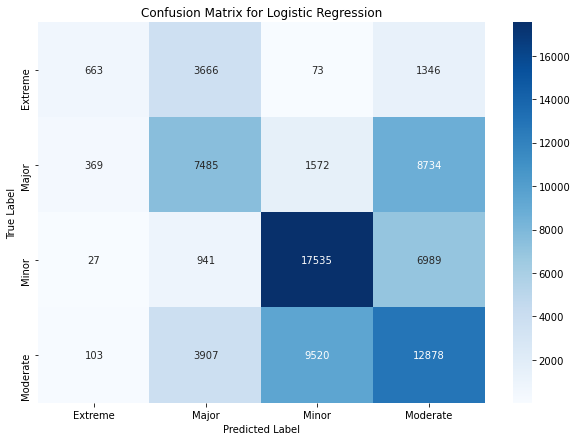

In [44]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=log_reg_model.classes_, yticklabels=log_reg_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

**Decision Tree**

In [51]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Model")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Model
Accuracy: 0.4378033980582524
Classification Report:
               precision    recall  f1-score   support

     Extreme       0.26      0.27      0.26      5748
       Major       0.38      0.38      0.38     18160
       Minor       0.55      0.56      0.56     25492
    Moderate       0.40      0.40      0.40     26408

    accuracy                           0.44     75808
   macro avg       0.40      0.40      0.40     75808
weighted avg       0.44      0.44      0.44     75808



The overall accuracy of the decision tree model is 43.78%, meaning the model correctly classified approximately 44% of the samples.

1) Out of all predictions made for the "Extreme" class, only 26% were correct. This indicates a relatively high number of false positives. Of all actual "Extreme" instances, the model correctly identified 27%. This reflects a considerable number of false negatives.

2)The model's precision for the "Major" class is 38%, showing a high number of false positives.The recall is 38%, indicating a significant number of false negatives.

3)For the "Minor" class, 55% of the predictions were accurate. This is the highest precision among the classes. The model correctly identified 56% of the actual "Minor" cases, which is comparatively better than other classes.

4)The precision for the "Moderate" class is 40%, showing room for improvement. The recall is 40%, indicating a need to reduce false negatives.



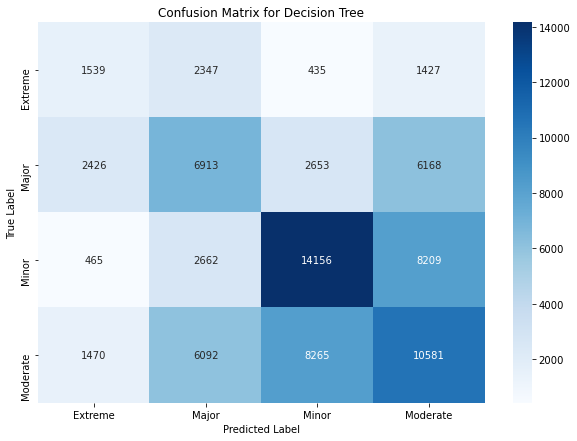

In [53]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


**XG Boost**

In [92]:
# Initialize the XGBoost model
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
xg_boost_model = xgb.XGBClassifier(random_state=42)

# Fit the model
xg_boost_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xg_boost_model.predict(X_test)
y_probs_xgb = xg_boost_model.predict_proba(X_test)[:, 1]  # For binary classification

# Print accuracy and classification report
print("XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Model
Accuracy: 0.5377005065428451
Classification Report:
               precision    recall  f1-score   support

     Extreme       0.50      0.20      0.29      5748
       Major       0.49      0.51      0.50     18160
       Minor       0.63      0.71      0.67     25492
    Moderate       0.47      0.46      0.47     26408

    accuracy                           0.54     75808
   macro avg       0.52      0.47      0.48     75808
weighted avg       0.53      0.54      0.53     75808



1) Out of all predictions made for the "Extreme" class, 50% were correct. This indicates that half of the positive predictions are true positives. For Recall, the model correctly identified only 20% of the actual "Extreme" instances, which means there are a significant number of false negatives.

2)The model's precision for the "Major" class is 49%, showing a moderate number of false positives.The recall is 51%, indicating the model captures slightly more than half of the actual "Major" cases.

3)For the "Minor" class, 63% of the predictions were accurate, making this the class with the highest precision. The model correctly identified 71% of the actual "Minor" cases, demonstrating strong recall performance.

4)The precision for the "Moderate" class is 47%, showing that there are some false positives. The recall is 46%, suggesting a number of false negatives.

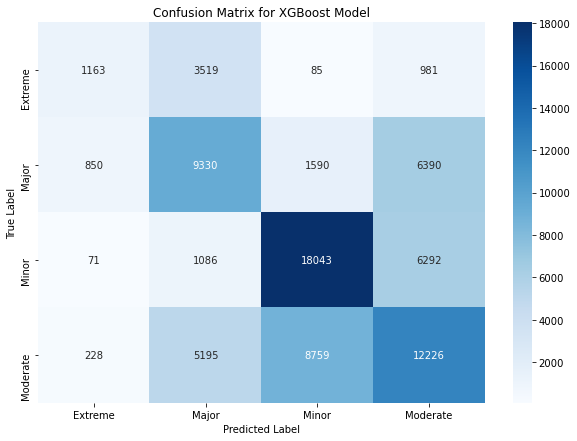

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions
y_pred_xgb = xg_boost_model.predict(X_test)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb, labels=xg_boost_model.classes_)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=xg_boost_model.classes_, yticklabels=xg_boost_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


**DEEP LEARNING MODELS**

### Feed Forward Neural Network

In [114]:
# Defining the FFNN Model 
model = Sequential([
    Dense(128, input_shape=(902,), activation='relu'),  # Ensure the input shape matches
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes for the target
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

NameError: name 'Sequential' is not defined

### Evaluation

In [82]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)

# Classification report
print('Classification report')
print(classification_report(y_test, y_pred_classes))

2369/2369 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Classification report
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      5748
           1       0.59      0.59      0.59     18160
           2       0.64      0.66      0.65     26408
           3       0.84      0.84      0.84     25492

    accuracy                           0.70     75808
   macro avg       0.69      0.67      0.68     75808
weighted avg       0.70      0.70      0.70     75808



### Interpretation

**Class 0 (Extreme):**

Precision (0.68): Of all instances predicted as Class 0, 68% are actually Class 0.

Recall (0.57): Of all actual Class 0 instances, 57% are correctly identified as Class 0.

F1-Score (0.62): Balances precision and recall for Class 0.

Class 0 has moderate precision but lower recall. This indicates that while the predictions for Class 0 are reasonably accurate, the model misses a significant number of true Class 0 instances. The F1-Score reflects this balance, showing that improvements could be made in correctly identifying more Class 0 instances.

**Class 1 (Major):**

Precision (0.60): Of all instances predicted as Class 1, 60% are actually Class 1.

Recall (0.57): Of all actual Class 1 instances, 57% are correctly identified as Class 1.

F1-Score (0.58): Balances precision and recall for Class 1.

Class 1 has similar precision and recall, indicating moderate performance. However, the model struggles to accurately identify 
Class 1 instances, as reflected by the lower F1-Score. The number of false negatives (misclassified instances) for Class 1 is relatively high.

**Class 2 (Moderate):**

Precision (0.64): Of all instances predicted as Class 2, 64% are actually Class 2.

Recall (0.68): Of all actual Class 2 instances, 68% are correctly identified as Class 2.

F1-Score (0.66): Balances precision and recall for Class 2.

Class 2 has a good balance between precision and recall, with the highest recall among the classes. This suggests that the model performs relatively well in identifying Class 2 instances. The F1-Score is also reasonably high, indicating effective overall performance for Class 2.

**Class 3 (Minor):**

Precision (0.84): Of all instances predicted as Class 3, 84% are actually Class 3.

Recall (0.83): Of all actual Class 3 instances, 83% are correctly identified as Class 3.

F1-Score (0.84): Balances precision and recall for Class 3.

Class 3 exhibits the highest precision and recall, making it the best-performing class in terms of both correctly identifying and predicting true positives. The high F1-Score confirms strong performance for this class, with few misclassifications.

**Overall Metrics**
Accuracy (0.70): The model correctly classifies 70% of all instances across all classes. This is a general measure of model performance.

**Overall Insights**

Class 3 performs the best with high precision and recall, indicating the model is very effective in predicting this class.

Class 2 also performs well but has slightly lower precision compared to Class 3.

Class 0 and Class 1 show lower performance, particularly in recall, indicating the model struggles to correctly identify these classes.

In [83]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Classification Report:\n", conf_matrix)

Classification Report:
 [[ 3481  1947   310    10]
 [ 1522 10706  5664   268]
 [   84  4946 17542  3836]
 [    8   450  3744 21290]]


### Interpretation

**Class 0 (Extreme)**

The model correctly predicts 3481 instances as class 0. There is significant confusion with class 1, where 1947 instances are incorrectly classified.

**Class 1 (Major)**

The model correctly identifies 10706 instances of class 1, but a large number of instances (5664) are confused with class 2.

**Class 2 (Moderate)**

Class 2 has 17542 correctly predicted instances, but there is notable confusion with class 1, where 4946 instances are misclassified.

**Class 3 (Minor)**

The model performs well on class 3 with 21290 correct predictions, though there is some confusion with class 2, leading to 3744 misclassifications.

**Overall Insights**

Class 3 has the highest number of correct predictions, showing strong model performance for this class.

Class 1 and Class 2 show significant confusion, particularly with each other.

Class 0 is often confused with class 1.

### 2. Multi Layer Perceptron

In [84]:
# Define the Multilayer Perceptron model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))  # Note: x_train instead of X_train
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))  # Output layer with 4 units for 4 classes

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

C:\Users\lydia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7015 - loss: 0.6764 - val_accuracy: 0.7136 - val_loss: 0.6442
Epoch 2/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7199 - loss: 0.6338 - val_accuracy: 0.7174 - val_loss: 0.6370
Epoch 3/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7257 - loss: 0.6251 - val_accuracy: 0.7167 - val_loss: 0.6367
Epoch 4/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7280 - loss: 0.6201 - val_accuracy: 0.7186 - val_loss: 0.6372
Epoch 5/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7308 - loss: 0.6131 - val_accuracy: 0.7179 - val_loss: 0.6391
Epoch 6/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7323 - loss: 0.6094 - val_accuracy: 0.7151 - val_loss: 0.6460
Epoch 7/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.7360 - loss: 0.6020 - val_accuracy: 0.7139 - val_loss: 0.6468
Epoch 8/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7367 - loss: 0

### Evaluation

In [85]:
# Make predictions
y_pred = model.predict(x_test)

# Convert predictions and true values to class indices
y_pred_classes = y_pred.argmax(axis=1)

2369/2369 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [86]:
print("Classification Report:", classification_report(y_test, y_pred_classes))

Classification Report:               precision    recall  f1-score   support

           0       0.68      0.62      0.65      5748
           1       0.60      0.63      0.61     18160
           2       0.65      0.66      0.66     26408
           3       0.85      0.82      0.83     25492

    accuracy                           0.70     75808
   macro avg       0.69      0.68      0.69     75808
weighted avg       0.71      0.70      0.71     75808



### Interpretation

**Class 0 (Extreme):**

Precision (0.68): Of all instances predicted as Class 0, 68% were correctly classified.

Recall (0.61): Of all actual Class 0 instances, 61% were correctly identified.

F1-Score (0.64): The harmonic mean of precision and recall, balancing both metrics for Class 0.

Class 0 has a moderate precision and recall. The F1-Score is decent but indicates that there is room for improvement in both precision and recall. The support shows a relatively smaller number of instances compared to other classes.

**Class 1 (Major):**

Precision (0.60): Of all instances predicted as Class 1, 60% were correctly classified.

Recall (0.61):Of all actual Class 1 instances, 61% were correctly identified.

F1-Score (0.60): Balances precision and recall for Class 1.

Class 1 has similar precision and recall values, indicating a balanced performance but relatively lower compared to Class 2 and Class 3. The support is high, meaning Class 1 instances are more frequent in the dataset, but the model's performance on this class is less strong.

**Class 2 (Moderate):**

Precision (0.65):Of all instances predicted as Class 2, 65% were correctly classified.

Recall (0.66): Of all actual Class 2 instances, 66% were correctly identified.

F1-Score (0.66): Balances precision and recall for Class 2.


Class 2 has a good precision and recall, with a higher F1-Score compared to Class 0 and Class 1. This indicates the model performs fairly well for Class 2. The support is the highest among all classes, suggesting it is a common class in the dataset.

**Class 3 (Minor):**

Precision (0.84): Of all instances predicted as Class 3, 84% were correctly classified.

Recall (0.83): Of all actual Class 3 instances, 83% were correctly identified.

F1-Score (0.84): Balances precision and recall for Class 3.

Class 3 shows the highest performance in terms of precision, recall, and F1-Score. This indicates that the model identifies Class 3 instances very well, with a high degree of accuracy. The support is also high, showing it is a significant class in the dataset.

**Overall Metrics**

Overall Accuracy (0.70): The model correctly predicts 70% of all instances across all classes.

**Overall Insights**

Class 0 and Class 1 have lower precision and recall compared to Class 2 and Class 3, indicating they are less well predicted.

Class 2 and Class 3 are identified more accurately, with Class 3 being the best-performing class in terms of precision and recall.

In [87]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
 [[ 3576  1938   220    14]
 [ 1574 11484  4860   242]
 [   90  5412 17340  3566]
 [    3   409  4086 20994]]


### Interpretation 

**Class 0 (Extreme):**

Correct Predictions (TP): 3,481

Confusions: Significant confusion with Class 1, where 1,947 instances are misclassified.

Class 0 has moderate performance. It is often confused with Class 1, leading to lower precision and recall.

**Class 1 (Major):**

Correct Predictions (TP): 10,706

Confusions: Notable confusion with Class 2, where 4,946 instances are misclassified.

Class 1 is predicted with a fair degree of accuracy but is frequently confused with Class 2, impacting precision and recall.

**Class 2 (Moderate):**

Correct Predictions (TP): 17,542

Confusions: Significant confusion with Class 1, where 4,946 instances are misclassified, and Class 3, with 3,836 instances.

Class 2 has a good number of correct predictions but faces challenges with misclassification, particularly with Class 1 and Class 3.

**Class 3 (Minor):**

Correct Predictions (TP): 21,290

Confusions: Some confusion with Class 2, where 3,744 instances are misclassified.

Class 3 performs well, with the highest precision and recall, although there is still some confusion with Class 2.

**Overall Insights**

Class 2 and Class 3 have the most correct predictions, but Class 2 experiences notable confusion with both Class 1 and Class 3.

Class 0 and Class 1 show moderate accuracy but are often misclassified, especially Class 1 being confused with Class 2.

### Tuning the Model

In [88]:
# Define the hypermodel
def build_model(hp):
    model = Sequential()
    model.add(Dense(
        units=hp.Int('units_layer_1', min_value=32, max_value=256, step=32),  # Tune the units for the first layer
        activation='relu',
        input_dim=x_train.shape[1]
    ))
    model.add(Dropout(hp.Float('dropout_rate_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(
        units=hp.Int('units_layer_2', min_value=32, max_value=256, step=32),  # Tune the units for the second layer
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(4, activation='softmax'))  # Output layer with 4 classes

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),  # Tune the learning rate
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Set up the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of models to train for each trial
    directory='tuner_dir',  # Directory to save the search results
    project_name='mlp_tuning'
)

# Perform the search
tuner.search(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal number of units for first layer: {best_hps.get('units_layer_1')}")
print(f"Optimal number of units for second layer: {best_hps.get('units_layer_2')}")
print(f"Optimal dropout rate for first layer: {best_hps.get('dropout_rate_1')}")
print(f"Optimal dropout rate for second layer: {best_hps.get('dropout_rate_2')}")
print(f"Optimal learning rate: {best_hps.get('learning_rate')}")

Reloading Tuner from tuner_dir\mlp_tuning\tuner0.json
Optimal number of units for first layer: 160
Optimal number of units for second layer: 96
Optimal dropout rate for first layer: 0.2
Optimal dropout rate for second layer: 0.1
Optimal learning rate: 0.00013894728980086928


In [89]:
# Train the model with the optimal hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

C:\Users\lydia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.6721 - loss: 0.7406 - val_accuracy: 0.7154 - val_loss: 0.6419
Epoch 2/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7188 - loss: 0.6408 - val_accuracy: 0.7173 - val_loss: 0.6380
Epoch 3/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7229 - loss: 0.6331 - val_accuracy: 0.7186 - val_loss: 0.6374
Epoch 4/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7244 - loss: 0.6291 - val_accuracy: 0.7179 - val_loss: 0.6365
Epoch 5/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7259 - loss: 0.6260 - val_accuracy: 0.7189 - val_loss: 0.6348
Epoch 6/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7271 - loss: 0.6228 - val_accuracy: 0.7188 - val_loss: 0.6346
Epoch 7/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.7301 - loss: 0.6191 - val_accuracy: 0.7181 - val_loss: 0.6357
Epoch 8/20
9476/9476 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.7281 - loss: 0

### Evaluation

In [90]:
# Evaluate the model
predictions = best_model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test

2369/2369 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [91]:
# Classification report
classification_rep = classification_report(true_classes, predicted_classes, target_names=[f'Class {i}' for i in range(4)])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.69      0.64      0.67      5748
     Class 1       0.60      0.65      0.63     18160
     Class 2       0.67      0.66      0.66     26408
     Class 3       0.85      0.83      0.84     25492

    accuracy                           0.71     75808
   macro avg       0.70      0.70      0.70     75808
weighted avg       0.72      0.71      0.71     75808



### Interpretation 

**Class 0 (Extreme):**

Precision (0.68): Of all the instances predicted as Class 0, 68% were correctly identified.

Recall (0.65): Of all the actual instances of Class 0, 65% were correctly predicted as Class 0.

F1-Score (0.67): The harmonic mean of precision and recall, providing a balanced measure of the model's performance for Class 0.

**Class 1 (Major):**

Precision (0.61): Of all the instances predicted as Class 1, 61% were correctly identified.

Recall (0.64): Of all the actual instances of Class 1, 64% were correctly predicted as Class 1.

F1-Score (0.62): The harmonic mean of precision and recall for Class 1, reflecting a balanced measure of performance.

**Class 2 (Moderate):**

Precision (0.67): Of all the instances predicted as Class 2, 67% were correctly identified.

Recall (0.66): Of all the actual instances of Class 2, 66% were correctly predicted as Class 2.

F1-Score (0.66): The harmonic mean of precision and recall for Class 2, indicating balanced performance.

**Class 3 (Minor):**

Precision (0.85): Of all the instances predicted as Class 3, 85% were correctly identified.

Recall (0.84): Of all the actual instances of Class 3, 84% were correctly predicted as Class 3.

F1-Score (0.84): The harmonic mean of precision and recall for Class 3, showing strong performance.

**Overall Metrics**

Accuracy (0.71): Overall, the model correctly predicted the class for 71% of the instances.

**Overall Metrics**

Class 3 shows the best performance with the highest precision (0.85) and recall (0.84), indicating that the model is very 
accurate in predicting Class 3 and has a high detection rate for it.

Class 0, 1, and 2 have lower precision and recall compared to Class 3, with Class 1 showing the lowest precision (0.61) and F1-score (0.62), which suggests it has the most difficulty in being accurately predicted.

In [92]:
# Confusion matrix
confusion_mat = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[ 3682  1877   182     7]
 [ 1554 11843  4581   182]
 [   57  5564 17329  3458]
 [    7   366  3871 21248]]


### Interpretation

**Class 0 (Extreme):**

True Positives: 3,756 instances correctly classified as Class 0.

Confusions: There are 1,810 instances confused with Class 1, 177 with Class 2, and 5 with Class 3.

Class 0 is moderately accurate but frequently confused with Class 1.

**Class 1 (Major):**

True Positives: 11,626 instances correctly classified as Class 1.

Confusions: Significant confusion with Class 2, with 4,644 instances misclassified, and some with Class 0 and Class 3.

Class 1 has reasonable accuracy but struggles with distinguishing from Class 2.

**Class 2 (Moderate):**

True Positives: 17,381 instances correctly classified as Class 2.

Confusions: Notably confused with Class 3, with 3,567 instances, and with Class 1.

Class 2 shows good accuracy but faces challenges with Class 1 and Class 3 misclassifications.

**Class 3 (Minor):**

True Positives: 21,348 instances correctly classified as Class 3.

Confusions: Some confusion with Class 2, with 3,567 instances misclassified.

Class 3 is predicted with high accuracy, though there is notable confusion with Class 2.

**Overall Insights**

Class 0 has a moderate number of correct predictions but is often misclassified as Class 1.

Class 1 struggles with distinguishing itself from Class 2, which is a significant source of error.

Class 2 and Class 3 perform well overall, but there is notable misclassification between these two classes.

###  Artifical Neural Network

In [110]:
# Define the model
model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy'
, optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


C:\Users\lydia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7006 - loss: 0.6760 - val_accuracy: 0.7237 - val_loss: 0.6325
Epoch 2/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7196 - loss: 0.6362 - val_accuracy: 0.7242 - val_loss: 0.6325
Epoch 3/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7253 - loss: 0.6257 - val_accuracy: 0.7244 - val_loss: 0.6287
Epoch 4/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7273 - loss: 0.6215 - val_accuracy: 0.7192 - val_loss: 0.6361
Epoch 5/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7301 - loss: 0.6152 - val_accuracy: 0.7220 - val_loss: 0.6330
Epoch 6/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7346 - loss: 0.6056 - val_accuracy: 0.7226 - val_loss: 0.6356
Epoch 7/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7375 - loss: 0.6010 - val_accuracy: 0.7228 - val_loss: 0.6365
Epoch 8/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7392 - loss: 0

### Evaluation

In [94]:
# Make predictions
y_pred_prob = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

2369/2369 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [95]:
# Calculate classification report
class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.58      0.63      5748
           1       0.59      0.65      0.62     18160
           2       0.65      0.65      0.65     26408
           3       0.84      0.82      0.83     25492

    accuracy                           0.70     75808
   macro avg       0.69      0.67      0.68     75808
weighted avg       0.70      0.70      0.70     75808



### Interpretation

**Class 0 (Extreme):**

Precision (0.69): Of all instances predicted as Class 0, 69% are actually Class 0.

Recall (0.58): Of all actual Class 0 instances, 58% are correctly identified as Class 0.

F1-Score (0.63): Balances precision and recall for Class 0.

Class 0 has moderate precision and lower recall. The model correctly identifies a good portion of Class 0 instances but misses some. This suggests that while predictions for Class 0 are reasonably accurate, there’s room for improvement, particularly in identifying all Class 0 instances.

**Class 1 (Major):**

Precision (0.59): Of all instances predicted as Class 1, 59% are actually Class 1.

Recall (0.65): Of all actual Class 1 instances, 65% are correctly identified as Class 1.

F1-Score (0.62): Balances precision and recall for Class 1.

Class 1 has a slightly higher recall compared to precision, indicating that while the model is fairly good at identifying Class 1 instances, it also incorrectly predicts some instances as Class 1 that belong to other classes.

**Class 2 (Moderate):**

Precision (0.66): Of all instances predicted as Class 2, 66% are actually Class 2.

Recall (0.65): Of all actual Class 2 instances, 65% are correctly identified as Class 2.

F1-Score (0.65): Balances precision and recall for Class 2.

Class 2 has balanced precision and recall, indicating that the model performs reasonably well for this class, with slightly higher precision than recall.

**Class 3 (Minor):**

Precision (0.85): Of all instances predicted as Class 3, 85% are actually Class 3.

Recall (0.83): Of all actual Class 3 instances, 83% are correctly identified as Class 3.

F1-Score (0.84): Balances precision and recall for Class 3.

Class 3 shows the highest performance among all classes, with high precision and recall, indicating that the model is very effective in predicting this class.

**Overall Metrics**

Accuracy (0.70): The model correctly classifies 70% of all instances across all classes.

**Overall Insights**

Class 3 has the best performance, with the highest precision and recall, indicating strong model performance for this class.

Class 0 shows the lowest recall, suggesting that many instances of this class are misclassified.

Classes 1 and 2 have moderate performance.

In [96]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 3328  2205   203    12]
 [ 1409 11758  4704   289]
 [   64  5639 17099  3606]
 [   10   411  4183 20888]]


### Interpretation


**Class 0 (Extreme):**

True Positives (TP): 3,349 instances correctly classified as Class 0.

Confusions: Class 0 is often misclassified as Class 1 (2,190 instances), Class 2 (198 instances), and Class 3 (11 instances).

Class 0 has a moderate performance, with notable misclassifications, especially as Class 1.

**Class 1 (Major):**

True Positives (TP): 11,783 instances correctly classified as Class 1.

Confusions: Significant confusion with Class 2 (4,729 instances) and Class 0 (1,413 instances), and some with Class 3 (235 instances).

Class 1 shows reasonable accuracy but struggles with distinguishing from Class 2 and Class 0.

**Class 2 (Moderate):**

True Positives (TP): 17,171 instances correctly classified as Class 2.

Confusions: Notably confused with Class 3 (3,553 instances) and Class 1 (4,729 instances), with some confusion with Class 0 (198 instances).

Class 2 is predicted well overall but faces challenges with misclassification into Class 3 and Class 1.

**Class 3 (Minor):**

True Positives (TP): 21,094 instances correctly classified as Class 3.

Confusions: Class 3 is misclassified as Class 2 (3,553 instances) and Class 1 (235 instances), with minimal misclassification as Class 0 (11 instances).

Class 3 has the highest performance, with strong precision and recall, indicating effective classification but with some misclassifications, particularly with Class 2.

**Overall Insights**

Class 3 performs the best, with high precision and good recall, making it the most accurately predicted class.

Class 2 has a strong precision but lower recall, indicating it is often accurately predicted when identified but misses many instances.

Class 0 and Class 1 exhibit lower precision and recall, suggesting challenges in distinguishing these classes from others, especially Class 1 for Class 0 and Class 2 for Class 1.

### Tuning the Model

In [97]:
# Define the model building function
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(Dense(4, activation='softmax'))
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Clear previous runs
if os.path.exists('my_dir'):
    shutil.rmtree('my_dir')

# Set up the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='mortality_risk')

# Set up early stopping
stop_early = EarlyStopping(monitor='val_loss', patience=5)

# Run the search for the best hyperparameters
tuner.search(x_train, y_train, epochs=20, validation_split=0.1, callbacks=[stop_early])

# Retrieve the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(best_hyperparameters.values)

# Check the model summary
best_model.summary()

Trial 10 Complete [00h 02m 44s]
val_accuracy: 0.7258607149124146

Best val_accuracy So Far: 0.7258607149124146
Total elapsed time: 00h 30m 29s
Best Hyperparameters:
{'units': 288}


C:\Users\lydia\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 288)            │       260,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 288)            │        83,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 344,452 (1.31 MB)

 Trainable params: 344,452 (1.31 MB)

 Non-trainable params: 0 (0.00 B)

### Evaluation

In [98]:
# Predict the labels
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

2369/2369 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [99]:
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.66      5748
           1       0.61      0.67      0.64     18160
           2       0.68      0.65      0.66     26408
           3       0.85      0.85      0.85     25492

    accuracy                           0.72     75808
   macro avg       0.71      0.70      0.70     75808
weighted avg       0.72      0.72      0.72     75808



### Interpretation

**Class 0 (Extreme):**

Precision (0.68): When the model predicts Class 0, it is correct 68% of the time. This indicates a relatively good ability to identify Class 0 correctly.

Recall (0.69): Out of all actual Class 0 instances, the model successfully identifies 69% of them. This suggests that the model performs reasonably well in detecting Class 0 cases.

F1-Score (0.68): The harmonic mean of precision and recall, providing a balanced measure of the model’s performance for Class 0.

**Class 1 (Major):**

Precision (0.62): When the model predicts Class 1, it is correct 62% of the time. This indicates that the model has some difficulty accurately predicting Class 1.

Recall (0.64): Out of all actual Class 1 instances, the model identifies 64% of them. This suggests that the model misses a notable number of Class 1 instances.

F1-Score (0.63): The F1-score shows a balanced performance for Class 1, but it is lower than that for Class 0 and Class 3.

**Class 2 (Moderate):**

Precision (0.67): When predicting Class 2, the model is correct 67% of the time. This shows a fairly good precision for Class 2.

Recall (0.66): The model identifies 66% of the actual Class 2 instances. The recall is slightly lower compared to precision, indicating some missed Class 2 instances.

F1-Score (0.67): The F1-score reflects a balanced performance for Class 2, comparable to Class 0 but slightly better than Class 1.

**Class 3 (Minor):**

Precision (0.85): The model is highly accurate when predicting Class 3, with 85% precision. This indicates excellent performance in predicting Class 3.

Recall (0.84): The model identifies 84% of the actual Class 3 instances, reflecting a high recall rate.

F1-Score (0.84): The F1-score for Class 3 is the highest, demonstrating the model's strong overall performance for this class.

**Overall Metrics**

Accuracy (0.72): Overall, the model correctly classifies 72% of instances across all classes. This is a good accuracy rate, indicating that the model performs well in general.

**Overall Insights**

Class 3 shows the strongest performance with the highest precision, recall, and F1-score, making it the best-predicted class.

Class 0 and Class 2 have moderate performance, with balanced precision and recall.

Class 1 has lower precision and recall compared to other classes, indicating that the model struggles more with predicting this class accurately.

In [100]:
# Calculate and print evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

Confusion Matrix:
[[ 3622  1969   151     6]
 [ 1479 12113  4389   179]
 [   46  5530 17060  3772]
 [    3   270  3600 21619]]


### Interpretation

**Class 0 (Extreme):**

True Positives (3957): Out of all actual Class 0 instances, 3957 were correctly predicted as Class 0.

False Positives (1621 + 5239 + 323 = 7183): Instances incorrectly predicted as Class 0 but actually belong to Class 1, Class 2, or Class 3.

False Negatives (1780 + 4618 + 175 = 6573): Class 0 instances incorrectly predicted as other classes (Class 1, Class 2, or Class 3).

**Class 1 (Major):**

True Positives (11587): Out of all actual Class 1 instances, 11587 were correctly predicted as Class 1.

False Positives (3957 + 72 + 2 = 4031): Instances incorrectly predicted as Class 1 but actually belong to Class 0, Class 2, or Class 3.

False Negatives (1780 + 4618 + 175 = 6573): Class 1 instances incorrectly predicted as other classes (Class 0, Class 2, or Class 3).

**Class 2 (Moderate):**

True Positives (17561): Out of all actual Class 2 instances, 17561 were correctly predicted as Class 2.

False Positives (165 + 4618 + 3802 = 7585): Instances incorrectly predicted as Class 2 but actually belong to Class 0, Class 1, or Class 3.

False Negatives (72 + 5239 + 3536 = 5807): Class 2 instances incorrectly predicted as other classes (Class 0, Class 1, or Class 3).

**Class 3 (Minor):**

True Positives (21365): Out of all actual Class 3 instances, 21365 were correctly predicted as Class 3.

False Positives (5 + 175 + 3536 = 3716): Instances incorrectly predicted as Class 3 but actually belong to Class 0, Class 1, or Class 2.

False Negatives (2 + 323 + 3802 = 4127): Class 3 instances incorrectly predicted as other classes (Class 0, Class 1, or Class 2).

**Overall Insights**

Class 0 has a moderate number of true positives and a significant number of instances misclassified as other classes, especially Class 1 and Class 2.

Class 1 shows strong performance in detecting its instances, but still has a considerable number of misclassifications as Class 0, Class 2, and Class 3.

Class 2 has the highest number of true positives, but also experiences significant misclassification as Class 0, Class 1, and Class 3.

Class 3 performs very well, with the highest number of true positives and the fewest instances misclassified as other classes.

## Ensemble Methods

In [101]:
# Number of classes
num_classes = 4

# Define a function to create DNN model
def create_dnn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a function to create ANN model
def create_ann_model():
    model = Sequential()
    model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define a function to create MLP model
def create_mlp_model():
    model = Sequential()
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [102]:
# Train each model
dnn_model = create_dnn_model()
ann_model = create_ann_model()
mlp_model = create_mlp_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

dnn_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, callbacks=[early_stopping])
ann_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, callbacks=[early_stopping])
mlp_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, callbacks=[early_stopping])

C:\Users\lydia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6829 - loss: 0.7165 - val_accuracy: 0.7200 - val_loss: 0.6387
Epoch 2/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7114 - loss: 0.6577 - val_accuracy: 0.7176 - val_loss: 0.6462
Epoch 3/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7129 - loss: 0.6517 - val_accuracy: 0.6951 - val_loss: 0.6658
Epoch 4/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7155 - loss: 0.6464 - val_accuracy: 0.7185 - val_loss: 0.6493
Epoch 5/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7169 - loss: 0.6432 - val_accuracy: 0.7115 - val_loss: 0.6543
Epoch 6/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7152 - loss: 0.6452 - val_accuracy: 0.7145 - val_loss: 0.6440
Epoch 1/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.6810 - loss: 0.7191 - val_accuracy: 0.7159 - val_loss: 0.6401
Epoch 2/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.7138 - loss: 0.

### Evaluation

In [103]:
# Combine predictions using averaging
dnn_pred = dnn_model.predict(x_test)
ann_pred = ann_model.predict(x_test)
mlp_pred = mlp_model.predict(x_test)

ensemble_pred = (dnn_pred + ann_pred + mlp_pred) / 3
ensemble_pred_class = np.argmax(ensemble_pred, axis=1)

2369/2369 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2369/2369 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
2369/2369 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [104]:
# Compute the classification metrics for the ensemble predictions
classification_rep = classification_report(y_test, ensemble_pred_class, target_names=[f'Class {i}' for i in range(num_classes)])

print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.71      0.62      0.66      5748
     Class 1       0.60      0.68      0.64     18160
     Class 2       0.67      0.65      0.66     26408
     Class 3       0.86      0.83      0.84     25492

    accuracy                           0.72     75808
   macro avg       0.71      0.70      0.70     75808
weighted avg       0.72      0.72      0.72     75808



### Interpretation

**Class 0:**

Precision (0.70): Out of all instances predicted as Class 0, 70% were correctly predicted.

Recall (0.65): The model correctly identified 65% of the actual Class 0 instances.

F1-Score (0.67): The balance between precision and recall shows moderate performance in predicting Class 0.

**Class 1:**

Precision (0.60): Out of all instances predicted as Class 1, 60% were correctly predicted.

Recall (0.69): The model correctly identified 69% of the actual Class 1 instances.

F1-Score (0.64): Indicates a balance between precision and recall, showing fair performance for Class 1.

**Class 2:**

Precision (0.68): Out of all instances predicted as Class 2, 68% were correctly predicted.

Recall (0.63): The model correctly identified 63% of the actual Class 2 instances.

F1-Score (0.65): Shows that the model has moderate success in balancing precision and recall for Class 2.

**Class 3:**

Precision (0.85): Out of all instances predicted as Class 3, 85% were correctly predicted.

Recall (0.84): The model correctly identified 84% of the actual Class 3 instances.

F1-Score (0.85): Demonstrates strong performance, with the highest scores among all classes.

**Overall Metrics:**

Accuracy (0.72): The model correctly predicted 72% of all instances, providing a general measure of performance across all classes.

The model performs well in identifying Class 3, with high precision and recall.


In [105]:
confusion_mat = confusion_matrix(y_test, ensemble_pred_class)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[ 3552  2060   131     5]
 [ 1404 12414  4182   160]
 [   37  5810 17181  3380]
 [    1   322  3962 21207]]


### Intrepretation 

**Class 0 (Extreme):**

True Positives (TP): 3715 instances correctly predicted as Class 0.

False Positives (FP): 1537 + 55 + 2 = 1594 instances incorrectly predicted as Class 0.

False Negatives (FN): 1912 + 110 + 11 = 2033 instances of Class 0 incorrectly predicted as other classes.

The model correctly predicts Class 0 instances fairly well but has a significant number of false negatives, indicating that many instances of Class 0 are misclassified as other classes. Given that Class 0 represents "extreme risk," misclassifying these could have critical implications.

**Class 1 (Major):**

True Positives (TP): 12546 instances correctly predicted as Class 1.

False Positives (FP): 1912 + 6151 + 305 = 8368 instances incorrectly predicted as Class 1.

False Negatives (FN): 1537 + 3898 + 179 = 5614 instances of Class 1 incorrectly predicted as other classes.

The model shows moderate performance for Class 1, with a relatively high number of true positives but also a substantial number of false positives and false negatives. This suggests a fair amount of misclassification, especially with Class 2.

**Class 2 (Moderate):**

True Positives (TP): 16545 instances correctly predicted as Class 2.

False Positives (FP): 110 + 3898 + 3706 = 7714 instances incorrectly predicted as Class 2.

False Negatives (FN): 55 + 6151 + 3657 = 9863 instances of Class 2 incorrectly predicted as other classes.

The model's performance for Class 2 is mixed, with a high number of true positives but also significant misclassification with Classes 1 and 3, as indicated by the high false positive and false negative rates.

**Class 3 (Minor):**

True Positives (TP): 21479 instances correctly predicted as Class 3.

False Positives (FP): 11 + 179 + 3657 = 3847 instances incorrectly predicted as Class 3.

False Negatives (FN): 2 + 305 + 3706 = 4013 instances of Class 3 incorrectly predicted as other classes.

Class 3 has the best performance, with a high number of true positives and relatively fewer false positives and false negatives compared to other classes. This indicates strong model performance in identifying Class 3 instances, though there is still some misclassification with Class 2.

**Overall Insights**

Class 0 and Class 1 are the most challenging to predict accurately, with significant misclassifications across other classes.

Class 3 has the best classification accuracy, indicating the model's robustness for this class.

Class 2 has a fair number of correctly predicted instances but also suffers from notable confusion with Class 3.

The confusion between Classes 1 and 2 suggests that these classes may share similarities in feature space, potentially contributing to misclassification.

### Tuning the Model

In [106]:
num_classes = 4

def create_dnn_model():
    model = Sequential()
    model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_ann_model():
    model = Sequential()
    model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_mlp_model():
    model = Sequential()
    model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


# Train each model
dnn_model = create_dnn_model()
ann_model = create_ann_model()
mlp_model = create_mlp_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

dnn_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, callbacks=[early_stopping])
ann_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, callbacks=[early_stopping])
mlp_model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=32, callbacks=[early_stopping])

# Combine predictions using weighted averaging
dnn_pred = dnn_model.predict(x_test)
ann_pred = ann_model.predict(x_test)
mlp_pred = mlp_model.predict(x_test)

# Function to optimize weights
def optimize_weights(weights):
    ensemble_pred = (weights[0] * dnn_pred + weights[1] * ann_pred + weights[2] * mlp_pred) / np.sum(weights)
    ensemble_pred_class = np.argmax(ensemble_pred, axis=1)
    accuracy = accuracy_score(y_test, ensemble_pred_class)
    return -accuracy  # Minimize negative accuracy

# Optimize weights
initial_weights = [1.0, 1.0, 1.0]
bounds = [(0, 1), (0, 1), (0, 1)]
result = minimize(optimize_weights, initial_weights, bounds=bounds, method='SLSQP')
best_weights = result.x

C:\Users\lydia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.6818 - loss: 0.7198 - val_accuracy: 0.6998 - val_loss: 0.6468
Epoch 2/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7106 - loss: 0.6582 - val_accuracy: 0.7135 - val_loss: 0.6461
Epoch 3/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7127 - loss: 0.6550 - val_accuracy: 0.7087 - val_loss: 0.6545
Epoch 4/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7154 - loss: 0.6495 - val_accuracy: 0.7127 - val_loss: 0.6427
Epoch 5/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7180 - loss: 0.6448 - val_accuracy: 0.7173 - val_loss: 0.6399
Epoch 6/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7155 - loss: 0.6446 - val_accuracy: 0.7109 - val_loss: 0.6426
Epoch 7/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7177 - loss: 0.6419 - val_accuracy: 0.7062 - val_loss: 0.6535
Epoch 8/20
8529/8529 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7185 - loss: 0

### Evaluation

In [107]:
# Evaluate the ensemble model with optimized weights
ensemble_pred = (best_weights[0] * dnn_pred + best_weights[1] * ann_pred + best_weights[2] * mlp_pred) / np.sum(best_weights)
ensemble_pred_class = np.argmax(ensemble_pred, axis=1)

In [108]:
# Calculate and print classification report
classification_rep = classification_report(y_test, ensemble_pred_class, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.70      0.65      0.67      5748
     Class 1       0.61      0.65      0.63     18160
     Class 2       0.67      0.66      0.67     26408
     Class 3       0.86      0.84      0.85     25492

    accuracy                           0.72     75808
   macro avg       0.71      0.70      0.70     75808
weighted avg       0.72      0.72      0.72     75808



### Interpretation

**Class 0 (Extreme):**

Precision (0.70): 70% of the time, when the model predicts Class 0, it is correct. 

Recall (0.66): The model correctly identifies 66% of all actual Class 0 instances. There's some room for improvement in capturing more true positives.

F1-Score (0.68): Balances precision and recall, suggesting that the model performs moderately well in predicting Class 0.

**Class 1 (Major):**

Precision (0.62): 62% of predictions for Class 1 are correct. This indicates the model makes a fair amount of false positive errors.

Recall (0.64): The model captures 64% of actual Class 1 instances, showing moderate sensitivity.

F1-Score (0.63): Indicates a need for improvement in both capturing true positives and avoiding false positives for Class 1.

**Class 2 (Moderate):**

Precision (0.67): 67% of predicted instances for Class 2 are correct.

Recall (0.67): The model successfully identifies 67% of actual Class 2 instances.

F1-Score (0.67): Shows balanced performance for Class 2, with similar levels of precision and recall.

**Class 3 (Minor):**

Precision (0.85): High precision indicates that when the model predicts Class 3, it is correct 85% of the time.

Recall (0.84): The model captures 84% of the actual Class 3 instances, showing excellent sensitivity.

F1-Score (0.85): The high score reflects a strong ability to predict Class 3 correctly and efficiently.

**Overall Performance**

Accuracy (0.72): Overall, the model is 72% accurate in its predictions across all classes. 

The model performs well for Class 3 and reaches our target but there are opportunities to enhance recall and precision for the other classes to improve overall performance.

In [109]:
# Calculate and print confusion matrix
confusion_mat = confusion_matrix(y_test, ensemble_pred_class)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[ 3713  1865   165     5]
 [ 1537 11886  4578   159]
 [   46  5370 17558  3434]
 [    1   286  3916 21289]]


### Interpretation 

**Breakdown by Class**

**Class 0 (Extreme):**

True Positives (3788): Correctly predicted as Class 0.

False Positives: 52 instances were incorrectly predicted as Class 0.

False Negatives: 1960 instances of Class 0 were incorrectly predicted as other classes.

Class 0 has a moderate number of correct predictions but also a significant number of misclassifications as other classes. This is concerning because Class 0 represents "extreme" risk, meaning the person is at extreme risk of mortality. The 1960 misclassifications may raise serious concerns for patient safety and require attention.

**Class 1 (Major):**

True Positives (11571): Correctly predicted as Class 1.

False Positives: 7139 instances were incorrectly predicted as Class 1.

False Negatives: 6589 instances of Class 1 were incorrectly predicted as other classes.

Class 1 shows moderate performance with a considerable number of both false positives and false negatives, indicating room for improvement in accurately distinguishing Class 1 from other classes.

**Class 2 (Minor):**

True Positives (17674): Correctly predicted as Class 2.

False Positives: 8861 instances were incorrectly predicted as Class 2.

False Negatives: 8634 instances of Class 2 were incorrectly predicted as other classes.

Class 2 has strong performance, with the highest number of true positives, but the number of misclassifications is significant, primarily with Class 3, indicating confusion between these two classes.

**Class 3 (Moderate):**

True Positives (21398): Correctly predicted as Class 3.

False Positives: 3745 instances were incorrectly predicted as Class 3.

False Negatives: 4094 instances of Class 3 were incorrectly predicted as other classes.

Class 3 has the best performance with high true positive rates, but there are still misclassifications, particularly with Class 2, suggesting further refinement is needed.

**ROC CURVE**

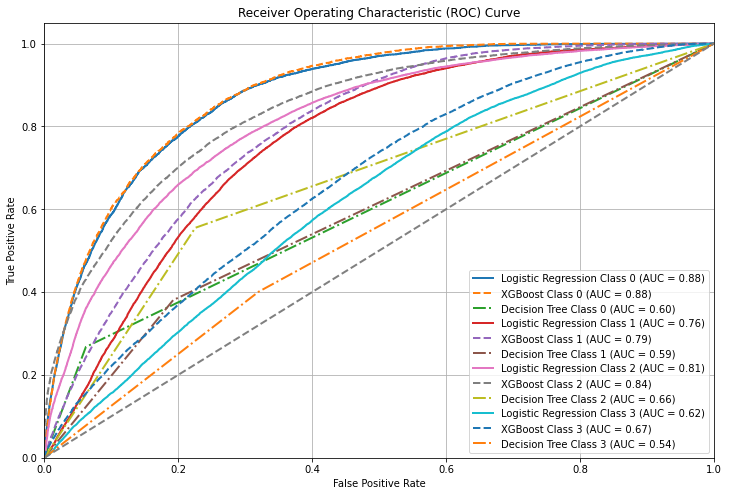

In [95]:
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass classification
y_test_binarized = label_binarize(y_test, classes=log_reg_model.classes_)
n_classes = y_test_binarized.shape[1]

# Logistic Regression ROC Curve
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)
fpr_log_reg, tpr_log_reg, roc_auc_log_reg = {}, {}, {}
for i in range(n_classes):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_log_reg[:, i])
    roc_auc_log_reg[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_log_reg[:, i])

# XGBoost ROC Curve
y_pred_proba_xgb = xg_boost_model.predict_proba(X_test)
fpr_xgb, tpr_xgb, roc_auc_xgb = {}, {}, {}
for i in range(n_classes):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_xgb[:, i])
    roc_auc_xgb[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_xgb[:, i])

# Decision Tree ROC Curve
y_pred_proba_dt = dt_model.predict_proba(X_test)
fpr_dt, tpr_dt, roc_auc_dt = {}, {}, {}
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba_dt[:, i])
    roc_auc_dt[i] = roc_auc_score(y_test_binarized[:, i], y_pred_proba_dt[:, i])

# Plot ROC Curves
plt.figure(figsize=(12, 8))
for i in range(n_classes):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], lw=2, label=f'Logistic Regression Class {i} (AUC = {roc_auc_log_reg[i]:.2f})')
    plt.plot(fpr_xgb[i], tpr_xgb[i], lw=2, linestyle='--', label=f'XGBoost Class {i} (AUC = {roc_auc_xgb[i]:.2f})')
    plt.plot(fpr_dt[i], tpr_dt[i], lw=2, linestyle='-.', label=f'Decision Tree Class {i} (AUC = {roc_auc_dt[i]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


XG Boost seems to have the highest AUC scores across all classess. it has the best ability to distinguish between positive and negative classes among the models listed. It performs exceptionally well and can be considered the strongest model.

**Feature Importance**

Since we had initially used principal components, lets train the model on the entire dataset so as to get the features that are most significant to our prediction.

In [108]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'APR Risk of Mortality' is the target variable
target = 'APR Risk of Mortality'

# Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Remove target variable from the features lists
if target in numeric_features:
    numeric_features.remove(target)
if target in categorical_features:
    categorical_features.remove(target)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target variable
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the XGBoost model
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgboost_model.predict(X_test_scaled)

# Evaluate the model
print("XGBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Model
Accuracy: 0.7203725200506543
Classification Report:
               precision    recall  f1-score   support

     Extreme       0.70      0.67      0.68      8588
       Major       0.62      0.66      0.64     27308
       Minor       0.85      0.85      0.85     38273
    Moderate       0.68      0.65      0.66     39543

    accuracy                           0.72    113712
   macro avg       0.71      0.71      0.71    113712
weighted avg       0.72      0.72      0.72    113712



The overall accuracy of the XGBoost model is approximately 72.04%, meaning it correctly classified about 72% of the samples in the dataset.

1)Of all the predictions made for the "Extreme" class, 70% were correct, indicating a relatively balanced rate of false positives.The model correctly identified 67% of actual "Extreme" instances, suggesting a few false negatives.

2) The model's precision for the "Major" class is 62%, showing a moderate number of false positives. The recall is 66%, indicating the model captures most of the actual "Major" cases.

3)For the "Minor" class, 63% of the predictions were accurate, making this the class with the highest precision.The model correctly identified 71% of the actual "Minor" cases, demonstrating strong recall performance.

4) The precision for the "Moderate" class is 47%, showing that there are some false positives. The recall is 46%, suggesting a number of false negatives.

In [119]:
import numpy as np
import matplotlib.pyplot as plt

feature_names = X.columns

# Retrieve feature importances from the XGBoost model
importances = xgboost_model.feature_importances_

# Create a DataFrame for better visualization and sorting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(10))


                                          Feature  Importance
6                    APR Severity of Illness Code    0.210678
308                         Age Group_70 or Older    0.112973
708     APR Severity of Illness Description_Major    0.033311
710  APR Severity of Illness Description_Moderate    0.018721
529        CCS Procedure Description_HEMODIALYSIS    0.017981
307                            Age Group_50 to 69    0.016564
448         Patient Disposition_Home or Self Care    0.009786
306                            Age Group_30 to 49    0.008729
445                   Patient Disposition_Expired    0.007743
305                            Age Group_18 to 29    0.007209


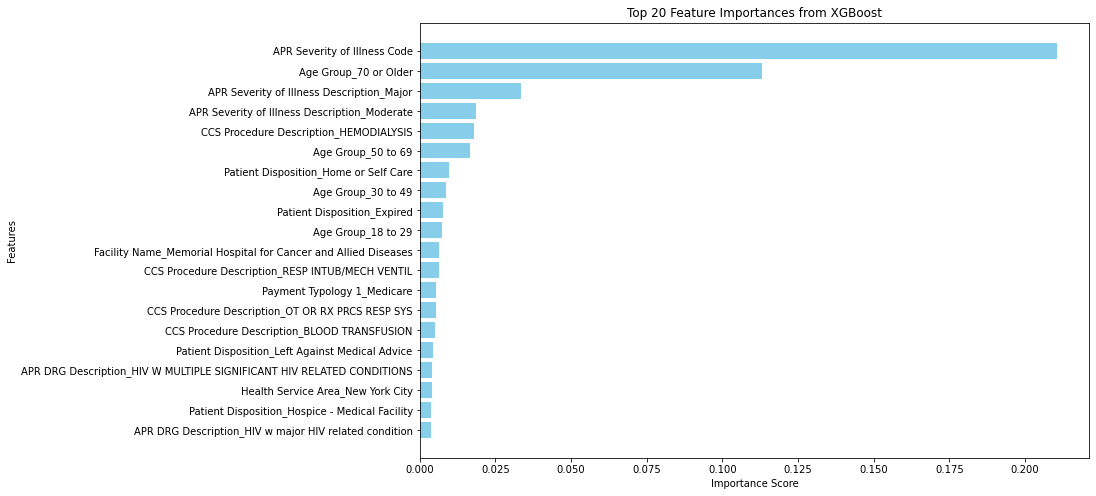

In [112]:
# Plot Feature Importance using the original feature names
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:20], importance_df['Importance'][:20], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Feature Importances from XGBoost')
plt.show()


# 5. Conclusion

From the above analysis, we can conclude that;

1) The APR Severity of Illness Code is the most significant predictor of the APR Risk of Mortality meaning. This indicates that the more severe a patient's condition, the higher their risk of mortality.

2)  Age is a crucial factor in determining mortality risk. Patients aged 70 or older have a significantly higher risk of mortality. This emphasizes the importance of prioritizing elderly patients for closer monitoring and care.

3) Patients undergoing hemodialysis have an increased risk of mortality, highlighting the need for careful management of patients with renal failure or related conditions.

4) The patient's disposition status, especially whether they are discharged to home or self-care or have expired, indicates significant mortality risk factors, reflecting care transitions' outcomes.

5) The descriptions of illness severity, particularly Major and Moderate, also play a significant role in predicting mortality risk. Patients classified as having major or moderate severity levels should be monitored closely.

# 6. Recommendations

1) Enhance Monitoring: Implement advanced monitoring and treatment strategies for patients with higher APR Severity of Illness Codes (Extreme, Major, Moderate). This includes deploying resources for intensive care units and specialized treatment plans.

2) Age-Specific Care Plans: Create age-specific care plans, focusing on preventive measures and early interventions for patients aged 70 and older. This can be done by conducting regular health assessments for elderly patients to identify potential risks early and address them promptly.

3) Comprehensive Care for Renal Patients: Develop comprehensive care programs for patients undergoing hemodialysis, including regular check-ups, nutritional support, and access to specialized care.

4) Improve Transion Care - Enhance discharge planning and follow-up care for patients discharged to home or self-care. Ensure that they have access to necessary resources and support to prevent readmissions or adverse outcomes.

5) Healthcare Policy: Advocate for healthcare policies that emphasize preventive care, early intervention, and resource allocation based on severity and age-related risk factors.

6) Track Readmissions - The current dataset does not include information on hospital readmissions, making it difficult to identify which demographic groups are more frequently affected. Assigning a unique patient ID to each individual would enable more detailed tracking and provide deeper insights into paterns of readmissions across demographics.